# Task II (38 Marks): Classification - Wine Dataset

### Introduction and dataset background

\hspace{0.4cm}The \textbf{Wine Dataset} presents a chemical analysis of the contents of wine that are present during its cultivation. The data has been gathered from three different cultivars in the region of Italy, which represent the \textbf{3} types of wine - \textbf{the target labels}. It is an integer value with the range \textbf{[1; 3]}. The current version of the dataset contains \textbf{13} numeric attributes (float or integer) representing the corresponding chemicals, as well as characteristics of the wine color:
\begin{itemize}
\item \textbf{Alcohol}
\item \textbf{Malic acid}
\item \textbf{Ash}
\item \textbf{Alcalinity of ash}
\item \textbf{Magnesium}
\item \textbf{Total phenols}
\item \textbf{Flavanoids}
\item \textbf{Nonflavanoid phenols}
\item \textbf{Proanthocyanins}
\item \textbf{Color intensity}
\item \textbf{Hue}
\item \textbf{OD280/OD315 of diluted wines}
\item \textbf{Proline}
\end{itemize}
\hspace{0.4cm} There are no missing values in the dataset and all samples are correctly associated with their respective \textbf{wine class}, making this an ideal case for \textbf{Classification} tasks. The class distributions are slightly imbalanced with: 
\begin{itemize}
\item \textbf{WC1 - 59 samples}
\item \textbf{WC2 - 71 samples}
\item \textbf{WC3 - 48 samples}
\end{itemize}
\hspace{0.4cm} Furthermore, each attribute in the dataset is a continuous variable and standardization (\textbf{feature scaling}) is suggested for some algorithms. This is also only a part of the original \textbf{30} features, which were lost in the gathering process. However, the total number of samples is only \textbf{178} and adding a lot of features contains a risk concerning the \textbf{Curse of Dimensionality}.  

### Previous approaches

\hspace{0.4cm}The \textbf{Wine Dataset} has been used numerous times throughout the years for testing both \textbf{supervised} and \textbf{unsupervised} models, mostly in combination with other similar datasets.

\hspace{0.4cm}Perhaps the oldest such case was used to evaluate various \textbf{classification} models in a high-dimensional space (Aeberhard et. al, Comparison of Classifiers in High Dimensional Settings, 1992). The algorithms were evaluated using the \textbf{leave-one-out cross validation} method on both real and generated datasets. This dataset produced the highest scores in each experiment and even achieved \textbf{100%} accuracy using the \textbf{RDA (Regularized Discrimination Analysis)} method. Other algorithm variants included \textbf{LDA (99.4%), QDA (quadratic - 98.9%) and KNN (96.1%)}. Following this research, another paper was released highlighting \textbf{RDA}'s superior performance when using an appropriate \textbf{cost function} (Aeberhard et. al, THE CLASSIFICATION PERFORMANCE OF RDA, 1992).

\hspace{0.4cm}One of the more recent approaches applied this dataset for \textbf{Unsupervised learning} - specifically clustering methods (Fischer et. al, Amplifying the Block Matrix Structure for Spectral Clustering, 2005). It proposed \textbf{spectral} clustering methods, such as \textbf{K-lines} to improve the overall structure of the \textbf{Affinity matrix} (represents adjacencies as a directed acyclic graph), instead of the classic \textbf{K-means clustering} algorithm. For this dataset's experiment, however, the \textbf{Spectral Clustering} method performed worse than the classic approaches, unlike the others. The \textbf{K-means clustering} method \textbf{incorrectly} assigned \textbf{5} samples, while the novel approach had \textbf{12}. This was due to the fact that the dataset was too sparse to achieve good correlation (conductivity) between each data point (\textbf{178 samples and 13 features}).       

\hspace{0.4cm}Overall, this means that it is generally easy to create an accurate classifier, as many of the wine characteristics can be inferred due to the nature of the dataset. However, due to the limited number of total samples, some \textbf{overfitting} problems could arise, which means that it could be useful to invest some time in generating more examples using \textbf{sampling methods}.  

#### Importing the dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import cycle
import pandas as pd
from scipy import interp

import os
import joblib

import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)

#machine learning helper packages
from sklearn.model_selection import StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import make_scorer, f1_score, classification_report, confusion_matrix, auc, roc_curve, precision_recall_fscore_support, accuracy_score
from sklearn.preprocessing import label_binarize

In [2]:
wine_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)

In [3]:
wine_data.columns = ['Y_WC', 'Alcohol', 'Malic_Acid', 'Ash', 'Alcalinity_Of_Ash', 'Magnesium', 'Total_Phenols', 'Flavanoids', 
             'Nonflavanoid_Phenols', 'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280_OD315_Of_Diluted_Wines', 
             'Proline']

In [4]:
wine_data.head()

Y_WC  Alcohol  Malic_Acid   Ash  Alcalinity_Of_Ash  Magnesium  \
0     1    14.23        1.71  2.43               15.6        127   
1     1    13.20        1.78  2.14               11.2        100   
2     1    13.16        2.36  2.67               18.6        101   
3     1    14.37        1.95  2.50               16.8        113   
4     1    13.24        2.59  2.87               21.0        118   

   Total_Phenols  Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color_Intensity   Hue  OD280_OD315_Of_Diluted_Wines  Proline  
0             5.64  1.04                          3.92     1065  
1             4.38  1.05                          3.40     1050  
2             5.68  1.03                          3.17     1185  
3             7.80  0.86                          3.45     1480  
4             4.32  1.04                          2.93      735

In [5]:
wine_data.dtypes

Y_WC                              int64
Alcohol                         float64
Malic_Acid                      float64
Ash                             float64
Alcalinity_Of_Ash               float64
Magnesium                         int64
Total_Phenols                   float64
Flavanoids                      float64
Nonflavanoid_Phenols            float64
Proanthocyanins                 float64
Color_Intensity                 float64
Hue                             float64
OD280_OD315_Of_Diluted_Wines    float64
Proline                           int64
dtype: object

In [6]:
print('Observations:{}, Attributes:{}'.format(wine_data.shape[0], wine_data.shape[1]))

Observations:178, Attributes:14


In [7]:
print('Number of NaN values:')
wine_data.isnull().sum()

Number of NaN values:


Y_WC                            0
Alcohol                         0
Malic_Acid                      0
Ash                             0
Alcalinity_Of_Ash               0
Magnesium                       0
Total_Phenols                   0
Flavanoids                      0
Nonflavanoid_Phenols            0
Proanthocyanins                 0
Color_Intensity                 0
Hue                             0
OD280_OD315_Of_Diluted_Wines    0
Proline                         0
dtype: int64

### Data Exploration

Plotting attribute distributions


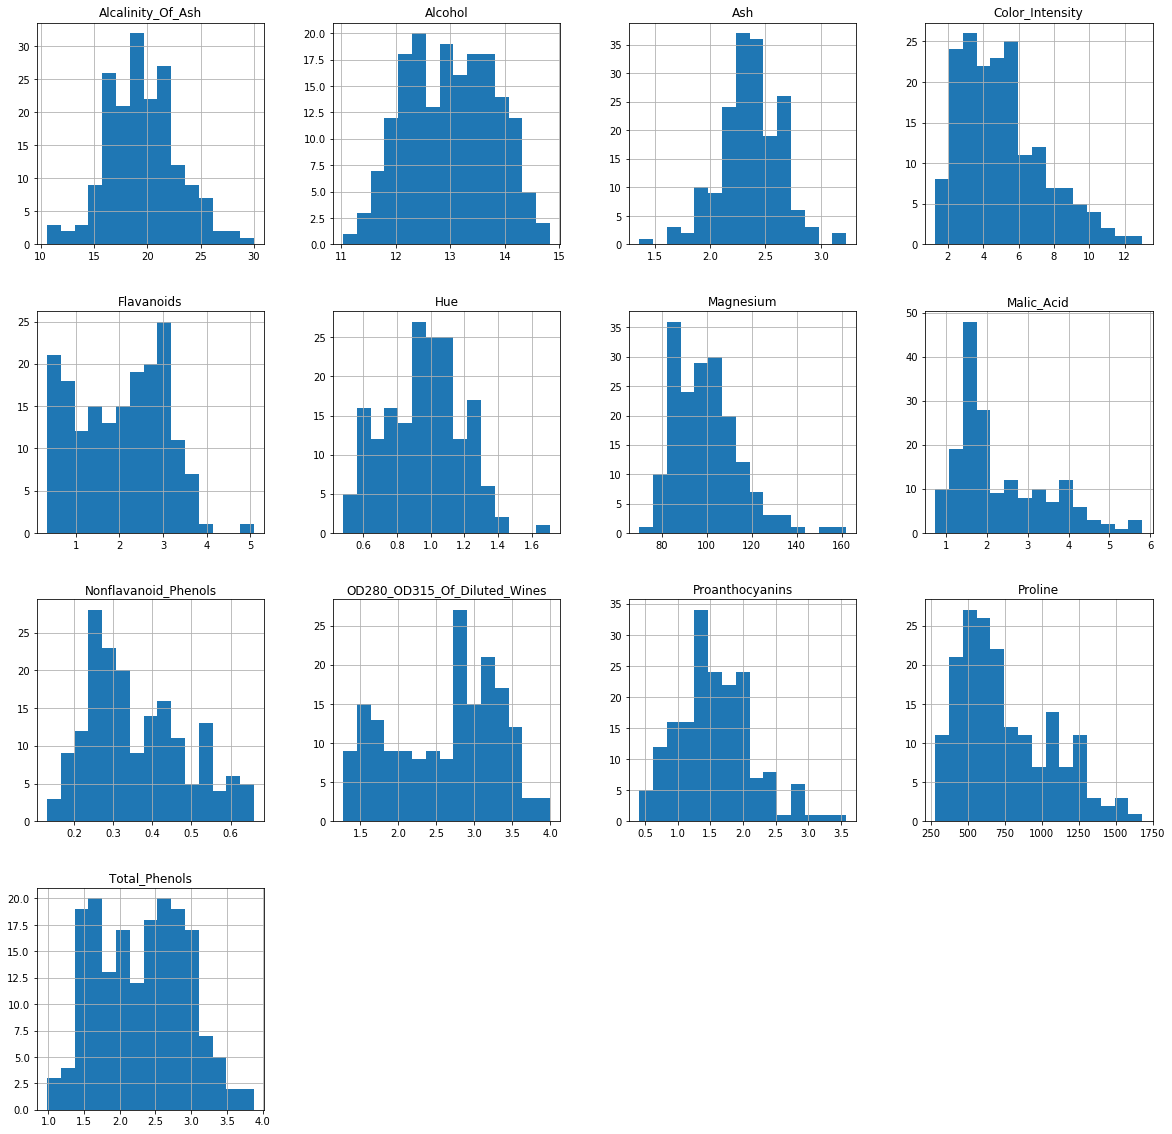

In [8]:
wine_data.loc[:, wine_data.columns != 'Y_WC'].hist(bins=15, figsize=(20,20))
print('Plotting attribute distributions')
plt.show()

Sample total:  178


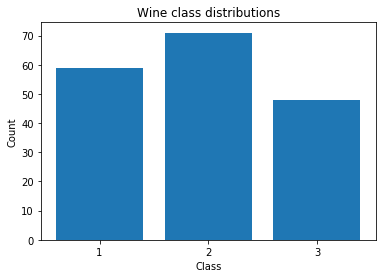

In [9]:
wine_unique_labels = wine_data['Y_WC'].unique()
print('Sample total: ', len(wine_data))
plt.bar(range(len(wine_unique_labels)), [
    len(wine_data[wine_data['Y_WC'] == wine_unique_labels[0]]),
    len(wine_data[wine_data['Y_WC'] == wine_unique_labels[1]]),
    len(wine_data[wine_data['Y_WC'] == wine_unique_labels[2]])
])
plt.xticks(range(len(wine_unique_labels)), wine_unique_labels)
plt.title('Wine class distributions')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

Attribute distribution for feature Y_WC:


c:\users\user\.conda\envs\tf-std\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


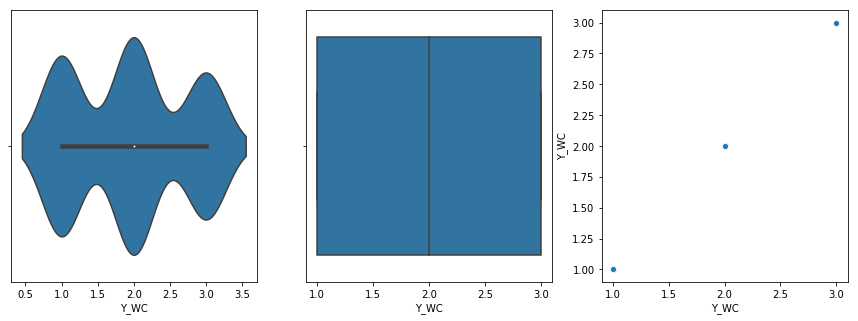

Attribute distribution for feature Alcohol:


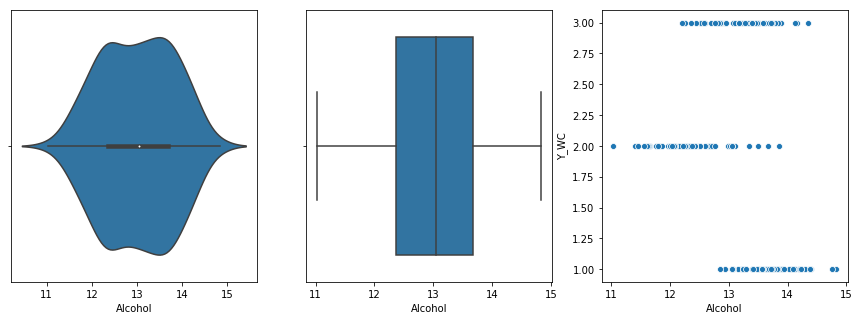

Attribute distribution for feature Malic_Acid:


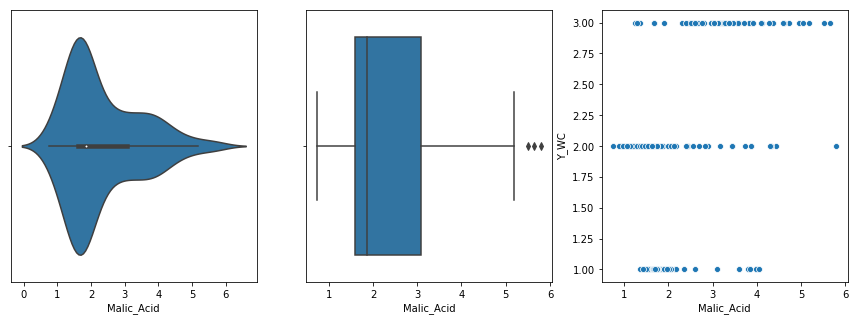

Attribute distribution for feature Ash:


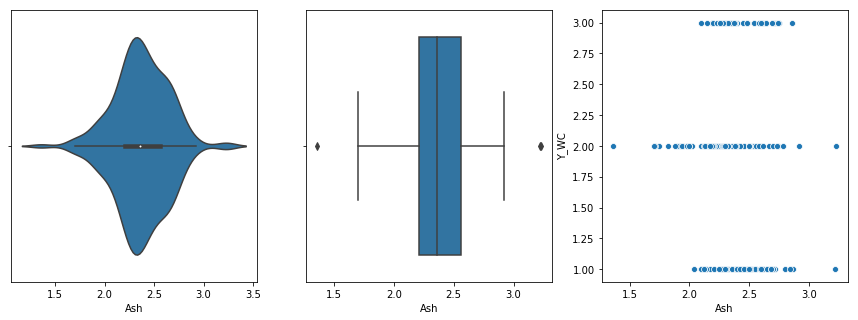

Attribute distribution for feature Alcalinity_Of_Ash:


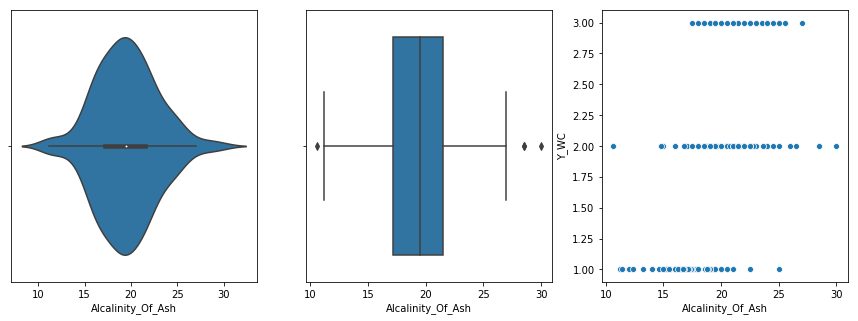

Attribute distribution for feature Magnesium:


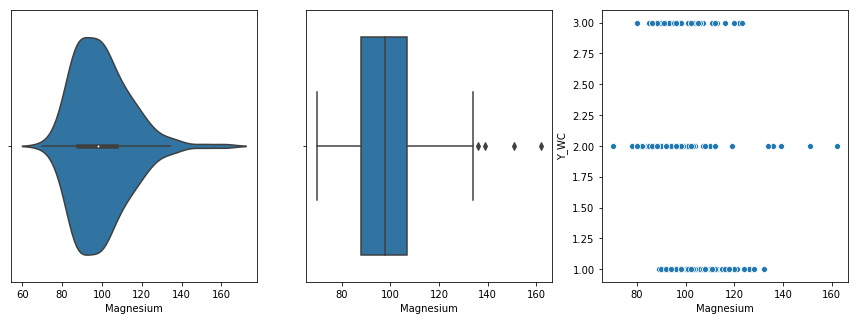

Attribute distribution for feature Total_Phenols:


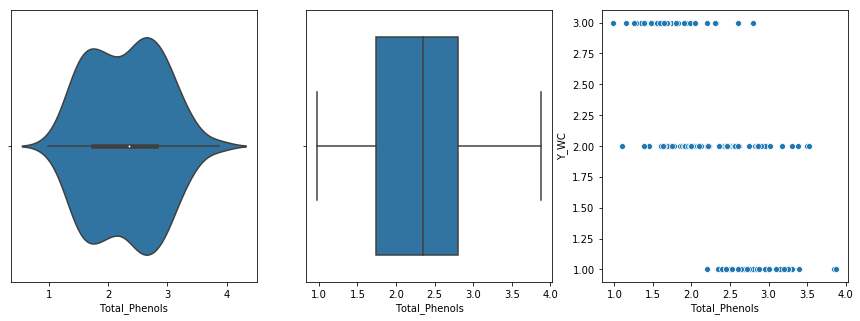

Attribute distribution for feature Flavanoids:


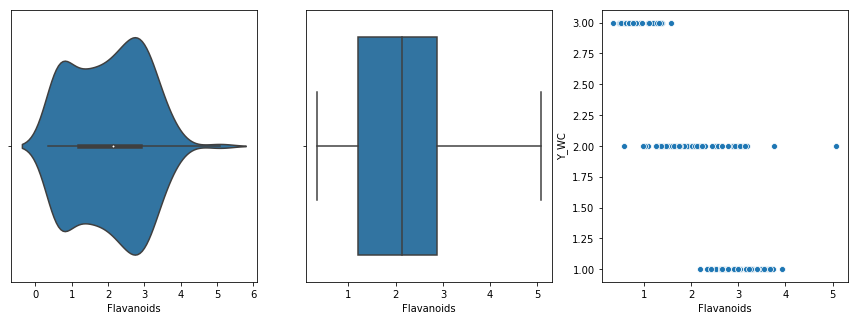

Attribute distribution for feature Nonflavanoid_Phenols:


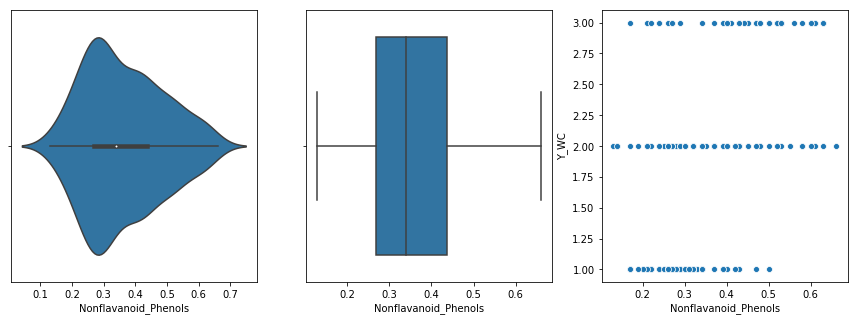

Attribute distribution for feature Proanthocyanins:


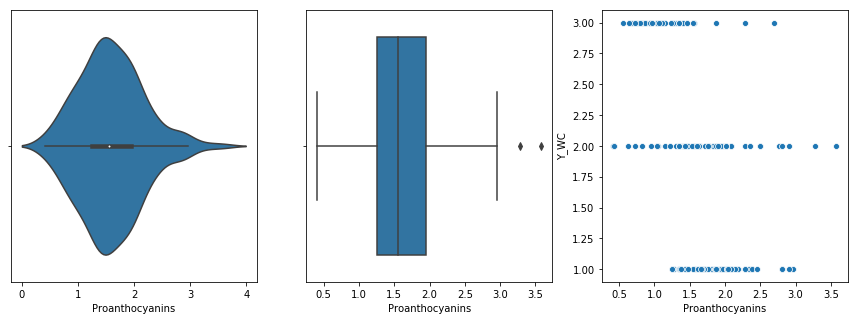

Attribute distribution for feature Color_Intensity:


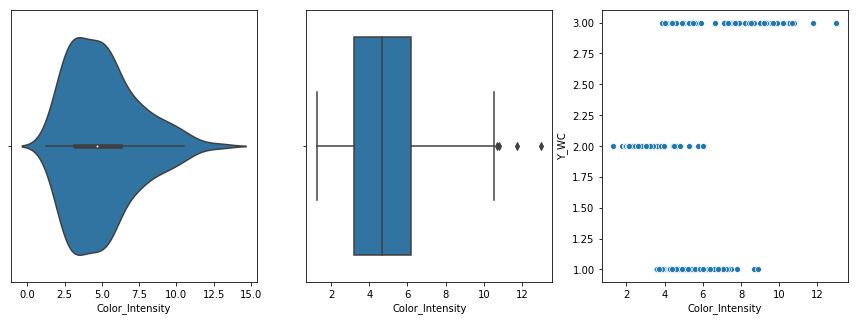

Attribute distribution for feature Hue:


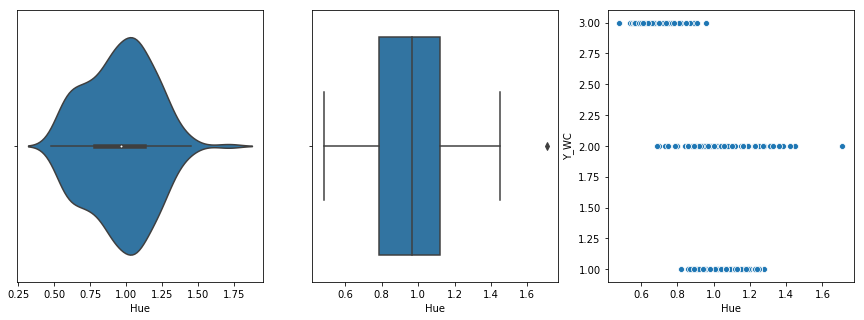

Attribute distribution for feature OD280_OD315_Of_Diluted_Wines:


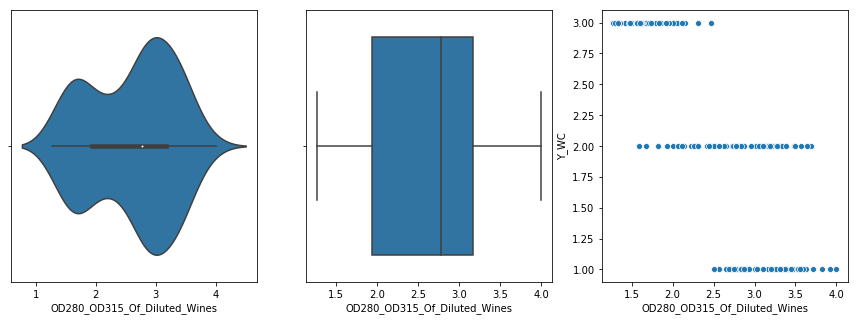

Attribute distribution for feature Proline:


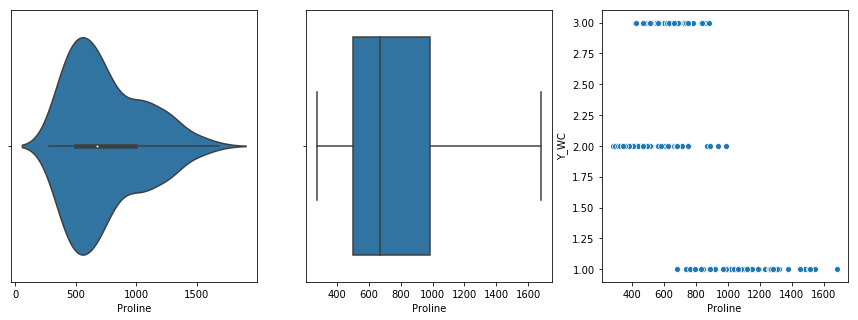

In [10]:
for feature in wine_data.dtypes[wine_data.dtypes != object].index:
    print('Attribute distribution for feature {}:'.format(feature))
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    sns.violinplot(x=feature, data=wine_data)
    plt.subplot(1, 3, 2)
    sns.boxplot(x=feature, data=wine_data)
    plt.subplot(1, 3, 3)
    sns.scatterplot(x=feature, y='Y_WC', data=wine_data)
    plt.show()

### Split the data

In [11]:
wine_labels = wine_data['Y_WC']
wine_features = wine_data.drop('Y_WC', axis=1)

In [12]:
wine_train = wine_features.sample(frac=0.7, random_state=42) #random state is a seed value
wine_labels_train = wine_labels[wine_train.index]
wine_test = wine_features.drop(wine_train.index)
wine_labels_test = wine_labels[wine_test.index]

In [13]:
print('Training samples:', wine_train.shape, wine_labels_train.shape)

Training samples: (125, 13) (125,)


In [14]:
print('Test samples:', wine_test.shape, wine_labels_test.shape)

Test samples: (53, 13) (53,)


In [15]:
for i in range(len(wine_unique_labels)):
    print('Train data from class {}: {}'.format(i+1, len(wine_labels_train[wine_labels_train == i+1])))
    print('Test data from class {}: {}'.format(i+1, len(wine_labels_test[wine_labels_test == i+1])))

Train data from class 1: 44
Test data from class 1: 15
Train data from class 2: 50
Test data from class 2: 21
Train data from class 3: 31
Test data from class 3: 17


### Implementing the decision tree

#### Check if the current split contains only one class

In [1]:
def check_purity(labels):
    '''
    Checks whether only one class is present in the list of samples.
    
        Args:
            labels(pd.Series): the annotations for the current tree split
            
        Returns:
            True, False
    '''
    unique_labels = labels.unique()
    if len(unique_labels) == 1:
        return True
    return False

In [17]:
check_purity(wine_labels_train)

False

In [18]:
print(wine_labels_train[:2])

19    1
45    1
Name: Y_WC, dtype: int64


In [19]:
check_purity(wine_labels_train[:2])

True

#### Perform a majority classification

In [20]:
def infer_majority(labels):
    '''
    Makes a new prediction based on the majority class in the tree split.
    
        Args:
            labels(pd.Series): the annotations for the current tree split
            
        Returns:
            unique_labels(pd.Series): the predicted label classes (with the highest amount of samples)
    '''
    unique_labels = labels.unique()
    unique_values = []
    for i in range(len(unique_labels)):
        unique_values.append(len(labels[labels == unique_labels[i]]))
    return unique_labels[np.argmax(unique_values)]

In [21]:
print(wine_labels_train[6:12])

119    2
174    3
109    2
141    3
24     1
150    3
Name: Y_WC, dtype: int64


In [22]:
infer_majority(wine_labels_train[6:12])

3

#### Get all possible tree splits for each attribute

In [23]:
def get_tree_splits(attributes):
    '''
    Creates a dictionary of all possible splits in each data point over each attribute.
    This is done by sorting the values and fitting a line between each two pairs of data points.
    
        Args:
            attributes(pd.DataFrame): the input features from the dataset
            
        Returns:
            potential_splits(dict): a dictionary containing all the possible splits
    '''
    potential_splits = {}
    for col_idx in range(attributes.shape[1]):
        potential_splits[col_idx] = []
        #print(attributes.iloc[:, col_idx])
        unique_attr = np.sort(attributes.iloc[:, col_idx].unique())
        for attr_idx in range(1, len(unique_attr)):
            cur_val = unique_attr[attr_idx]
            prev_val = unique_attr[attr_idx - 1]
            split_val = (cur_val + prev_val) / 2
            potential_splits[col_idx].append(split_val)
            
    return potential_splits

In [24]:
get_tree_splits(wine_train)

{0: [11.219999999999999,
  11.43,
  11.53,
  11.614999999999998,
  11.64,
  11.71,
  11.774999999999999,
  11.8,
  11.825,
  11.855,
  11.934999999999999,
  12.035,
  12.075,
  12.120000000000001,
  12.165,
  12.184999999999999,
  12.205,
  12.215,
  12.235,
  12.27,
  12.309999999999999,
  12.344999999999999,
  12.364999999999998,
  12.395,
  12.425,
  12.45,
  12.49,
  12.515,
  12.524999999999999,
  12.555,
  12.59,
  12.620000000000001,
  12.655000000000001,
  12.684999999999999,
  12.71,
  12.745000000000001,
  12.79,
  12.815000000000001,
  12.83,
  12.844999999999999,
  12.86,
  12.899999999999999,
  12.96,
  13.01,
  13.04,
  13.06,
  13.09,
  13.135,
  13.165,
  13.2,
  13.235,
  13.26,
  13.29,
  13.32,
  13.35,
  13.375,
  13.395,
  13.405000000000001,
  13.43,
  13.465,
  13.485,
  13.495000000000001,
  13.504999999999999,
  13.515,
  13.54,
  13.57,
  13.6,
  13.625,
  13.635000000000002,
  13.655000000000001,
  13.675,
  13.695,
  13.72,
  13.74,
  13.754999999999999,
  1

In [25]:
wine_train.head()

Alcohol  Malic_Acid   Ash  Alcalinity_Of_Ash  Magnesium  Total_Phenols  \
19     13.64        3.10  2.56               15.2        116           2.70   
45     14.21        4.04  2.44               18.9        111           2.85   
140    12.93        2.81  2.70               21.0         96           1.54   
30     13.73        1.50  2.70               22.5        101           3.00   
67     12.37        1.17  1.92               19.6         78           2.11   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
19         3.03                  0.17             1.66             5.10  0.96   
45         2.65                  0.30             1.25             5.24  0.87   
140        0.50                  0.53             0.75             4.60  0.77   
30         3.25                  0.29             2.38             5.70  1.19   
67         2.00                  0.27             1.04             4.68  1.12   

     OD280_OD315_Of_Diluted_Wines  Proline  
19                           3.36      845  
45                           3.33     1080  
140                          2.31      600  
30                           2.71     1285  
67                           3.48      510

c:\users\user\.conda\envs\tf-std\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


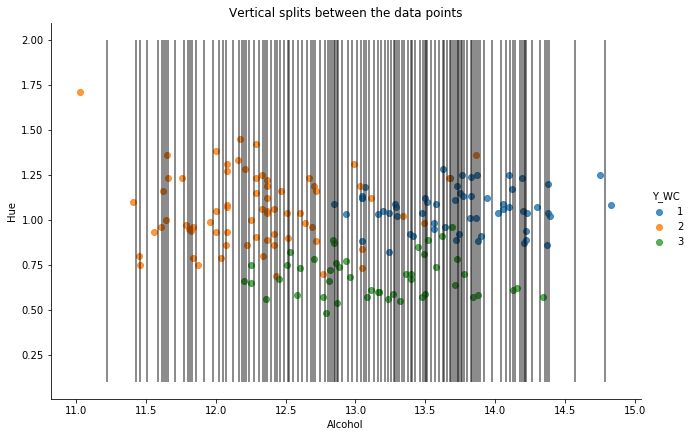

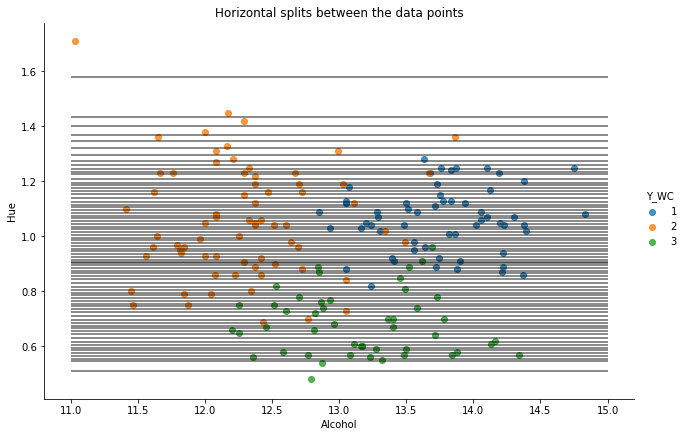

In [26]:
sns.lmplot('Alcohol', 'Hue', wine_data, hue='Y_WC', fit_reg=False, size=6, aspect=1.5)
plt.vlines(x=get_tree_splits(wine_data)[1], ymin=0.1, ymax=2, alpha=0.6)
plt.title('Vertical splits between the data points')
plt.show()
sns.lmplot('Alcohol', 'Hue', wine_data, hue='Y_WC', fit_reg=False, size=6, aspect=1.5)
plt.hlines(y=get_tree_splits(wine_data)[11], xmin=11, xmax=15, alpha=0.6)
plt.title('Horizontal splits between the data points')
plt.show()

#### Split the tree based on conditions

In [27]:
def split_condition(data, split_attr, split_val):
    '''
    Splits the input features DataFrame in two, based on an input attribute value. 
    
        Args:
            data(pd.DataFrame): the input features
            split_attr(int): the index of the target attribute column
            split_val(int): the center-point value for the split
            
        Returns:
            data_left(pd.DataFrame): the data points <= the split value
            data_right(pd.DataFrame): the data points > the split value
    '''
    split_attr_data = data.iloc[:, split_attr]
    data_left = data[split_attr_data <= split_val]
    data_right = data[split_attr_data > split_val]
    
    return data_left, data_right

In [28]:
split_val = 12
split_attr = 1

In [29]:
wine_left, wine_right = split_condition(wine_data, split_attr, split_val)

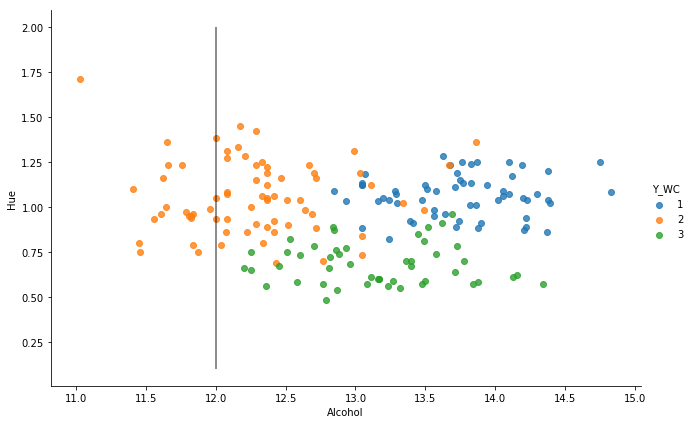

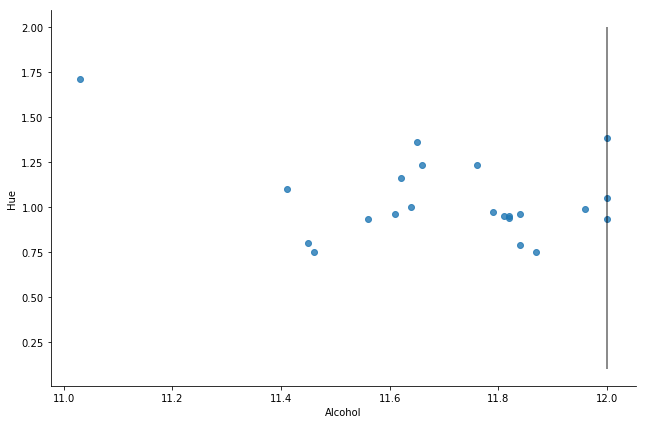

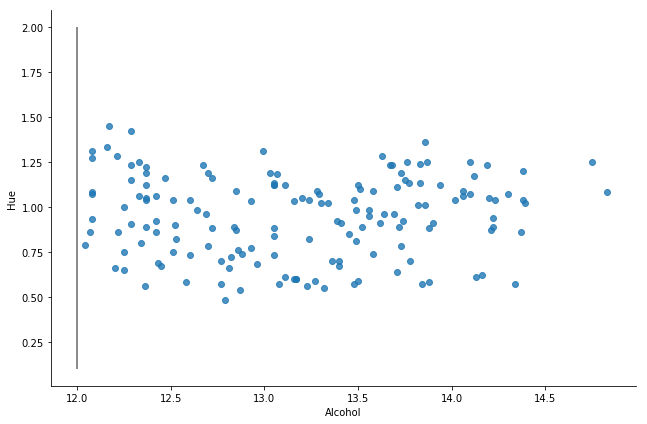

In [30]:
wine_left_plot = pd.DataFrame(wine_left, columns=wine_data.columns)
wine_right_plot = pd.DataFrame(wine_right, columns=wine_data.columns)

sns.lmplot('Alcohol', 'Hue', wine_data, hue='Y_WC', fit_reg=False, height=6, aspect=1.5)
plt.vlines(x=split_val, ymin=0.1, ymax=2, alpha=0.6)
plt.show()
sns.lmplot('Alcohol', 'Hue', wine_left_plot, fit_reg=False, height=6, aspect=1.5)
plt.vlines(x=split_val, ymin=0.1, ymax=2, alpha=0.6)
plt.show()
sns.lmplot('Alcohol', 'Hue', wine_right_plot, fit_reg=False, height=6, aspect=1.5)
plt.vlines(x=split_val, ymin=0.1, ymax=2, alpha=0.6)
plt.show()

#### Calculate loss

In [31]:
def get_entropy(labels):
    '''
    Calculates the entropy for the current split. 
    
        Args:
            labels(pd.Series): the current annotations for the split
            
        Returns:
            entropy(float): the Entropy value
    '''
    unique_labels = labels.unique()
    unique_values = []
    for i in range(len(unique_labels)):
        unique_values.append(len(labels[labels == unique_labels[i]]))
    
    probs = (unique_values / np.sum(unique_values))
    entropy = np.sum(probs * (-np.log(probs)), axis=0)
    return entropy

In [32]:
get_entropy(wine_left.iloc[:, 0])

0.0

In [33]:
get_entropy(wine_right.iloc[:, 0])

1.094140928265967

In [34]:
def get_full_entropy(labels_left, labels_right):
    '''
    Calculates the combined entropy from the left and right child nodes of the tree
    to get the total Information Gain for the current depth.
    
        Args:
            labels_left(pd.Series): the annotations <= the split value
            labels_right(pd.Series): the annotations > the split value
            
        Returns:
            entropy(float): the Entropy value
    '''
    n_left = len(labels_left)
    n_right = len(labels_right)
    n_total = n_left + n_right
    prob_labels_left = n_left / n_total
    prob_labels_right = n_right / n_total
    full_entropy = (prob_labels_left * get_entropy(labels_left)) + (
        prob_labels_right * get_entropy(labels_right))

    return full_entropy

In [35]:
get_full_entropy(wine_left.iloc[:, 0], wine_right.iloc[:, 0])

0.9589100270196117

In [36]:
def get_gini_coeff(labels):
    '''
    Calculates the Gini coefficient for the current data split.
    
        Args:
            labels(pd.Series): the current annotations for the split
            
        Returns:
            g(float): the Gini coefficient value
    '''
    # Mean absolute difference
    mad = np.abs(np.subtract.outer(labels, labels)).mean()
    # Relative mean absolute difference
    rmad = mad/np.mean(labels)
    # Gini coefficient
    g = 0.5 * rmad
    return g

In [37]:
get_gini_coeff(wine_left.iloc[:, 0])

0.0

In [38]:
get_gini_coeff(wine_right.iloc[:, 0])

0.232281284606866

In [39]:
def get_full_gini(labels_left, labels_right):
    '''
    Calculates the combined Gini index from the left and right child nodes of the tree
    to get the total Information Gain for the current depth.
    
        Args:
            labels_left(pd.Series): the annotations <= the split value
            labels_right(pd.Series): the annotations > the split value
            
        Returns:
            full_gini(float): the combined Gini coefficient
    '''
    n_left = len(labels_left)
    n_right = len(labels_right)
    n_total = n_left + n_right
    prob_labels_left = n_left / n_total
    prob_labels_right = n_right / n_total
    
    full_gini = (prob_labels_left * get_gini_coeff(labels_left)) + (
        prob_labels_right * get_gini_coeff(labels_right))

    return full_gini

In [40]:
def get_best_split(attributes, labels, criterion='entropy'):
    '''
    Estimates and returns the best tree split, based on the chosen criterion.
    
        Args:
            attributes(pd.DataFrame): the input features of the current split
            labels(pd.Series): the input annotations of the current split
            criterion(str): ['entropy', 'gini'] - the measure to calculate the Information Gain
        Returns:
            best_split_attr(pd.DataFrame): the best found attribute to split on for the chosen criterion
            best_split_val(pd.Series): the best found split value of the attribute
    '''
    print('Finding best split..')
    best_measure = 10000
    all_splits = get_tree_splits(attributes)
    attributes_full = attributes.copy()
    attributes_full['label'] = labels
    for attr_idx in all_splits:
        for attr_val in all_splits[attr_idx]:
            attr_left, attr_right = split_condition(attributes_full, attr_idx, attr_val)
            if criterion == 'entropy':
                cur_measure = get_full_entropy(attr_left.iloc[:, -1], attr_right.iloc[:, -1])
            else:
                cur_measure = get_full_gini(attr_left.iloc[:, -1], attr_right.iloc[:, -1])
            
            if cur_measure <= best_measure:
                best_measure = cur_measure
                best_split_attr = attr_idx
                best_split_val = attr_val
                print('Index {}: Better split found with loss {}'.format(attr_idx, round(cur_measure, 3)))
                
    print('Best Split Attribute Index: ', best_split_attr)
    print('Best Split Value: ', best_split_val)
    return best_split_attr, best_split_val

In [41]:
best_split_attr_ent, best_split_val_ent = get_best_split(wine_train, wine_labels_train)

Finding best split..
Index 0: Better split found with loss 1.072
Index 0: Better split found with loss 1.065
Index 0: Better split found with loss 1.057
Index 0: Better split found with loss 1.05
Index 0: Better split found with loss 1.042
Index 0: Better split found with loss 1.034
Index 0: Better split found with loss 1.026
Index 0: Better split found with loss 1.018
Index 0: Better split found with loss 1.01
Index 0: Better split found with loss 0.993
Index 0: Better split found with loss 0.984
Index 0: Better split found with loss 0.966
Index 0: Better split found with loss 0.957
Index 0: Better split found with loss 0.919
Index 0: Better split found with loss 0.909
Index 0: Better split found with loss 0.899
Index 0: Better split found with loss 0.895
Index 0: Better split found with loss 0.873
Index 0: Better split found with loss 0.839
Index 0: Better split found with loss 0.802
Index 0: Better split found with loss 0.789
Index 0: Better split found with loss 0.775
Index 0: Bett

In [43]:
best_split_attr_gini, best_split_val_gini = get_best_split(wine_train, wine_labels_train, criterion='gini')

Finding best split..
Index 0: Better split found with loss 0.218
Index 0: Better split found with loss 0.217
Index 0: Better split found with loss 0.217
Index 0: Better split found with loss 0.216
Index 0: Better split found with loss 0.215
Index 0: Better split found with loss 0.214
Index 0: Better split found with loss 0.214
Index 0: Better split found with loss 0.213
Index 0: Better split found with loss 0.212
Index 0: Better split found with loss 0.21
Index 0: Better split found with loss 0.21
Index 0: Better split found with loss 0.208
Index 0: Better split found with loss 0.207
Index 0: Better split found with loss 0.203
Index 0: Better split found with loss 0.202
Index 0: Better split found with loss 0.201
Index 0: Better split found with loss 0.201
Index 0: Better split found with loss 0.201
Index 0: Better split found with loss 0.198
Index 0: Better split found with loss 0.195
Index 0: Better split found with loss 0.191
Index 0: Better split found with loss 0.19
Index 0: Bette

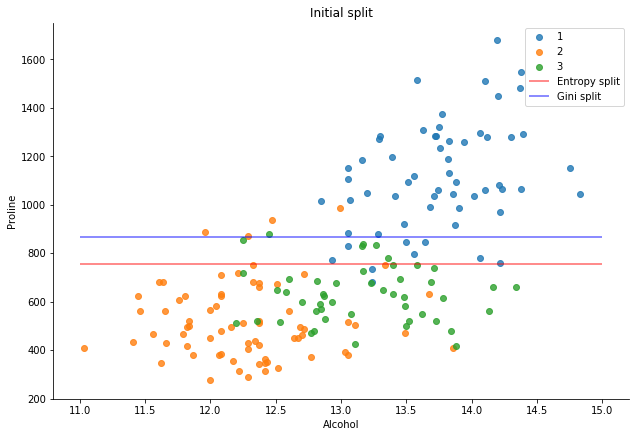

In [44]:
wine_train_plot = wine_train.copy()
wine_train_plot['label'] = wine_labels_train
sns.lmplot('Alcohol', 'Proline', wine_data, hue='Y_WC', fit_reg=False, height=6, aspect=1.5, legend=False)
plt.hlines(y=best_split_val_ent, xmin=11, xmax=15, alpha=0.6, color='red', label='Entropy split')
plt.hlines(y=best_split_val_gini, xmin=11, xmax=15, alpha=0.6, color='blue', label='Gini split')
plt.title('Initial split')
plt.legend()
plt.show()

#### Creating the decision tree

In [45]:
def make_decision_tree(attributes, labels, counter=0, criterion='entropy', 
                       min_samples_per_split=2, max_depth=5, split_label='root'):
    '''
    Implements the decision tree by recursively searching for the best split attribute and value.
    After the tree is successfully built, it is traversed and saved to a dictionary for printing.
    
        Args:
            attributes(pd.DataFrame): the input features of the dataset
            labels(pd.Series): the input annotations of the dataset
            counter(int): global counter for the recursion level
            criterion(str): ['entropy', 'gini'] - the measure to calculate the Information Gain
            min_samples_per_split(int): the minimum amount of nodes for each tree layer
            max_depth(int): pruning the tree by limiting the maximum depth
            split_label(str): the name of the current parent node that is being split
        Returns:
            tree_predictions(list): the list of predicted labels
    '''
    #print('Counter:', counter)
    # base case
    if (check_purity(labels)) or (len(attributes) < min_samples_per_split) or (counter >= max_depth):
        tree_predictions = infer_majority(labels)
        #print('Prediction:', tree_predictions)
        return tree_predictions
    
    counter += 1
    print()
    print('Split position: ', split_label)
    print()
    # helper functions 
    split_attr, split_val = get_best_split(attributes, labels, criterion)
    # merge dataset and perform split
    attributes_full = attributes.copy()
    attributes_full['label'] = labels
    attr_left, attr_right = split_condition(attributes_full, split_attr, split_val)
    
    # split the dataset into attributes and labels again
    attr_labels_left = attr_left['label']
    attr_left = attr_left.drop('label', axis=1)
    attr_labels_right = attr_right['label']
    attr_right = attr_right.drop('label', axis=1)
    
    #create subtrees
    node = "{} <= {}".format(attributes.columns[split_attr], split_val)
    sub_tree = {node: []}
    
    #recursively search through all the decisions
    decision_yes = make_decision_tree(attr_left, attr_labels_left, counter, criterion, min_samples_per_split, max_depth, split_label='left')
    decision_no = make_decision_tree(attr_right, attr_labels_right, counter, criterion, min_samples_per_split, max_depth, split_label='right')
    
    sub_tree[node].append(decision_yes)
    sub_tree[node].append(decision_no)
    
    return sub_tree

In [46]:
decision_tree = make_decision_tree(wine_train, wine_labels_train)


Split position:  root

Finding best split..
Index 0: Better split found with loss 1.072
Index 0: Better split found with loss 1.065
Index 0: Better split found with loss 1.057
Index 0: Better split found with loss 1.05
Index 0: Better split found with loss 1.042
Index 0: Better split found with loss 1.034
Index 0: Better split found with loss 1.026
Index 0: Better split found with loss 1.018
Index 0: Better split found with loss 1.01
Index 0: Better split found with loss 0.993
Index 0: Better split found with loss 0.984
Index 0: Better split found with loss 0.966
Index 0: Better split found with loss 0.957
Index 0: Better split found with loss 0.919
Index 0: Better split found with loss 0.909
Index 0: Better split found with loss 0.899
Index 0: Better split found with loss 0.895
Index 0: Better split found with loss 0.873
Index 0: Better split found with loss 0.839
Index 0: Better split found with loss 0.802
Index 0: Better split found with loss 0.789
Index 0: Better split found with 

In [47]:
import pprint
pp = pprint.PrettyPrinter()
pp.pprint(decision_tree)

{'Proline <= 755.0': [{'Color_Intensity <= 4.13': [2,
                                                   {'Hue <= 0.9450000000000001': [3,
                                                                                  {'Proline <= 706.5': [2,
                                                                                                        1]}]}]},
                      {'OD280_OD315_Of_Diluted_Wines <= 2.6399999999999997': [{'Proline <= 896.0': [3,
                                                                                                    2]},
                                                                              {'Hue <= 1.295': [1,
                                                                                                2]}]}]}


#### Predictions and evaluation

In [48]:
def predict_sample(decision_tree, sample):
    '''
    Predicts the class for a single example by traversing the tree recursively to find the correct decision node.
    
        Args:
            decision_tree(dict): the learned decision tree in dictionary format
            sample(pd.Series): a series of attribute values for prediction
        Returns:
            prediction(str): a value representing the predicted class
    '''
    decisions = list(decision_tree.keys())[0]
    feature_name, comparison_operator, value = decisions.split(" ")

    # determine split based on sample
    if sample[feature_name] <= float(value):
        prediction = decision_tree[decisions][0]
    else:
        prediction = decision_tree[decisions][1]

    # base case
    if not isinstance(prediction, dict):
        return prediction
    
    # traverse the tree recursively to find the decision
    rec_tree = prediction
    return predict_sample(rec_tree, sample)

In [49]:
sample = wine_test.iloc[25]
print(sample)
print('Sample true label:', wine_labels_test.iloc[25])

Alcohol                          12.00
Malic_Acid                        1.51
Ash                               2.42
Alcalinity_Of_Ash                22.00
Magnesium                        86.00
Total_Phenols                     1.45
Flavanoids                        1.25
Nonflavanoid_Phenols              0.50
Proanthocyanins                   1.63
Color_Intensity                   3.60
Hue                               1.05
OD280_OD315_Of_Diluted_Wines      2.65
Proline                         450.00
Name: 91, dtype: float64
Sample true label: 2


In [50]:
predict_sample(decision_tree, sample)

2

In [51]:
def evaluate_tree(decision_tree, test_attr, test_labels):
    '''
    Computes the classification accuracy by counting the incorrect and correct samples in the prediction list.
    
        Args:
            decision_tree(dict): the learned decision tree in dictionary format
            test_attr(pd.DataFrame): the input test features for prediction
            test_labels(pd.Series): the input test labels for prediction
        Returns:
            
    '''
    predictions = []
    for i in range(len(test_attr)):
        prediction = predict_sample(decision_tree, test_attr.iloc[i])
        predictions.append(prediction)
    correct_preds = (predictions == test_labels)
    n_corr = len(correct_preds[correct_preds == True])
    n_incorr = len(correct_preds[correct_preds == False])
    
    accuracy = round(n_corr / (n_corr + n_incorr), 3)
    print('Correct predictions:', n_corr)
    print('Incorrect predictions:', n_incorr)
    print('Classification accuracy:', accuracy)

In [52]:
def tree_get_predictions(decision_tree, test_attr):
    '''
    Returns a list of all the predicted samples from a DataFrame of features.
    
        Args:
            decision_tree(dict): the learned decision tree in dictionary format
            test_attr(pd.DataFrame): the input test features for prediction
        Returns:
            
    '''
    predictions = []
    for i in range(len(test_attr)):
        prediction = predict_sample(decision_tree, test_attr.iloc[i])
        predictions.append(prediction)
    return predictions

In [53]:
print('Evaluating training set..')
evaluate_tree(decision_tree, wine_train, wine_labels_train)

Evaluating training set..
Correct predictions: 125
Incorrect predictions: 0
Classification accuracy: 1.0


In [54]:
print('Evaluating test set..')
evaluate_tree(decision_tree, wine_test, wine_labels_test)

Evaluating test set..
Correct predictions: 43
Incorrect predictions: 10
Classification accuracy: 0.811


#### Training under different model settings

#### Gini critertion and max_depth=2

In [59]:
decision_tree = make_decision_tree(wine_train, wine_labels_train, max_depth=2, criterion='gini')


Split position:  root

Finding best split..
Index 0: Better split found with loss 0.218
Index 0: Better split found with loss 0.217
Index 0: Better split found with loss 0.217
Index 0: Better split found with loss 0.216
Index 0: Better split found with loss 0.215
Index 0: Better split found with loss 0.214
Index 0: Better split found with loss 0.214
Index 0: Better split found with loss 0.213
Index 0: Better split found with loss 0.212
Index 0: Better split found with loss 0.21
Index 0: Better split found with loss 0.21
Index 0: Better split found with loss 0.208
Index 0: Better split found with loss 0.207
Index 0: Better split found with loss 0.203
Index 0: Better split found with loss 0.202
Index 0: Better split found with loss 0.201
Index 0: Better split found with loss 0.201
Index 0: Better split found with loss 0.201
Index 0: Better split found with loss 0.198
Index 0: Better split found with loss 0.195
Index 0: Better split found with loss 0.191
Index 0: Better split found with 

In [60]:
import pprint
pp = pprint.PrettyPrinter()
pp.pprint(decision_tree)

{'Proline <= 867.5': [{'Flavanoids <= 1.225': [3, 2]},
                      {'Color_Intensity <= 3.5250000000000004': [2, 1]}]}


In [61]:
print('Evaluating training set..')
evaluate_tree(decision_tree, wine_train, wine_labels_train)

Evaluating training set..
Correct predictions: 115
Incorrect predictions: 10
Classification accuracy: 0.92


In [62]:
print('Evaluating test set..')
evaluate_tree(decision_tree, wine_test, wine_labels_test)

Evaluating test set..
Correct predictions: 44
Incorrect predictions: 9
Classification accuracy: 0.83


#### Gini criterion / max_depth=unlimited

In [63]:
decision_tree = make_decision_tree(wine_train, wine_labels_train, criterion='gini')


Split position:  root

Finding best split..
Index 0: Better split found with loss 0.218
Index 0: Better split found with loss 0.217
Index 0: Better split found with loss 0.217
Index 0: Better split found with loss 0.216
Index 0: Better split found with loss 0.215
Index 0: Better split found with loss 0.214
Index 0: Better split found with loss 0.214
Index 0: Better split found with loss 0.213
Index 0: Better split found with loss 0.212
Index 0: Better split found with loss 0.21
Index 0: Better split found with loss 0.21
Index 0: Better split found with loss 0.208
Index 0: Better split found with loss 0.207
Index 0: Better split found with loss 0.203
Index 0: Better split found with loss 0.202
Index 0: Better split found with loss 0.201
Index 0: Better split found with loss 0.201
Index 0: Better split found with loss 0.201
Index 0: Better split found with loss 0.198
Index 0: Better split found with loss 0.195
Index 0: Better split found with loss 0.191
Index 0: Better split found with 

Index 2: Better split found with loss 0.009
Index 2: Better split found with loss 0.007
Best Split Attribute Index:  2
Best Split Value:  2.825

Split position:  right

Finding best split..
Index 0: Better split found with loss 0.024
Index 0: Better split found with loss 0.01
Index 4: Better split found with loss 0.01
Index 4: Better split found with loss 0.0
Index 9: Better split found with loss 0.0
Best Split Attribute Index:  9
Best Split Value:  3.5250000000000004


In [64]:
import pprint
pp = pprint.PrettyPrinter()
pp.pprint(decision_tree)

{'Proline <= 867.5': [{'Flavanoids <= 1.225': [{'Hue <= 0.9299999999999999': [3,
                                                                              2]},
                                               {'Proline <= 755.0': [{'Hue <= 0.6399999999999999': [3,
                                                                                                    {'Ash <= 2.825': [2,
                                                                                                                      1]}]},
                                                                     1]}]},
                      {'Color_Intensity <= 3.5250000000000004': [2, 1]}]}


In [65]:
print('Evaluating training set..')
evaluate_tree(decision_tree, wine_train, wine_labels_train)

Evaluating training set..
Correct predictions: 124
Incorrect predictions: 1
Classification accuracy: 0.992


In [66]:
print('Evaluating test set..')
evaluate_tree(decision_tree, wine_test, wine_labels_test)

Evaluating test set..
Correct predictions: 48
Incorrect predictions: 5
Classification accuracy: 0.906


### Fine-tuning evaluation

In [53]:
def plot_roc(labels_test, labels_pred, class_names=[1, 2, 3]):
    '''
    Computes and plots the ROC curve for each class label along with the average curves.
    
        Args:
            labels_test(pd.Series): the true labels in the test set
            labels_pred(pd.Series): the predicted labels of the model
            class_names(list): the list of possible annotation names
        Returns:
            roc_auc['micro'](float): the micro average AUC value
            roc_auc['macro'](float): the macro average AUC value
    '''
    plt.figure(figsize=(8,8))
    labels_test_bin = label_binarize(labels_test, classes=class_names)
    labels_pred_bin = label_binarize(labels_pred, classes=class_names)
    n_classes = len(class_names)
    
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # Compute ROC curve and ROC area for each class
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(labels_test_bin[:, i], labels_pred_bin[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        
    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
        
    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(labels_test_bin.ravel(), labels_pred_bin.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='maroon', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
             label='macro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["macro"]),
             color='navy', linestyle=':', linewidth=4)
        
    lw = 2
    colors = cycle(['aqua', 'darkorange', 'olive'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()
    return roc_auc['micro'], roc_auc['macro']

In [54]:
def plot_cm(labels_test, labels_pred_test, class_names):
    '''
    Computes and plots the Confusion Matrix for each class label.
    
        Args:
            labels_test(pd.Series): the true labels in the test set
            labels_pred_test(pd.Series): the predicted labels of the model
            class_names(list): the list of possible annotation names
        Returns:
        
    '''
    cm = confusion_matrix(labels_test, labels_pred_test)
    print(cm)
    fig = plt.figure(figsize=(7,7))
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm, cmap=plt.get_cmap('gray'))
    plt.title('Confusion matrix')
    fig.colorbar(cax)
    ax.set_xticklabels([''] + class_names)
    ax.set_yticklabels([''] + class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

In [55]:
def cv_train_eval_tree(data, k=10, y_col='Y_WC', class_names=['1', '2', '3']):
    '''
    Evaluates the tree using K-fold Cross Validation by splitting the training set.
    Evaluates each fold separately using all performance metrics.
    
        Args:
            data(pd.DataFrame): the input features
            k(int): the number of Cross Validation splits
            y_col(str): the name of the prediction column
            class_names(list): the list of possible annotation names
        Returns:
        
    '''
    kfold = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
    # enumerate splits
    counter = 0
    roc_auc = []; fpr = []; tpr = []; train_acc = []; val_acc = []; train_precision_recall_f1_score = []; val_precision_recall_f1_score = [];
    for ind_train, ind_val in kfold.split(data, data[y_col]):
        counter += 1
        data_train = data.iloc[ind_train]
        data_val = data.iloc[ind_val]
        data_labels_train = data_train[y_col]
        data_train = data_train.drop(y_col, axis=1)
        data_labels_val = data_val[y_col]
        data_val = data_val.drop(y_col, axis=1)
        print('CV Split {} ..'.format(counter))
        print()
        decision_tree = make_decision_tree(data_train, data_labels_train, criterion='gini')
        print('Evaluating model..')
        print()
        labels_pred_train = tree_get_predictions(decision_tree, data_train)
        labels_pred_val = tree_get_predictions(decision_tree, data_val)
        
        print('Accuracy score for training data.')
        train_acc_split = accuracy_score(data_labels_train, labels_pred_train)
        train_acc.append(train_acc_split)
        print('Accuracy score for validation data.')
        val_acc_split = accuracy_score(data_labels_val, labels_pred_val)
        val_acc.append(val_acc_split)
        
        print('Classification report for training data.')
        print(classification_report(data_labels_train, labels_pred_train, target_names=class_names))
        t_precision, t_recall, t_f1score, _ = precision_recall_fscore_support(data_labels_train, labels_pred_train)
        train_precision_recall_f1_score.append((t_precision, t_recall, t_f1score))
        print('Classification report for validation data.')
        print(classification_report(data_labels_val, labels_pred_val, target_names=class_names))
        v_precision, v_recall, v_f1score, _ = precision_recall_fscore_support(data_labels_val, labels_pred_val)
        val_precision_recall_f1_score.append((v_precision, v_recall, v_f1score))
        
        print('Confusion matrix for validation data.')
        plot_cm(data_labels_val, labels_pred_val, class_names)
        
        print('Plotting ROC Curve for validation data..')
        roc_auc_micro, roc_auc_macro = plot_roc(data_labels_val, labels_pred_val)
        roc_auc.append((roc_auc_micro, roc_auc_macro))
        
    print()
    print('Mean classification scores...')
    print()
    print('Training accuracy:', round(np.mean(train_acc), 3))
    print('Validation accuracy:', round(np.mean(val_acc), 3))
    print('Training precision:', round(np.mean([i[0] for i in train_precision_recall_f1_score]), 3))
    print('Training recall:', round(np.mean([i[1] for i in train_precision_recall_f1_score]), 3))
    print('Training f1-score:', round(np.mean([i[2] for i in train_precision_recall_f1_score]), 3))
    print('Validation precision:', round(np.mean([i[0] for i in val_precision_recall_f1_score]), 3))
    print('Validation recall:', round(np.mean([i[1] for i in val_precision_recall_f1_score]), 3))
    print('Validation f1-score:', round(np.mean([i[2] for i in val_precision_recall_f1_score]), 3))
    print('AUC Mean Micro Average:', round(np.mean([i[0] for i in roc_auc]), 3))
    print('AUC Mean Macro Average:', round(np.mean([i[1] for i in roc_auc]), 3))

CV Split 1 ..


Split position:  root

Finding best split..
Index 0: Better split found with loss 0.216
Index 0: Better split found with loss 0.215
Index 0: Better split found with loss 0.215
Index 0: Better split found with loss 0.214
Index 0: Better split found with loss 0.214
Index 0: Better split found with loss 0.213
Index 0: Better split found with loss 0.213
Index 0: Better split found with loss 0.212
Index 0: Better split found with loss 0.211
Index 0: Better split found with loss 0.211
Index 0: Better split found with loss 0.21
Index 0: Better split found with loss 0.209
Index 0: Better split found with loss 0.209
Index 0: Better split found with loss 0.207
Index 0: Better split found with loss 0.207
Index 0: Better split found with loss 0.206
Index 0: Better split found with loss 0.205
Index 0: Better split found with loss 0.205
Index 0: Better split found with loss 0.201
Index 0: Better split found with loss 0.2
Index 0: Better split found with loss 0.199
Index 0: Better spl

Index 4: Better split found with loss 0.025
Index 4: Better split found with loss 0.024
Index 4: Better split found with loss 0.022
Index 9: Better split found with loss 0.021
Index 9: Better split found with loss 0.017
Index 10: Better split found with loss 0.017
Index 11: Better split found with loss 0.017
Best Split Attribute Index:  11
Best Split Value:  1.46

Split position:  right

Finding best split..
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better 

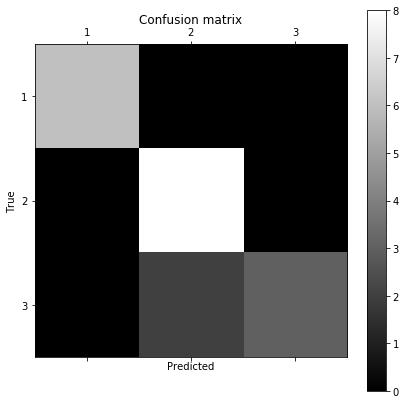

Plotting ROC Curve for validation data..


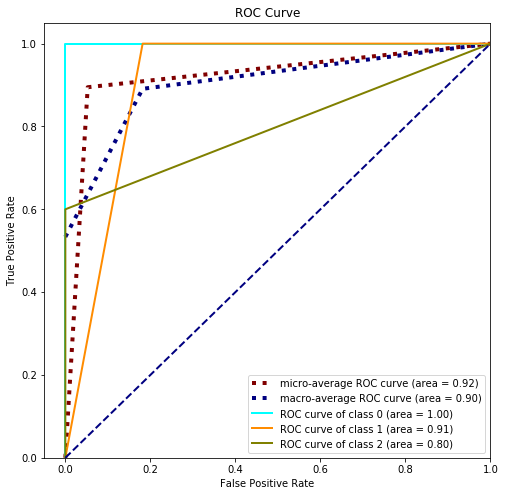

CV Split 2 ..


Split position:  root

Finding best split..
Index 0: Better split found with loss 0.215
Index 0: Better split found with loss 0.215
Index 0: Better split found with loss 0.214
Index 0: Better split found with loss 0.214
Index 0: Better split found with loss 0.213
Index 0: Better split found with loss 0.212
Index 0: Better split found with loss 0.212
Index 0: Better split found with loss 0.211
Index 0: Better split found with loss 0.211
Index 0: Better split found with loss 0.21
Index 0: Better split found with loss 0.209
Index 0: Better split found with loss 0.209
Index 0: Better split found with loss 0.208
Index 0: Better split found with loss 0.207
Index 0: Better split found with loss 0.206
Index 0: Better split found with loss 0.205
Index 0: Better split found with loss 0.204
Index 0: Better split found with loss 0.203
Index 0: Better split found with loss 0.203
Index 0: Better split found with loss 0.199
Index 0: Better split found with loss 0.198
Index 0: Better s

Best Split Attribute Index:  0
Best Split Value:  13.175

Split position:  right

Finding best split..
Index 0: Better split found with loss 0.0
Index 1: Better split found with loss 0.0
Index 4: Better split found with loss 0.0
Index 9: Better split found with loss 0.0
Index 12: Better split found with loss 0.0
Best Split Attribute Index:  12
Best Split Value:  655.0

Split position:  right

Finding best split..
Index 0: Better split found with loss 0.038
Index 0: Better split found with loss 0.02
Index 0: Better split found with loss 0.009
Index 9: Better split found with loss 0.0
Best Split Attribute Index:  9
Best Split Value:  3.5250000000000004
Evaluating model..

Accuracy score for training data.
Accuracy score for validation data.
Classification report for training data.
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        53
           2       1.00      1.00      1.00        64
           3       1.00      1.00      1.00    

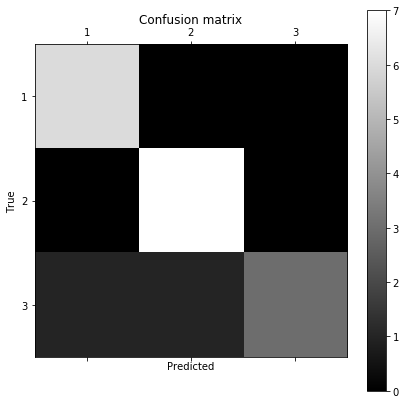

Plotting ROC Curve for validation data..


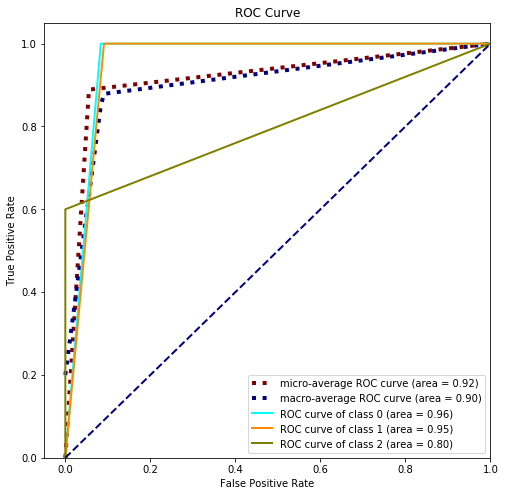

CV Split 3 ..


Split position:  root

Finding best split..
Index 0: Better split found with loss 0.215
Index 0: Better split found with loss 0.215
Index 0: Better split found with loss 0.214
Index 0: Better split found with loss 0.214
Index 0: Better split found with loss 0.213
Index 0: Better split found with loss 0.212
Index 0: Better split found with loss 0.212
Index 0: Better split found with loss 0.211
Index 0: Better split found with loss 0.211
Index 0: Better split found with loss 0.21
Index 0: Better split found with loss 0.209
Index 0: Better split found with loss 0.209
Index 0: Better split found with loss 0.207
Index 0: Better split found with loss 0.206
Index 0: Better split found with loss 0.205
Index 0: Better split found with loss 0.205
Index 0: Better split found with loss 0.203
Index 0: Better split found with loss 0.202
Index 0: Better split found with loss 0.201
Index 0: Better split found with loss 0.198
Index 0: Better split found with loss 0.197
Index 0: Better s

Index 12: Better split found with loss 0.058
Index 12: Better split found with loss 0.055
Index 12: Better split found with loss 0.05
Best Split Attribute Index:  12
Best Split Value:  755.0

Split position:  left

Finding best split..
Index 0: Better split found with loss 0.025
Index 0: Better split found with loss 0.025
Index 0: Better split found with loss 0.025
Index 0: Better split found with loss 0.025
Index 0: Better split found with loss 0.025
Index 0: Better split found with loss 0.025
Index 0: Better split found with loss 0.025
Index 0: Better split found with loss 0.025
Index 0: Better split found with loss 0.025
Index 0: Better split found with loss 0.025
Index 0: Better split found with loss 0.025
Index 0: Better split found with loss 0.025
Index 0: Better split found with loss 0.025
Index 0: Better split found with loss 0.025
Index 0: Better split found with loss 0.025
Index 0: Better split found with loss 0.024
Index 0: Better split found with loss 0.024
Index 0: Better 

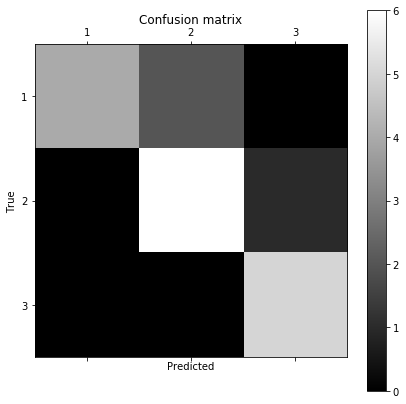

Plotting ROC Curve for validation data..


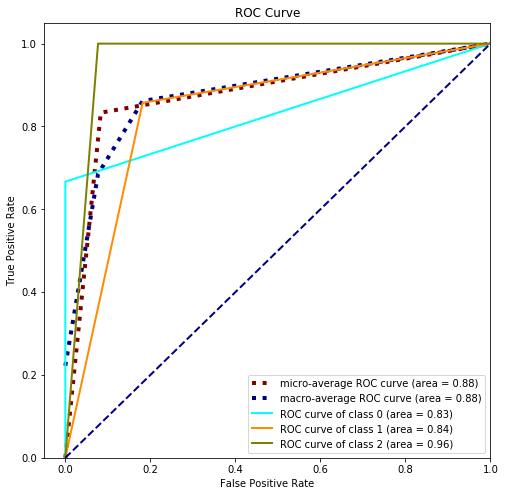

CV Split 4 ..


Split position:  root

Finding best split..
Index 0: Better split found with loss 0.215
Index 0: Better split found with loss 0.215
Index 0: Better split found with loss 0.214
Index 0: Better split found with loss 0.214
Index 0: Better split found with loss 0.213
Index 0: Better split found with loss 0.212
Index 0: Better split found with loss 0.212
Index 0: Better split found with loss 0.211
Index 0: Better split found with loss 0.211
Index 0: Better split found with loss 0.21
Index 0: Better split found with loss 0.209
Index 0: Better split found with loss 0.208
Index 0: Better split found with loss 0.207
Index 0: Better split found with loss 0.207
Index 0: Better split found with loss 0.205
Index 0: Better split found with loss 0.204
Index 0: Better split found with loss 0.203
Index 0: Better split found with loss 0.2
Index 0: Better split found with loss 0.199
Index 0: Better split found with loss 0.198
Index 0: Better split found with loss 0.197
Index 0: Better spl

Index 4: Better split found with loss 0.021
Index 9: Better split found with loss 0.021
Index 9: Better split found with loss 0.017
Index 10: Better split found with loss 0.017
Index 11: Better split found with loss 0.017
Best Split Attribute Index:  11
Best Split Value:  1.445

Split position:  right

Finding best split..
Index 0: Better split found with loss 0.018
Index 0: Better split found with loss 0.018
Index 0: Better split found with loss 0.018
Index 0: Better split found with loss 0.018
Index 0: Better split found with loss 0.018
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better

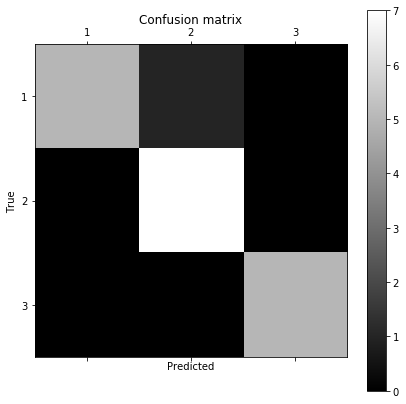

Plotting ROC Curve for validation data..


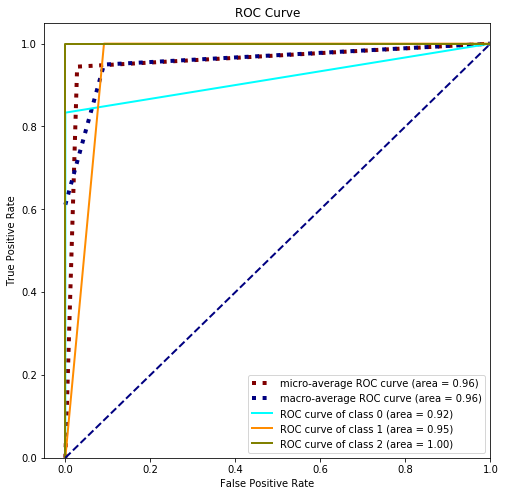

CV Split 5 ..


Split position:  root

Finding best split..
Index 0: Better split found with loss 0.215
Index 0: Better split found with loss 0.215
Index 0: Better split found with loss 0.214
Index 0: Better split found with loss 0.214
Index 0: Better split found with loss 0.213
Index 0: Better split found with loss 0.212
Index 0: Better split found with loss 0.212
Index 0: Better split found with loss 0.211
Index 0: Better split found with loss 0.211
Index 0: Better split found with loss 0.21
Index 0: Better split found with loss 0.209
Index 0: Better split found with loss 0.209
Index 0: Better split found with loss 0.208
Index 0: Better split found with loss 0.207
Index 0: Better split found with loss 0.205
Index 0: Better split found with loss 0.205
Index 0: Better split found with loss 0.204
Index 0: Better split found with loss 0.202
Index 0: Better split found with loss 0.201
Index 0: Better split found with loss 0.2
Index 0: Better split found with loss 0.197
Index 0: Better spl

Index 12: Better split found with loss 0.056
Index 12: Better split found with loss 0.053
Index 12: Better split found with loss 0.049
Best Split Attribute Index:  12
Best Split Value:  726.5

Split position:  left

Finding best split..
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better

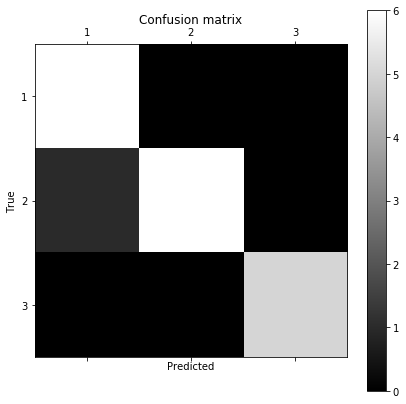

Plotting ROC Curve for validation data..


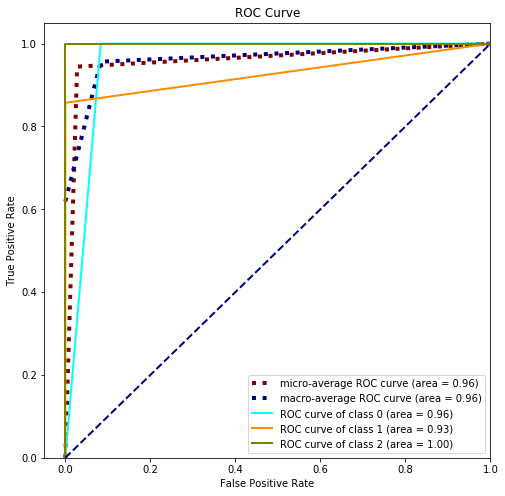

CV Split 6 ..


Split position:  root

Finding best split..
Index 0: Better split found with loss 0.215
Index 0: Better split found with loss 0.215
Index 0: Better split found with loss 0.214
Index 0: Better split found with loss 0.214
Index 0: Better split found with loss 0.213
Index 0: Better split found with loss 0.212
Index 0: Better split found with loss 0.212
Index 0: Better split found with loss 0.211
Index 0: Better split found with loss 0.211
Index 0: Better split found with loss 0.21
Index 0: Better split found with loss 0.209
Index 0: Better split found with loss 0.208
Index 0: Better split found with loss 0.207
Index 0: Better split found with loss 0.206
Index 0: Better split found with loss 0.204
Index 0: Better split found with loss 0.203
Index 0: Better split found with loss 0.203
Index 0: Better split found with loss 0.2
Index 0: Better split found with loss 0.199
Index 0: Better split found with loss 0.198
Index 0: Better split found with loss 0.197
Index 0: Better spl

Index 6: Better split found with loss 0.025
Index 6: Better split found with loss 0.016
Best Split Attribute Index:  6
Best Split Value:  0.7949999999999999

Split position:  right

Finding best split..
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index

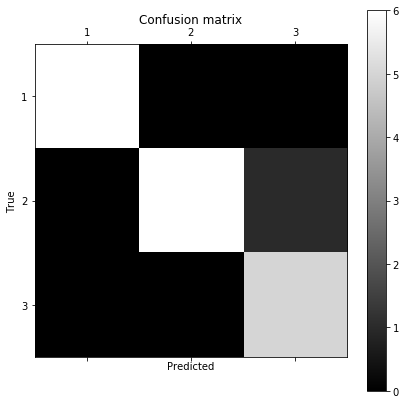

Plotting ROC Curve for validation data..


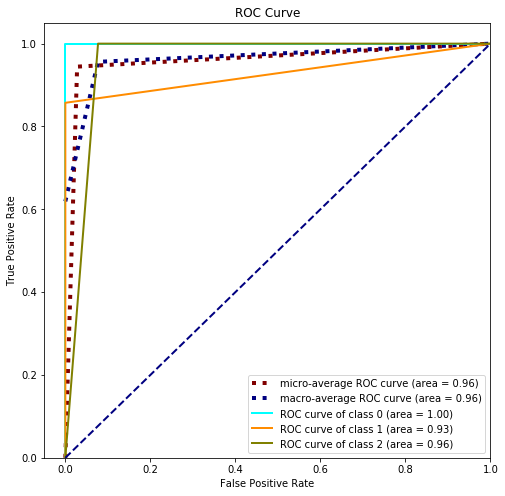

CV Split 7 ..


Split position:  root

Finding best split..
Index 0: Better split found with loss 0.215
Index 0: Better split found with loss 0.215
Index 0: Better split found with loss 0.214
Index 0: Better split found with loss 0.214
Index 0: Better split found with loss 0.213
Index 0: Better split found with loss 0.212
Index 0: Better split found with loss 0.212
Index 0: Better split found with loss 0.211
Index 0: Better split found with loss 0.211
Index 0: Better split found with loss 0.21
Index 0: Better split found with loss 0.209
Index 0: Better split found with loss 0.209
Index 0: Better split found with loss 0.207
Index 0: Better split found with loss 0.206
Index 0: Better split found with loss 0.205
Index 0: Better split found with loss 0.203
Index 0: Better split found with loss 0.203
Index 0: Better split found with loss 0.202
Index 0: Better split found with loss 0.199
Index 0: Better split found with loss 0.198
Index 0: Better split found with loss 0.197
Index 0: Better s

Index 4: Better split found with loss 0.014
Index 4: Better split found with loss 0.013
Index 5: Better split found with loss 0.013
Index 9: Better split found with loss 0.013
Index 9: Better split found with loss 0.009
Index 10: Better split found with loss 0.009
Index 11: Better split found with loss 0.009
Best Split Attribute Index:  11
Best Split Value:  1.445

Split position:  right

Finding best split..
Index 0: Better split found with loss 0.009
Index 0: Better split found with loss 0.009
Index 0: Better split found with loss 0.009
Index 0: Better split found with loss 0.009
Index 0: Better split found with loss 0.009
Index 0: Better split found with loss 0.009
Index 0: Better split found with loss 0.009
Index 0: Better split found with loss 0.009
Index 0: Better split found with loss 0.009
Index 0: Better split found with loss 0.009
Index 0: Better split found with loss 0.009
Index 0: Better split found with loss 0.009
Index 0: Better split found with loss 0.009
Index 0: Better

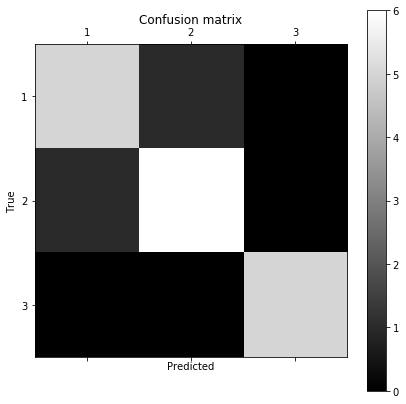

Plotting ROC Curve for validation data..


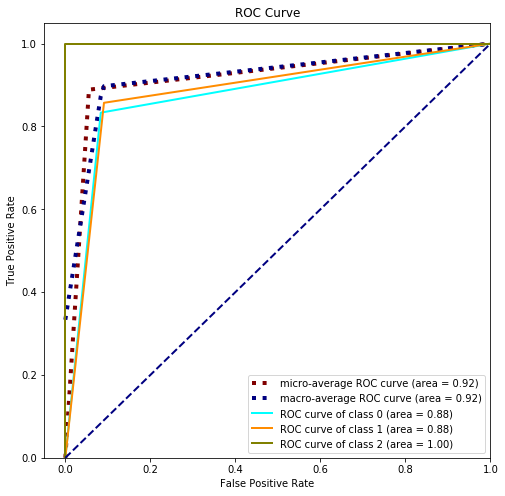

CV Split 8 ..


Split position:  root

Finding best split..
Index 0: Better split found with loss 0.215
Index 0: Better split found with loss 0.215
Index 0: Better split found with loss 0.214
Index 0: Better split found with loss 0.214
Index 0: Better split found with loss 0.213
Index 0: Better split found with loss 0.212
Index 0: Better split found with loss 0.212
Index 0: Better split found with loss 0.211
Index 0: Better split found with loss 0.211
Index 0: Better split found with loss 0.21
Index 0: Better split found with loss 0.209
Index 0: Better split found with loss 0.209
Index 0: Better split found with loss 0.207
Index 0: Better split found with loss 0.207
Index 0: Better split found with loss 0.206
Index 0: Better split found with loss 0.205
Index 0: Better split found with loss 0.203
Index 0: Better split found with loss 0.203
Index 0: Better split found with loss 0.202
Index 0: Better split found with loss 0.198
Index 0: Better split found with loss 0.197
Index 0: Better s

Index 12: Better split found with loss 0.058
Index 12: Better split found with loss 0.054
Best Split Attribute Index:  12
Best Split Value:  726.5

Split position:  left

Finding best split..
Index 0: Better split found with loss 0.018
Index 0: Better split found with loss 0.018
Index 0: Better split found with loss 0.018
Index 0: Better split found with loss 0.018
Index 0: Better split found with loss 0.018
Index 0: Better split found with loss 0.018
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better 

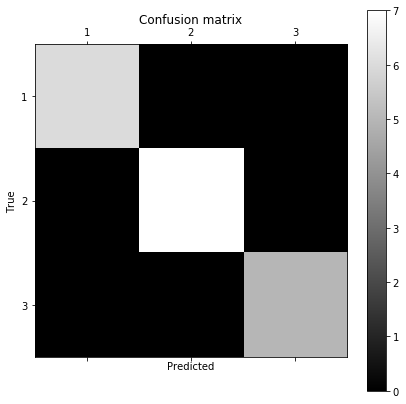

Plotting ROC Curve for validation data..


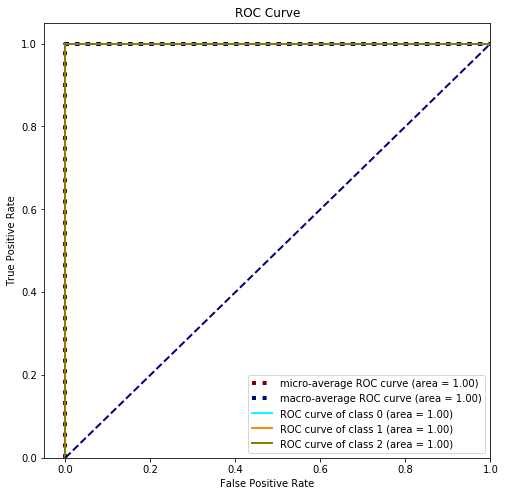

CV Split 9 ..


Split position:  root

Finding best split..
Index 0: Better split found with loss 0.215
Index 0: Better split found with loss 0.215
Index 0: Better split found with loss 0.214
Index 0: Better split found with loss 0.214
Index 0: Better split found with loss 0.213
Index 0: Better split found with loss 0.212
Index 0: Better split found with loss 0.212
Index 0: Better split found with loss 0.211
Index 0: Better split found with loss 0.211
Index 0: Better split found with loss 0.21
Index 0: Better split found with loss 0.209
Index 0: Better split found with loss 0.208
Index 0: Better split found with loss 0.207
Index 0: Better split found with loss 0.206
Index 0: Better split found with loss 0.205
Index 0: Better split found with loss 0.203
Index 0: Better split found with loss 0.202
Index 0: Better split found with loss 0.202
Index 0: Better split found with loss 0.199
Index 0: Better split found with loss 0.198
Index 0: Better split found with loss 0.197
Index 0: Better s

Index 2: Better split found with loss 0.018
Index 9: Better split found with loss 0.018
Index 10: Better split found with loss 0.018
Index 11: Better split found with loss 0.018
Best Split Attribute Index:  11
Best Split Value:  1.445

Split position:  right

Finding best split..
Index 0: Better split found with loss 0.018
Index 0: Better split found with loss 0.018
Index 0: Better split found with loss 0.018
Index 0: Better split found with loss 0.018
Index 0: Better split found with loss 0.018
Index 0: Better split found with loss 0.018
Index 0: Better split found with loss 0.018
Index 0: Better split found with loss 0.018
Index 0: Better split found with loss 0.018
Index 0: Better split found with loss 0.018
Index 0: Better split found with loss 0.018
Index 0: Better split found with loss 0.018
Index 0: Better split found with loss 0.018
Index 0: Better split found with loss 0.018
Index 0: Better split found with loss 0.018
Index 0: Better split found with loss 0.018
Index 0: Better

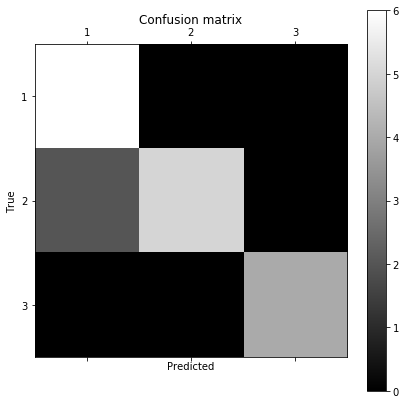

Plotting ROC Curve for validation data..


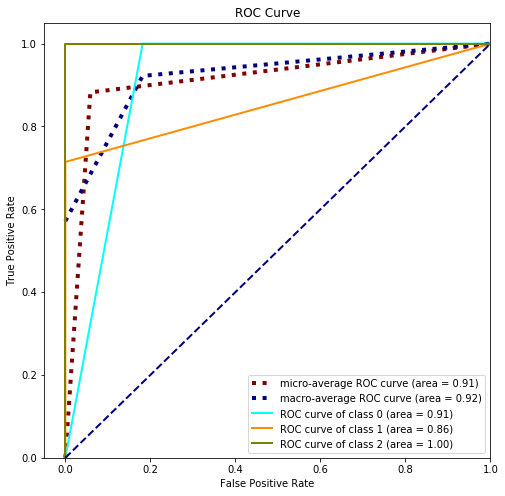

CV Split 10 ..


Split position:  root

Finding best split..
Index 0: Better split found with loss 0.216
Index 0: Better split found with loss 0.216
Index 0: Better split found with loss 0.215
Index 0: Better split found with loss 0.214
Index 0: Better split found with loss 0.214
Index 0: Better split found with loss 0.213
Index 0: Better split found with loss 0.213
Index 0: Better split found with loss 0.212
Index 0: Better split found with loss 0.212
Index 0: Better split found with loss 0.211
Index 0: Better split found with loss 0.21
Index 0: Better split found with loss 0.21
Index 0: Better split found with loss 0.208
Index 0: Better split found with loss 0.207
Index 0: Better split found with loss 0.206
Index 0: Better split found with loss 0.206
Index 0: Better split found with loss 0.203
Index 0: Better split found with loss 0.203
Index 0: Better split found with loss 0.199
Index 0: Better split found with loss 0.198
Index 0: Better split found with loss 0.197
Index 0: Better s

Index 4: Better split found with loss 0.022
Index 9: Better split found with loss 0.022
Index 9: Better split found with loss 0.018
Index 10: Better split found with loss 0.018
Index 11: Better split found with loss 0.018
Best Split Attribute Index:  11
Best Split Value:  1.445

Split position:  right

Finding best split..
Index 0: Better split found with loss 0.018
Index 0: Better split found with loss 0.018
Index 0: Better split found with loss 0.018
Index 0: Better split found with loss 0.018
Index 0: Better split found with loss 0.018
Index 0: Better split found with loss 0.018
Index 0: Better split found with loss 0.018
Index 0: Better split found with loss 0.018
Index 0: Better split found with loss 0.018
Index 0: Better split found with loss 0.018
Index 0: Better split found with loss 0.018
Index 0: Better split found with loss 0.018
Index 0: Better split found with loss 0.018
Index 0: Better split found with loss 0.018
Index 0: Better split found with loss 0.018
Index 0: Better

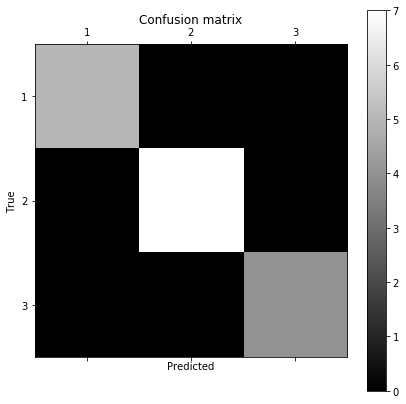

Plotting ROC Curve for validation data..


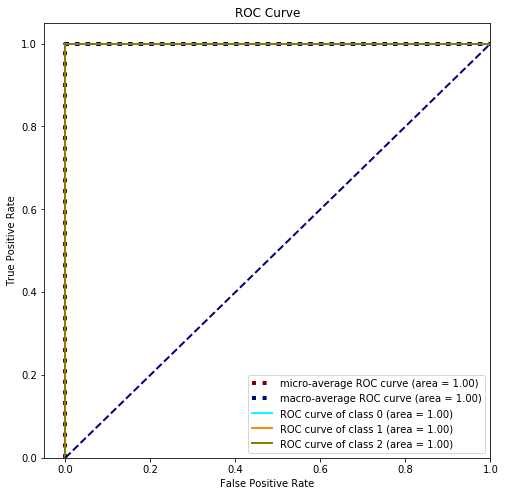


Mean classification scores...

Training accuracy: 0.992
Validation accuracy: 0.922
Training precision: 0.993
Training recall: 0.992
Training f1-score: 0.993
Validation precision: 0.937
Validation recall: 0.923
Validation f1-score: 0.922
AUC Mean Micro Average: 0.942
AUC Mean Macro Average: 0.941


In [70]:
cv_train_eval_tree(wine_data)

#### Wrap all functionalities into a single class

In [148]:
from dt_classifier_v1 import DTClassifier

In [149]:
dt_classifier = DTClassifier(criterion='gini')

In [150]:
print(dt_classifier.check_purity(wine_labels_train[6:12]))

False


In [151]:
tree = dt_classifier.make_decision_tree(wine_train, wine_labels_train)


Split position:  root

Finding best split..
Index 0: Better split found with loss 0.218
Index 0: Better split found with loss 0.217
Index 0: Better split found with loss 0.217
Index 0: Better split found with loss 0.216
Index 0: Better split found with loss 0.215
Index 0: Better split found with loss 0.214
Index 0: Better split found with loss 0.214
Index 0: Better split found with loss 0.213
Index 0: Better split found with loss 0.212
Index 0: Better split found with loss 0.21
Index 0: Better split found with loss 0.21
Index 0: Better split found with loss 0.208
Index 0: Better split found with loss 0.207
Index 0: Better split found with loss 0.203
Index 0: Better split found with loss 0.202
Index 0: Better split found with loss 0.201
Index 0: Better split found with loss 0.201
Index 0: Better split found with loss 0.201
Index 0: Better split found with loss 0.198
Index 0: Better split found with loss 0.195
Index 0: Better split found with loss 0.191
Index 0: Better split found with 

Index 2: Better split found with loss 0.009
Index 2: Better split found with loss 0.007
Best Split Attribute Index:  2
Best Split Value:  2.825

Split position:  right

Finding best split..
Index 0: Better split found with loss 0.024
Index 0: Better split found with loss 0.01
Index 4: Better split found with loss 0.01
Index 4: Better split found with loss 0.0
Index 9: Better split found with loss 0.0
Best Split Attribute Index:  9
Best Split Value:  3.5250000000000004


In [152]:
dt_classifier.evaluate_tree(tree, wine_test, wine_labels_test)

Correct predictions: 48
Incorrect predictions: 5
Classification accuracy: 0.906


In [153]:
sample = wine_test.iloc[25]
print(sample)
print('Sample true label:', wine_labels_test.iloc[25])
dt_classifier.predict_sample(tree, sample)

Alcohol                          12.00
Malic_Acid                        1.51
Ash                               2.42
Alcalinity_Of_Ash                22.00
Magnesium                        86.00
Total_Phenols                     1.45
Flavanoids                        1.25
Nonflavanoid_Phenols              0.50
Proanthocyanins                   1.63
Color_Intensity                   3.60
Hue                               1.05
OD280_OD315_Of_Diluted_Wines      2.65
Proline                         450.00
Name: 91, dtype: float64
Sample true label: 2


2

CV Split 1 ..


Split position:  root

Finding best split..
Index 0: Better split found with loss 0.216
Index 0: Better split found with loss 0.215
Index 0: Better split found with loss 0.215
Index 0: Better split found with loss 0.214
Index 0: Better split found with loss 0.214
Index 0: Better split found with loss 0.213
Index 0: Better split found with loss 0.213
Index 0: Better split found with loss 0.212
Index 0: Better split found with loss 0.211
Index 0: Better split found with loss 0.211
Index 0: Better split found with loss 0.21
Index 0: Better split found with loss 0.209
Index 0: Better split found with loss 0.209
Index 0: Better split found with loss 0.207
Index 0: Better split found with loss 0.207
Index 0: Better split found with loss 0.206
Index 0: Better split found with loss 0.205
Index 0: Better split found with loss 0.205
Index 0: Better split found with loss 0.201
Index 0: Better split found with loss 0.2
Index 0: Better split found with loss 0.199
Index 0: Better spl

Index 0: Better split found with loss 0.03
Index 0: Better split found with loss 0.029
Index 0: Better split found with loss 0.029
Index 0: Better split found with loss 0.029
Index 0: Better split found with loss 0.028
Index 0: Better split found with loss 0.027
Index 0: Better split found with loss 0.025
Index 4: Better split found with loss 0.025
Index 4: Better split found with loss 0.024
Index 4: Better split found with loss 0.022
Index 9: Better split found with loss 0.021
Index 9: Better split found with loss 0.017
Index 10: Better split found with loss 0.017
Index 11: Better split found with loss 0.017
Best Split Attribute Index:  11
Best Split Value:  1.46

Split position:  right

Finding best split..
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better s

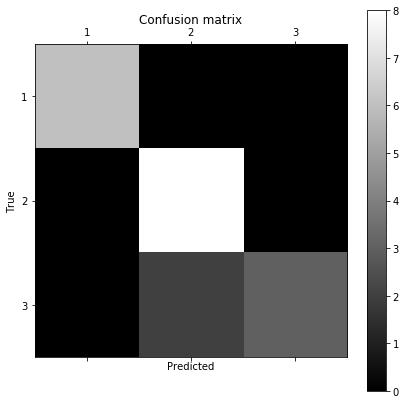

Plotting ROC Curve for validation data..


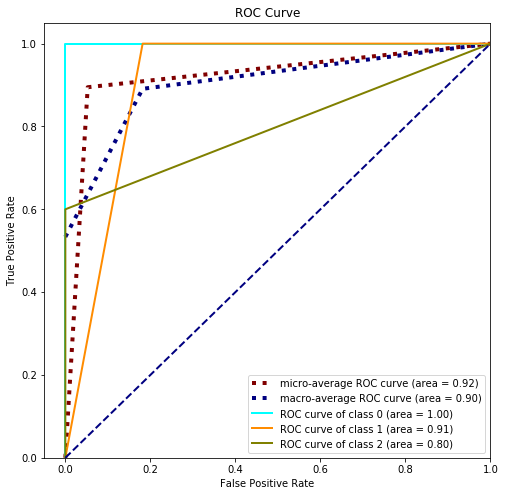

CV Split 2 ..


Split position:  root

Finding best split..
Index 0: Better split found with loss 0.215
Index 0: Better split found with loss 0.215
Index 0: Better split found with loss 0.214
Index 0: Better split found with loss 0.214
Index 0: Better split found with loss 0.213
Index 0: Better split found with loss 0.212
Index 0: Better split found with loss 0.212
Index 0: Better split found with loss 0.211
Index 0: Better split found with loss 0.211
Index 0: Better split found with loss 0.21
Index 0: Better split found with loss 0.209
Index 0: Better split found with loss 0.209
Index 0: Better split found with loss 0.208
Index 0: Better split found with loss 0.207
Index 0: Better split found with loss 0.206
Index 0: Better split found with loss 0.205
Index 0: Better split found with loss 0.204
Index 0: Better split found with loss 0.203
Index 0: Better split found with loss 0.203
Index 0: Better split found with loss 0.199
Index 0: Better split found with loss 0.198
Index 0: Better s

Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.016
Index 0: Better split found with loss 0.015
Index 0: Better split found with loss 0.014
Best Split Attribute Index:  0
Best Split Value:  13.175

Split position:  right

Finding best split..
Index 0: Better split found with loss 0.0
Index 1: Better split found with loss 0.0
Index 4: Better split found with loss 0.0
Index 9: Better split found with loss 0.0
Index 12: Better split found with loss 0.0
Best Split Attribute Index:  12
Best Split Value:  655.0

Split position:  right

Finding best split..
Index 0: Better split found with loss 0.038
Index 0: Better split found with loss 0.02
Index 0: Better split found with loss 0.009
Index 9: Better split found with loss 0.0
Best Split Attribute Index:  9
Best Split Value:  3.525000

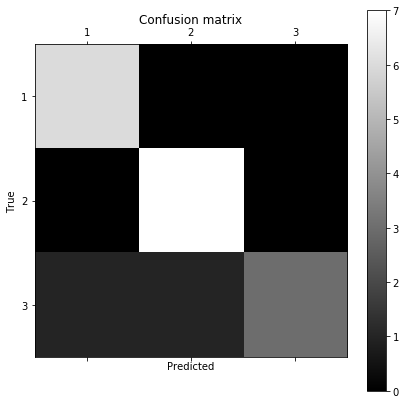

Plotting ROC Curve for validation data..


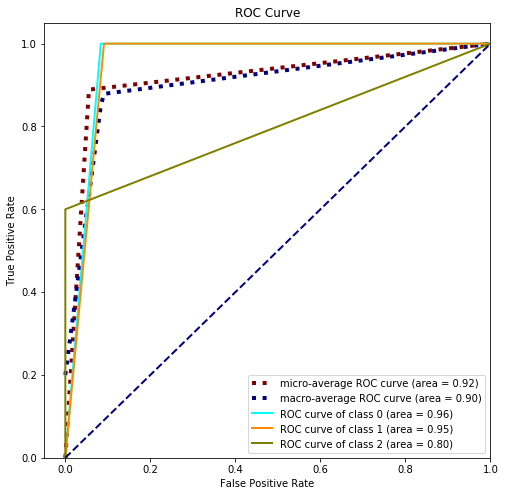

CV Split 3 ..


Split position:  root

Finding best split..
Index 0: Better split found with loss 0.215
Index 0: Better split found with loss 0.215
Index 0: Better split found with loss 0.214
Index 0: Better split found with loss 0.214
Index 0: Better split found with loss 0.213
Index 0: Better split found with loss 0.212
Index 0: Better split found with loss 0.212
Index 0: Better split found with loss 0.211
Index 0: Better split found with loss 0.211
Index 0: Better split found with loss 0.21
Index 0: Better split found with loss 0.209
Index 0: Better split found with loss 0.209
Index 0: Better split found with loss 0.207
Index 0: Better split found with loss 0.206
Index 0: Better split found with loss 0.205
Index 0: Better split found with loss 0.205
Index 0: Better split found with loss 0.203
Index 0: Better split found with loss 0.202
Index 0: Better split found with loss 0.201
Index 0: Better split found with loss 0.198
Index 0: Better split found with loss 0.197
Index 0: Better s

Index 12: Better split found with loss 0.058
Index 12: Better split found with loss 0.055
Index 12: Better split found with loss 0.05
Best Split Attribute Index:  12
Best Split Value:  755.0

Split position:  left

Finding best split..
Index 0: Better split found with loss 0.025
Index 0: Better split found with loss 0.025
Index 0: Better split found with loss 0.025
Index 0: Better split found with loss 0.025
Index 0: Better split found with loss 0.025
Index 0: Better split found with loss 0.025
Index 0: Better split found with loss 0.025
Index 0: Better split found with loss 0.025
Index 0: Better split found with loss 0.025
Index 0: Better split found with loss 0.025
Index 0: Better split found with loss 0.025
Index 0: Better split found with loss 0.025
Index 0: Better split found with loss 0.025
Index 0: Better split found with loss 0.025
Index 0: Better split found with loss 0.025
Index 0: Better split found with loss 0.024
Index 0: Better split found with loss 0.024
Index 0: Better 

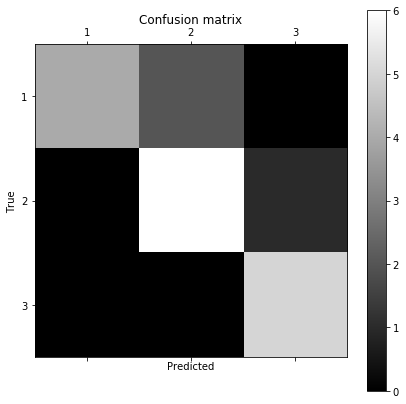

Plotting ROC Curve for validation data..


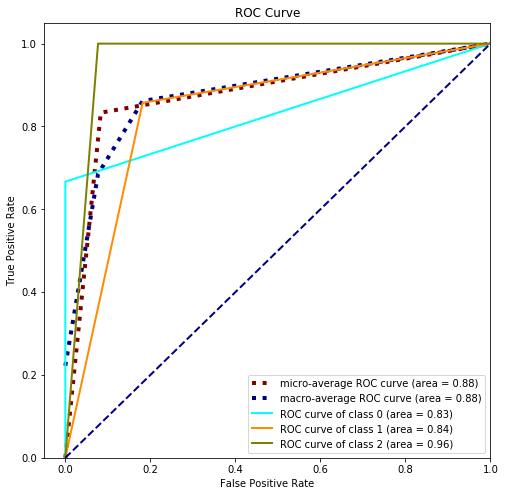

CV Split 4 ..


Split position:  root

Finding best split..
Index 0: Better split found with loss 0.215
Index 0: Better split found with loss 0.215
Index 0: Better split found with loss 0.214
Index 0: Better split found with loss 0.214
Index 0: Better split found with loss 0.213
Index 0: Better split found with loss 0.212
Index 0: Better split found with loss 0.212
Index 0: Better split found with loss 0.211
Index 0: Better split found with loss 0.211
Index 0: Better split found with loss 0.21
Index 0: Better split found with loss 0.209
Index 0: Better split found with loss 0.208
Index 0: Better split found with loss 0.207
Index 0: Better split found with loss 0.207
Index 0: Better split found with loss 0.205
Index 0: Better split found with loss 0.204
Index 0: Better split found with loss 0.203
Index 0: Better split found with loss 0.2
Index 0: Better split found with loss 0.199
Index 0: Better split found with loss 0.198
Index 0: Better split found with loss 0.197
Index 0: Better spl

Index 4: Better split found with loss 0.021
Index 9: Better split found with loss 0.021
Index 9: Better split found with loss 0.017
Index 10: Better split found with loss 0.017
Index 11: Better split found with loss 0.017
Best Split Attribute Index:  11
Best Split Value:  1.445

Split position:  right

Finding best split..
Index 0: Better split found with loss 0.018
Index 0: Better split found with loss 0.018
Index 0: Better split found with loss 0.018
Index 0: Better split found with loss 0.018
Index 0: Better split found with loss 0.018
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better

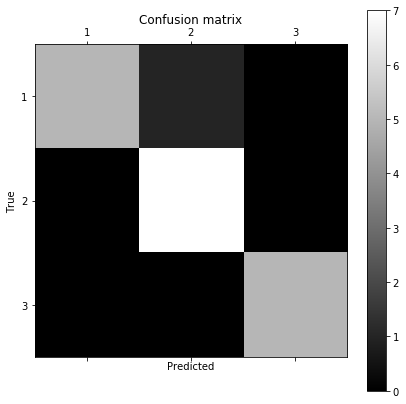

Plotting ROC Curve for validation data..


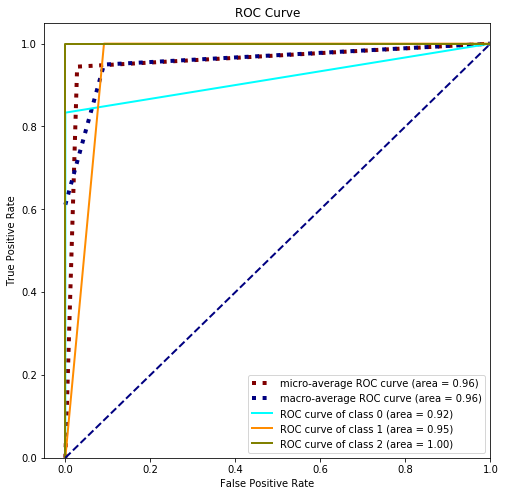

CV Split 5 ..


Split position:  root

Finding best split..
Index 0: Better split found with loss 0.215
Index 0: Better split found with loss 0.215
Index 0: Better split found with loss 0.214
Index 0: Better split found with loss 0.214
Index 0: Better split found with loss 0.213
Index 0: Better split found with loss 0.212
Index 0: Better split found with loss 0.212
Index 0: Better split found with loss 0.211
Index 0: Better split found with loss 0.211
Index 0: Better split found with loss 0.21
Index 0: Better split found with loss 0.209
Index 0: Better split found with loss 0.209
Index 0: Better split found with loss 0.208
Index 0: Better split found with loss 0.207
Index 0: Better split found with loss 0.205
Index 0: Better split found with loss 0.205
Index 0: Better split found with loss 0.204
Index 0: Better split found with loss 0.202
Index 0: Better split found with loss 0.201
Index 0: Better split found with loss 0.2
Index 0: Better split found with loss 0.197
Index 0: Better spl

Index 12: Better split found with loss 0.056
Index 12: Better split found with loss 0.053
Index 12: Better split found with loss 0.049
Best Split Attribute Index:  12
Best Split Value:  726.5

Split position:  left

Finding best split..
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better

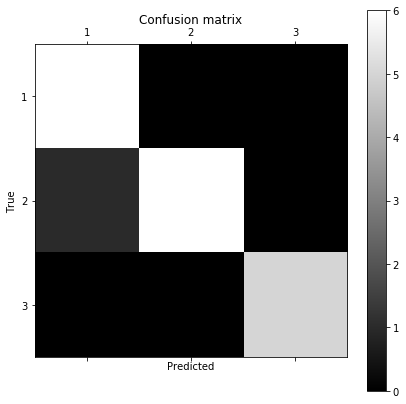

Plotting ROC Curve for validation data..


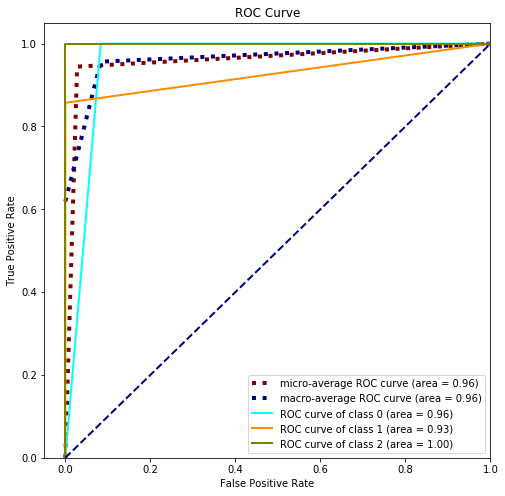

CV Split 6 ..


Split position:  root

Finding best split..
Index 0: Better split found with loss 0.215
Index 0: Better split found with loss 0.215
Index 0: Better split found with loss 0.214
Index 0: Better split found with loss 0.214
Index 0: Better split found with loss 0.213
Index 0: Better split found with loss 0.212
Index 0: Better split found with loss 0.212
Index 0: Better split found with loss 0.211
Index 0: Better split found with loss 0.211
Index 0: Better split found with loss 0.21
Index 0: Better split found with loss 0.209
Index 0: Better split found with loss 0.208
Index 0: Better split found with loss 0.207
Index 0: Better split found with loss 0.206
Index 0: Better split found with loss 0.204
Index 0: Better split found with loss 0.203
Index 0: Better split found with loss 0.203
Index 0: Better split found with loss 0.2
Index 0: Better split found with loss 0.199
Index 0: Better split found with loss 0.198
Index 0: Better split found with loss 0.197
Index 0: Better spl

Index 6: Better split found with loss 0.025
Index 6: Better split found with loss 0.016
Best Split Attribute Index:  6
Best Split Value:  0.7949999999999999

Split position:  right

Finding best split..
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index

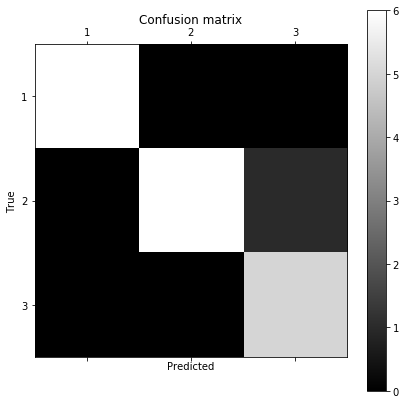

Plotting ROC Curve for validation data..


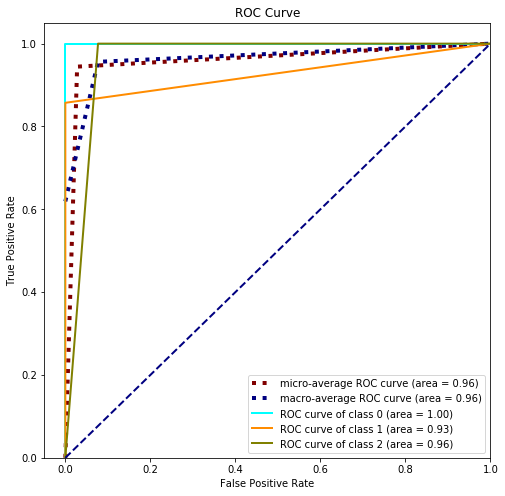

CV Split 7 ..


Split position:  root

Finding best split..
Index 0: Better split found with loss 0.215
Index 0: Better split found with loss 0.215
Index 0: Better split found with loss 0.214
Index 0: Better split found with loss 0.214
Index 0: Better split found with loss 0.213
Index 0: Better split found with loss 0.212
Index 0: Better split found with loss 0.212
Index 0: Better split found with loss 0.211
Index 0: Better split found with loss 0.211
Index 0: Better split found with loss 0.21
Index 0: Better split found with loss 0.209
Index 0: Better split found with loss 0.209
Index 0: Better split found with loss 0.207
Index 0: Better split found with loss 0.206
Index 0: Better split found with loss 0.205
Index 0: Better split found with loss 0.203
Index 0: Better split found with loss 0.203
Index 0: Better split found with loss 0.202
Index 0: Better split found with loss 0.199
Index 0: Better split found with loss 0.198
Index 0: Better split found with loss 0.197
Index 0: Better s

Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.016
Index 0: Better split found with loss 0.016
Index 0: Better split found with loss 0.016
Index 0: Better split found with loss 0.015
Index 0: Better split found with loss 0.014
Index 4: Better split found with loss 0.014
Index 4: Better split found with loss 0.013
Index 5: Better split found with loss 0.013
Index 9: Better split found with loss 0.013
Index 9: Better split found with loss 0.009
Index 10: Better split found with loss 0.009
Index 11: Better split found with loss 0.009
Best Split Attribute Index:  11
Best Split Value:  1.445

Split position:  right

Finding best split..
Index 0: Better split found with loss 0.009
Index 0: Better split found with loss 0.009
Index 0: Better

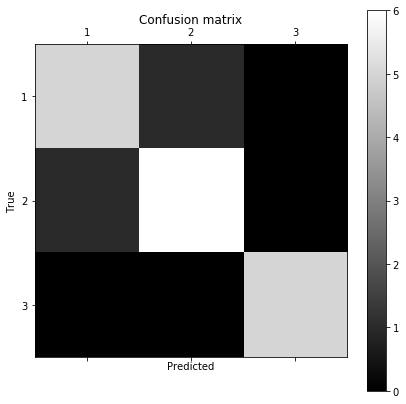

Plotting ROC Curve for validation data..


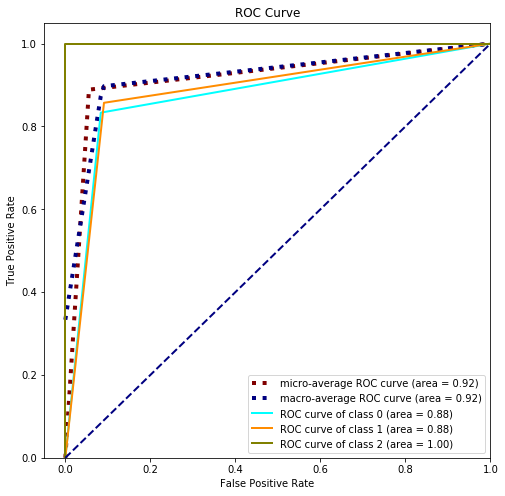

CV Split 8 ..


Split position:  root

Finding best split..
Index 0: Better split found with loss 0.215
Index 0: Better split found with loss 0.215
Index 0: Better split found with loss 0.214
Index 0: Better split found with loss 0.214
Index 0: Better split found with loss 0.213
Index 0: Better split found with loss 0.212
Index 0: Better split found with loss 0.212
Index 0: Better split found with loss 0.211
Index 0: Better split found with loss 0.211
Index 0: Better split found with loss 0.21
Index 0: Better split found with loss 0.209
Index 0: Better split found with loss 0.209
Index 0: Better split found with loss 0.207
Index 0: Better split found with loss 0.207
Index 0: Better split found with loss 0.206
Index 0: Better split found with loss 0.205
Index 0: Better split found with loss 0.203
Index 0: Better split found with loss 0.203
Index 0: Better split found with loss 0.202
Index 0: Better split found with loss 0.198
Index 0: Better split found with loss 0.197
Index 0: Better s

Index 12: Better split found with loss 0.058
Index 12: Better split found with loss 0.054
Best Split Attribute Index:  12
Best Split Value:  726.5

Split position:  left

Finding best split..
Index 0: Better split found with loss 0.018
Index 0: Better split found with loss 0.018
Index 0: Better split found with loss 0.018
Index 0: Better split found with loss 0.018
Index 0: Better split found with loss 0.018
Index 0: Better split found with loss 0.018
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better split found with loss 0.017
Index 0: Better 

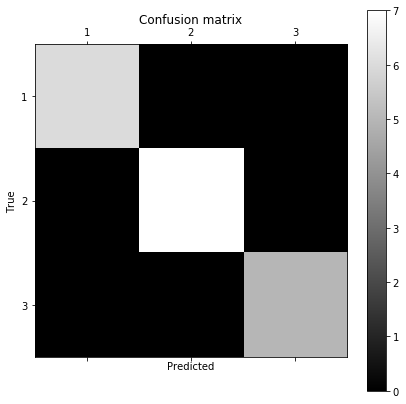

Plotting ROC Curve for validation data..


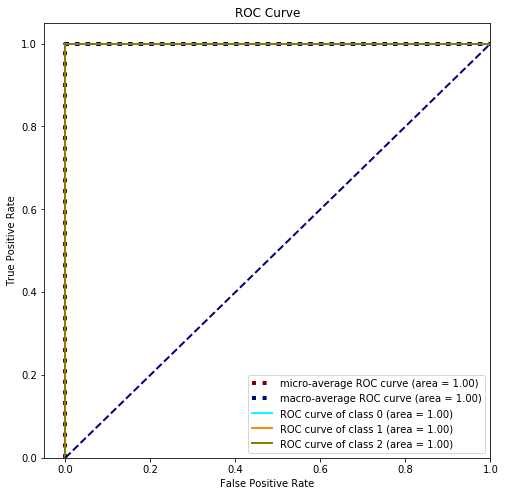

CV Split 9 ..


Split position:  root

Finding best split..
Index 0: Better split found with loss 0.215
Index 0: Better split found with loss 0.215
Index 0: Better split found with loss 0.214
Index 0: Better split found with loss 0.214
Index 0: Better split found with loss 0.213
Index 0: Better split found with loss 0.212
Index 0: Better split found with loss 0.212
Index 0: Better split found with loss 0.211
Index 0: Better split found with loss 0.211
Index 0: Better split found with loss 0.21
Index 0: Better split found with loss 0.209
Index 0: Better split found with loss 0.208
Index 0: Better split found with loss 0.207
Index 0: Better split found with loss 0.206
Index 0: Better split found with loss 0.205
Index 0: Better split found with loss 0.203
Index 0: Better split found with loss 0.202
Index 0: Better split found with loss 0.202
Index 0: Better split found with loss 0.199
Index 0: Better split found with loss 0.198
Index 0: Better split found with loss 0.197
Index 0: Better s

Index 2: Better split found with loss 0.018
Index 9: Better split found with loss 0.018
Index 10: Better split found with loss 0.018
Index 11: Better split found with loss 0.018
Best Split Attribute Index:  11
Best Split Value:  1.445

Split position:  right

Finding best split..
Index 0: Better split found with loss 0.018
Index 0: Better split found with loss 0.018
Index 0: Better split found with loss 0.018
Index 0: Better split found with loss 0.018
Index 0: Better split found with loss 0.018
Index 0: Better split found with loss 0.018
Index 0: Better split found with loss 0.018
Index 0: Better split found with loss 0.018
Index 0: Better split found with loss 0.018
Index 0: Better split found with loss 0.018
Index 0: Better split found with loss 0.018
Index 0: Better split found with loss 0.018
Index 0: Better split found with loss 0.018
Index 0: Better split found with loss 0.018
Index 0: Better split found with loss 0.018
Index 0: Better split found with loss 0.018
Index 0: Better

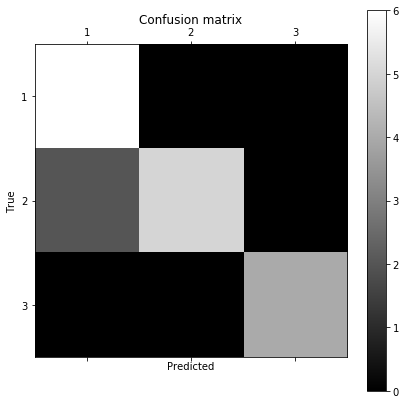

Plotting ROC Curve for validation data..


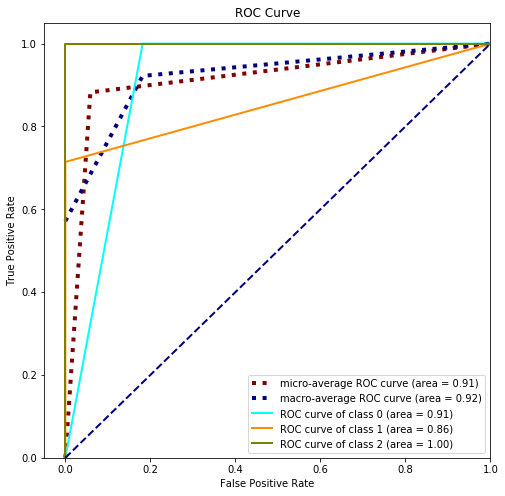

CV Split 10 ..


Split position:  root

Finding best split..
Index 0: Better split found with loss 0.216
Index 0: Better split found with loss 0.216
Index 0: Better split found with loss 0.215
Index 0: Better split found with loss 0.214
Index 0: Better split found with loss 0.214
Index 0: Better split found with loss 0.213
Index 0: Better split found with loss 0.213
Index 0: Better split found with loss 0.212
Index 0: Better split found with loss 0.212
Index 0: Better split found with loss 0.211
Index 0: Better split found with loss 0.21
Index 0: Better split found with loss 0.21
Index 0: Better split found with loss 0.208
Index 0: Better split found with loss 0.207
Index 0: Better split found with loss 0.206
Index 0: Better split found with loss 0.206
Index 0: Better split found with loss 0.203
Index 0: Better split found with loss 0.203
Index 0: Better split found with loss 0.199
Index 0: Better split found with loss 0.198
Index 0: Better split found with loss 0.197
Index 0: Better s

Index 0: Better split found with loss 0.024
Index 0: Better split found with loss 0.023
Index 0: Better split found with loss 0.022
Index 4: Better split found with loss 0.022
Index 9: Better split found with loss 0.022
Index 9: Better split found with loss 0.018
Index 10: Better split found with loss 0.018
Index 11: Better split found with loss 0.018
Best Split Attribute Index:  11
Best Split Value:  1.445

Split position:  right

Finding best split..
Index 0: Better split found with loss 0.018
Index 0: Better split found with loss 0.018
Index 0: Better split found with loss 0.018
Index 0: Better split found with loss 0.018
Index 0: Better split found with loss 0.018
Index 0: Better split found with loss 0.018
Index 0: Better split found with loss 0.018
Index 0: Better split found with loss 0.018
Index 0: Better split found with loss 0.018
Index 0: Better split found with loss 0.018
Index 0: Better split found with loss 0.018
Index 0: Better split found with loss 0.018
Index 0: Better

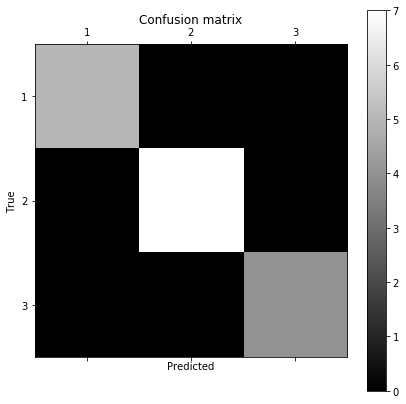

Plotting ROC Curve for validation data..


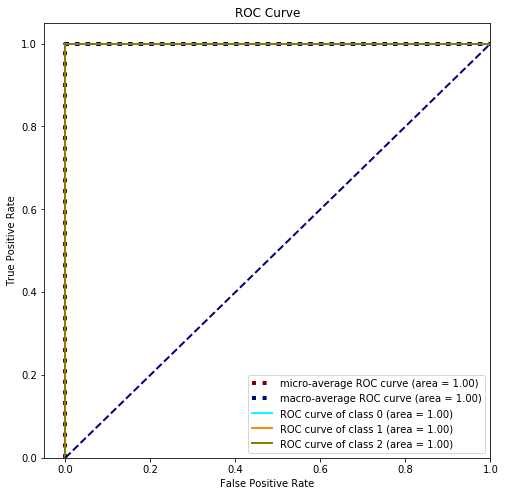


Mean classification scores...

Training accuracy: 0.992
Validation accuracy: 0.922
Training precision: 0.993
Training recall: 0.992
Training f1-score: 0.993
Validation precision: 0.937
Validation recall: 0.923
Validation f1-score: 0.922
AUC Mean Micro Average: 0.942
AUC Mean Macro Average: 0.941


In [154]:
dt_classifier.cv_train_eval_tree(wine_data)

### Comparison with Neural Networks and Random Forest

In [44]:
def train_optimize_model(features_train, labels_train, model, model_name=None, cv_k=10, 
                         param_list=None, optimizer=None, display_scores=0):
    '''
    Trains a model using K-fold Cross Validation and does a parameter search (Grid or Randomized)
    to find the best estimator over a pre-defined hyperparameter grid.
    
        Args:
            features_train(pd.DataFrame): the training set of attributes
            labels_train(pd.Series): the target training annotations
            model(Model): the Scikit-learn model for optimization
            model_name(str): model name for output weights file
            cv_k(int): the number of splits for Cross Validation
            param_list(dict): a dictionary of hyperparameters for the search
            optimizer(str): ['Grid', 'Random'] - the type of search method
            display_scores(bool): display or hide the parameter search results 
        Returns:
            opt_model(Model): the best found estimator in the search
        
    '''
    if optimizer is None:
        print('Training baseline model..')
        model.fit(features_train, labels_train)
        print('Training complete.')
        return model
    elif os.path.isfile(model_name):
        print('Loading saved model...')
        model = joblib.load(model_name)
        print('Loaded..')
        return model
    else: 
        if param_list is None:
                print('No parameters specified for model.')
        else:
            kfold = StratifiedKFold(n_splits=cv_k, shuffle=True, random_state=42)
            if optimizer == 'Grid':
                opt_model = GridSearchCV(estimator=model, param_grid=param_list, cv=kfold.split(features_train, labels_train),
                                           scoring=make_scorer(f1_score, average='micro'))
                print('Optimizing model with GridSearch...')
            if optimizer == 'Random':
                opt_model = RandomizedSearchCV(estimator=model, param_distributions=param_list, 
                                                 cv=kfold.split(features_train, labels_train),
                                                 scoring=make_scorer(f1_score, average='micro'))
                print('Optimizing model with RandomSearch...')
            opt_model.fit(features_train, labels_train)
            print('Best parameters found: {}'.format(opt_model.best_params_))
            print('Best score found: {}'.format(opt_model.best_score_))
            if display_scores:
                print('Displaying scores..')
                means = opt_model.cv_results_['mean_test_score']
                stds = opt_model.cv_results_['std_test_score']
                for mean, std, params in zip(means, stds, opt_model.cv_results_['params']):
                    print("{:.3f} ({:.03f}) for {}".format(mean, std * 2, params))
            print('Saving model to disk..')
            filename = model_name
            joblib.dump(opt_model.best_estimator_, filename)
            return opt_model

In [45]:
def evaluate_model(features_train, labels_train, features_test, labels_test, model, 
                   class_names=['1', '2', '3'], roc=True, y_col='Y_WC', k=10, grid_search=False):
    
    '''
    Evaluates a model using K-fold Cross Validation by splitting the training set.
    Then evaluates the model on a separate test set and compares the results.
    
        Args:
            features_train(pd.DataFrame): the training set of attributes
            labels_train(pd.Series): the target training annotations
            features_test(pd.DataFrame): the test set of attributes
            labels_test(pd.Series): the target test annotations
            model(Model): the trained Scikit-learn model
            class_names(list): the list of annotation names for plotting
            roc(bool): plot ROC Curve?
            y_col(str): the name of the prediction column
            k(int): the number of splits for Cross Validation
            grid_search(bool): whether the input model is a GridSearch estimator or Model estimator
        Returns:
        
    '''
    
    counter = 0
    kfold = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
    print('Evaluating model on validation set..')
    roc_auc = []; fpr = []; tpr = []; val_acc = []; val_precision_recall_f1_score = [];
    train_acc = []; train_precision_recall_f1_score = [];
    
    if grid_search == False:
        for ind_train, ind_val in kfold.split(features_train, labels_train):
            counter += 1
            f_train = features_train.iloc[ind_train]
            f_val = features_train.iloc[ind_val]
            l_train = labels_train.iloc[ind_train]
            l_val = labels_train.iloc[ind_val]

            print('CV Split {} ..'.format(counter))
            print()
            model.fit(f_train, l_train)
            print('Evaluating model..')
            print()
            labels_pred_val = model.predict(f_val)
            labels_pred_train = model.predict(f_train)

            print('Accuracy score for training data.')
            train_acc_split = accuracy_score(l_train, labels_pred_train)
            train_acc.append(train_acc_split)
            print('Accuracy score for validation data.')
            val_acc_split = accuracy_score(l_val, labels_pred_val)
            val_acc.append(val_acc_split)

            print('Classification report for training data.')
            print(classification_report(l_train, labels_pred_train, target_names=class_names))
            t_precision, t_recall, t_f1score, _ = precision_recall_fscore_support(l_train, labels_pred_train)
            train_precision_recall_f1_score.append((t_precision, t_recall, t_f1score))
            print('Classification report for validation data.')
            print(classification_report(l_val, labels_pred_val, target_names=class_names))
            v_precision, v_recall, v_f1score, _ = precision_recall_fscore_support(l_val, labels_pred_val)
            val_precision_recall_f1_score.append((v_precision, v_recall, v_f1score))
            print('Confusion matrix..')
            plot_cm(l_val, labels_pred_val, class_names)
            roc_auc_micro, roc_auc_macro = plot_roc(l_val, labels_pred_val)
            roc_auc.append((roc_auc_micro, roc_auc_macro))
        
    print()
    print('Mean classification scores for validation data...')
    print()

    print('Training accuracy:', round(np.mean(train_acc), 3))
    print('Training precision:', round(np.mean([i[0] for i in train_precision_recall_f1_score]), 3))
    print('Training recall:', round(np.mean([i[1] for i in train_precision_recall_f1_score]), 3))
    print('Training f1-score:', round(np.mean([i[2] for i in train_precision_recall_f1_score]), 3))
    print()
    print('Validation accuracy:', round(np.mean(val_acc), 3))
    print('Validation precision:', round(np.mean([i[0] for i in val_precision_recall_f1_score]), 3))
    print('Validation recall:', round(np.mean([i[1] for i in val_precision_recall_f1_score]), 3))
    print('Validation f1-score:', round(np.mean([i[2] for i in val_precision_recall_f1_score]), 3))
    print('AUC Mean Micro Average:', round(np.mean([i[0] for i in roc_auc]), 3))
    print('AUC Mean Macro Average:', round(np.mean([i[1] for i in roc_auc]), 3))
        
    print()
    print('Evaluating model on test set..')
    labels_pred_test = model.predict(features_test)
    print('Classification report for test data.')
    print(classification_report(labels_test, labels_pred_test, target_names=class_names))
    print('Confusion matrix for test data.')
    plot_cm(labels_test, labels_pred_test, class_names)
    plot_roc(labels_test, labels_pred_test)
    print('Evaluation complete.')

#### Hyperparameter grids

In [46]:
rf_param_list = {
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 5, None],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [2, 10, 50, 200]
}
shallow_nn_param_list = {
    'hidden_layer_sizes': [(10,), (25,), (50,), (100,), (200,)],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'learning_rate_init': [0.0001, 0.001, 0.01, 0.1],
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [10, 50, 100, 200, 500],
    'alpha': [0.1, 0.01, 0.001, 0.0001]
}
deep_nn_param_list = {
    'hidden_layer_sizes': [(10,5), (25,5), (50,5), (100,5), (200,5)],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'learning_rate_init': [0.0001, 0.001, 0.01, 0.1],
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [10, 50, 100, 200, 500],
    'alpha': [0.1, 0.01, 0.001, 0.0001]
}

#### Baseline Random Forest

In [142]:
random_forest = RandomForestClassifier()
random_forest_base = train_optimize_model(wine_train,
                     wine_labels_train,
                     random_forest,
                     optimizer=None,
                     param_list=None)

Training baseline model..
Training complete.


c:\users\user\.conda\envs\tf-std\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Evaluating model on validation set..
CV Split 1 ..

Evaluating model..

Accuracy score for training data.
Accuracy score for validation data.
Classification report for training data.
              precision    recall  f1-score   support

           1       0.97      1.00      0.99        39
           2       1.00      0.98      0.99        45
           3       1.00      1.00      1.00        27

    accuracy                           0.99       111
   macro avg       0.99      0.99      0.99       111
weighted avg       0.99      0.99      0.99       111

Classification report for validation data.
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         4

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14

Confusion ma

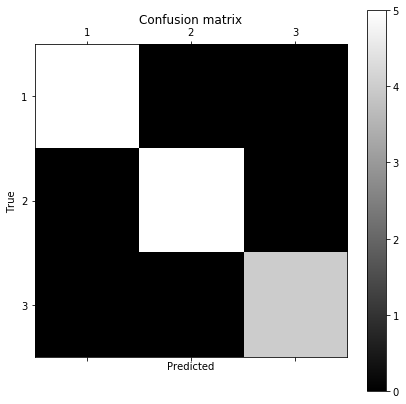

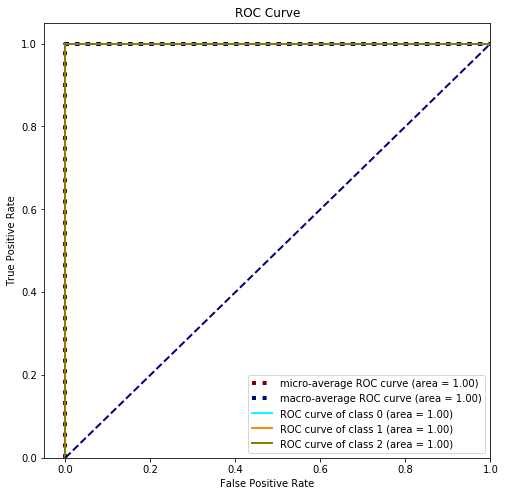

CV Split 2 ..

Evaluating model..

Accuracy score for training data.
Accuracy score for validation data.
Classification report for training data.
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        39
           2       1.00      1.00      1.00        45
           3       1.00      1.00      1.00        28

    accuracy                           1.00       112
   macro avg       1.00      1.00      1.00       112
weighted avg       1.00      1.00      1.00       112

Classification report for validation data.
              precision    recall  f1-score   support

           1       0.83      1.00      0.91         5
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00         3

    accuracy                           0.92        13
   macro avg       0.94      0.93      0.93        13
weighted avg       0.94      0.92      0.92        13

Confusion matrix..
[[5 0 0]
 [1 4 0]
 [0 0 3]]


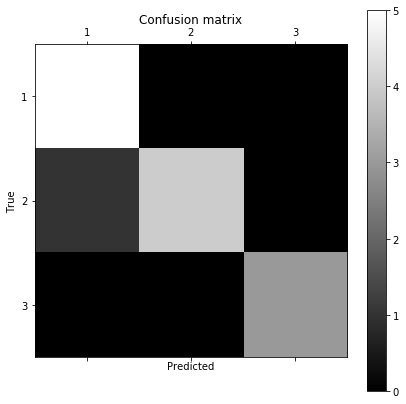

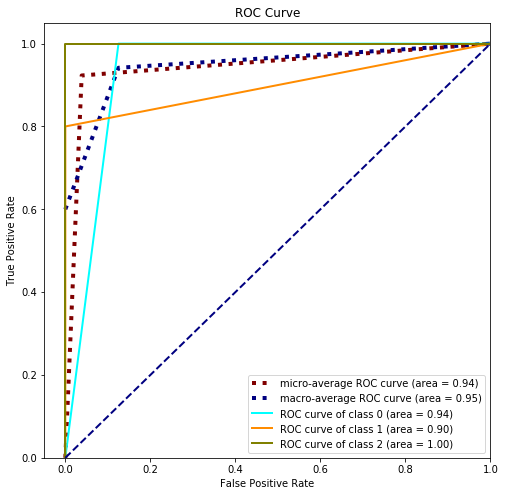

CV Split 3 ..

Evaluating model..

Accuracy score for training data.
Accuracy score for validation data.
Classification report for training data.
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        39
           2       1.00      1.00      1.00        45
           3       1.00      1.00      1.00        28

    accuracy                           1.00       112
   macro avg       1.00      1.00      1.00       112
weighted avg       1.00      1.00      1.00       112

Classification report for validation data.
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         3

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13

Confusion matrix..
[[5 0 0]
 [0 5 0]
 [0 0 3]]


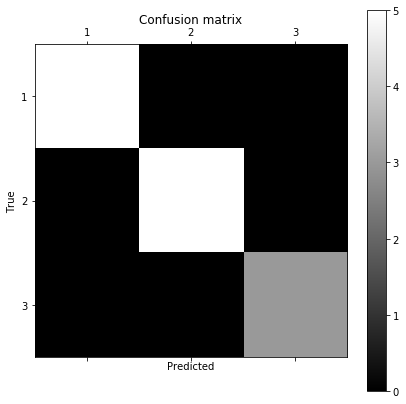

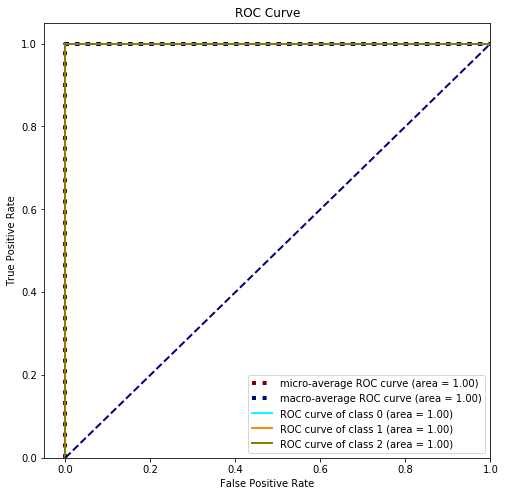

CV Split 4 ..

Evaluating model..

Accuracy score for training data.
Accuracy score for validation data.
Classification report for training data.
              precision    recall  f1-score   support

           1       0.97      1.00      0.99        39
           2       1.00      0.98      0.99        45
           3       1.00      1.00      1.00        28

    accuracy                           0.99       112
   macro avg       0.99      0.99      0.99       112
weighted avg       0.99      0.99      0.99       112

Classification report for validation data.
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         3

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13

Confusion matrix..
[[5 0 0]
 [0 5 0]
 [0 0 3]]


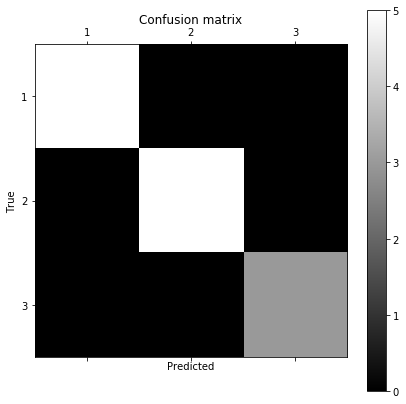

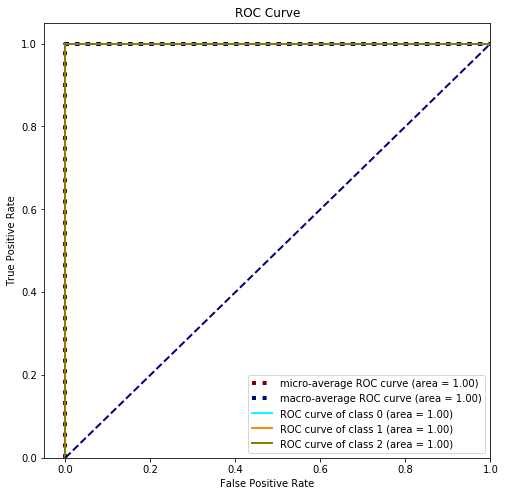

CV Split 5 ..

Evaluating model..

Accuracy score for training data.
Accuracy score for validation data.
Classification report for training data.
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        40
           2       1.00      1.00      1.00        45
           3       1.00      1.00      1.00        28

    accuracy                           1.00       113
   macro avg       1.00      1.00      1.00       113
weighted avg       1.00      1.00      1.00       113

Classification report for validation data.
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       1.00      0.80      0.89         5
           3       0.75      1.00      0.86         3

    accuracy                           0.92        12
   macro avg       0.92      0.93      0.92        12
weighted avg       0.94      0.92      0.92        12

Confusion matrix..
[[4 0 0]
 [0 4 1]
 [0 0 3]]


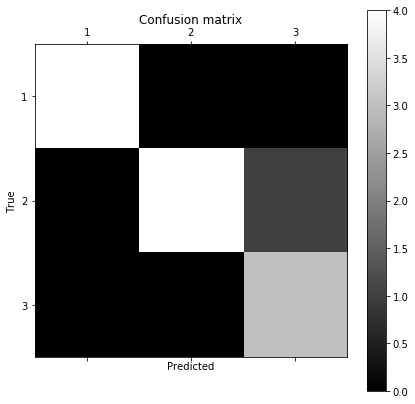

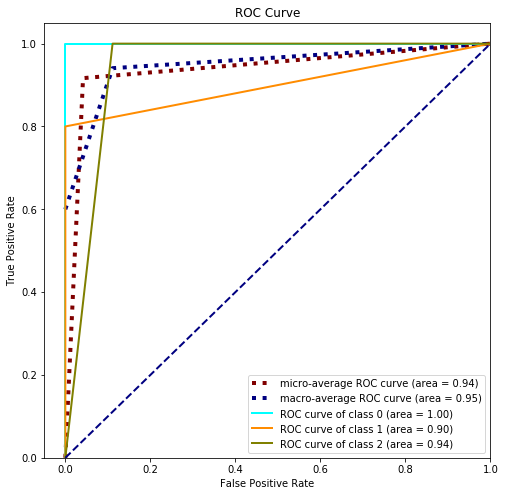

CV Split 6 ..

Evaluating model..

Accuracy score for training data.
Accuracy score for validation data.
Classification report for training data.
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        40
           2       1.00      1.00      1.00        45
           3       1.00      1.00      1.00        28

    accuracy                           1.00       113
   macro avg       1.00      1.00      1.00       113
weighted avg       1.00      1.00      1.00       113

Classification report for validation data.
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         3

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

Confusion matrix..
[[4 0 0]
 [0 5 0]
 [0 0 3]]


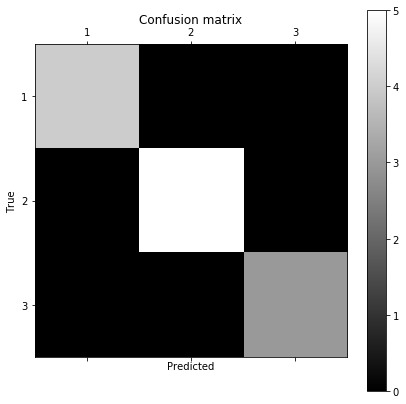

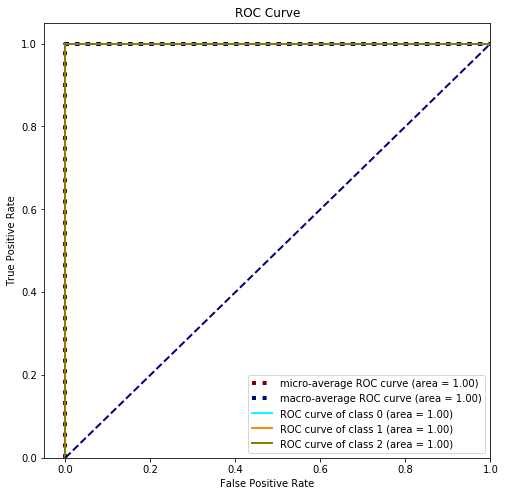

CV Split 7 ..

Evaluating model..

Accuracy score for training data.
Accuracy score for validation data.
Classification report for training data.
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        40
           2       1.00      1.00      1.00        45
           3       1.00      1.00      1.00        28

    accuracy                           1.00       113
   macro avg       1.00      1.00      1.00       113
weighted avg       1.00      1.00      1.00       113

Classification report for validation data.
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         3

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

Confusion matrix..
[[4 0 0]
 [0 5 0]
 [0 0 3]]


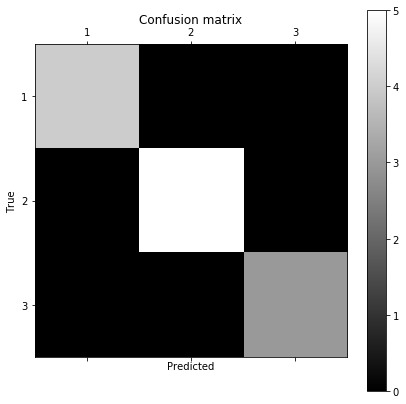

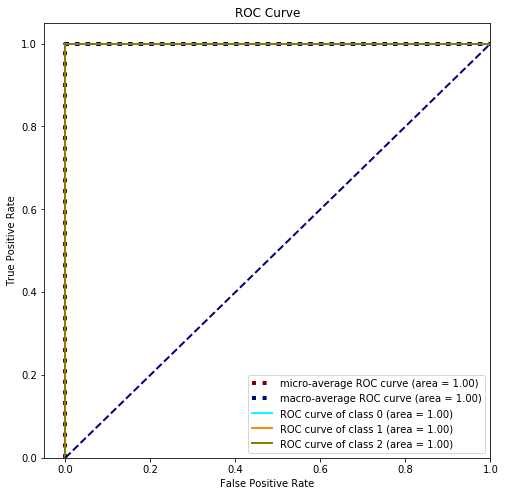

CV Split 8 ..

Evaluating model..

Accuracy score for training data.
Accuracy score for validation data.
Classification report for training data.
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        40
           2       1.00      1.00      1.00        45
           3       1.00      1.00      1.00        28

    accuracy                           1.00       113
   macro avg       1.00      1.00      1.00       113
weighted avg       1.00      1.00      1.00       113

Classification report for validation data.
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         3

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

Confusion matrix..
[[4 0 0]
 [0 5 0]
 [0 0 3]]


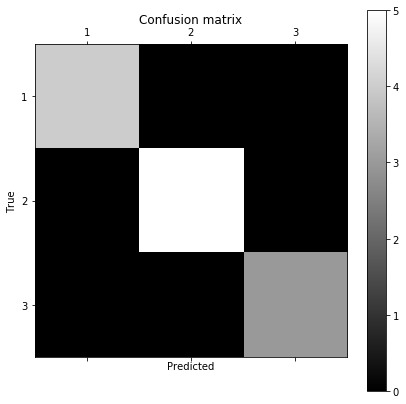

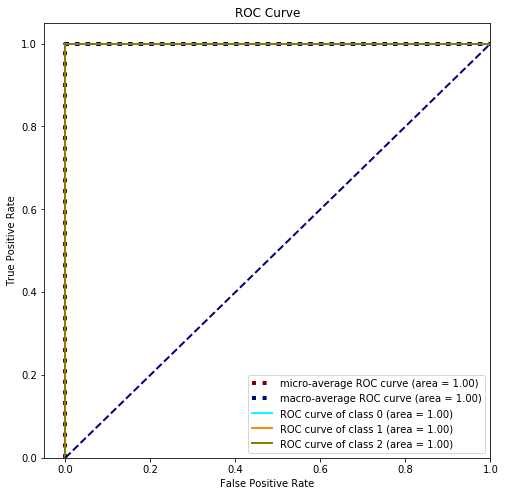

CV Split 9 ..

Evaluating model..

Accuracy score for training data.
Accuracy score for validation data.
Classification report for training data.
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        40
           2       1.00      1.00      1.00        45
           3       1.00      1.00      1.00        28

    accuracy                           1.00       113
   macro avg       1.00      1.00      1.00       113
weighted avg       1.00      1.00      1.00       113

Classification report for validation data.
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       0.83      1.00      0.91         5
           3       1.00      0.67      0.80         3

    accuracy                           0.92        12
   macro avg       0.94      0.89      0.90        12
weighted avg       0.93      0.92      0.91        12

Confusion matrix..
[[4 0 0]
 [0 5 0]
 [0 1 2]]


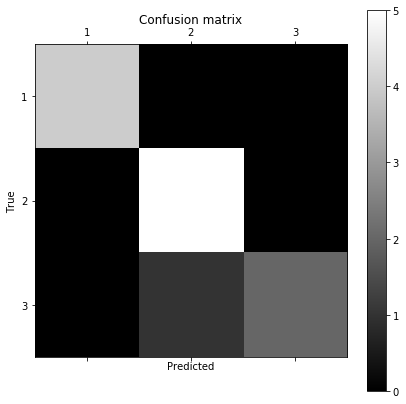

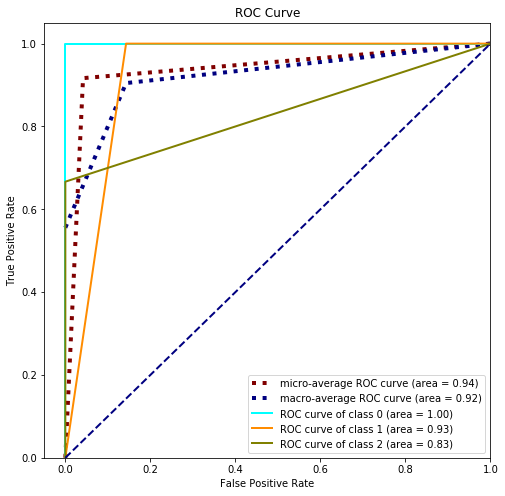

CV Split 10 ..

Evaluating model..

Accuracy score for training data.
Accuracy score for validation data.
Classification report for training data.
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        40
           2       1.00      1.00      1.00        45
           3       1.00      1.00      1.00        28

    accuracy                           1.00       113
   macro avg       1.00      1.00      1.00       113
weighted avg       1.00      1.00      1.00       113

Classification report for validation data.
              precision    recall  f1-score   support

           1       0.80      1.00      0.89         4
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00         3

    accuracy                           0.92        12
   macro avg       0.93      0.93      0.93        12
weighted avg       0.93      0.92      0.92        12

Confusion matrix..
[[4 0 0]
 [1 4 0]
 [0 0 3]]


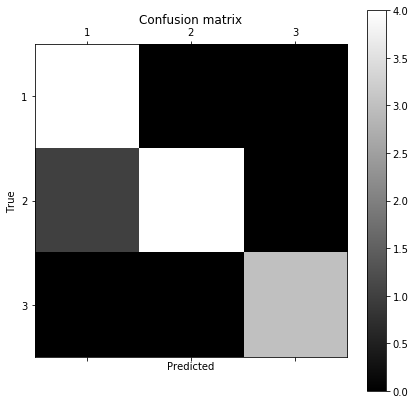

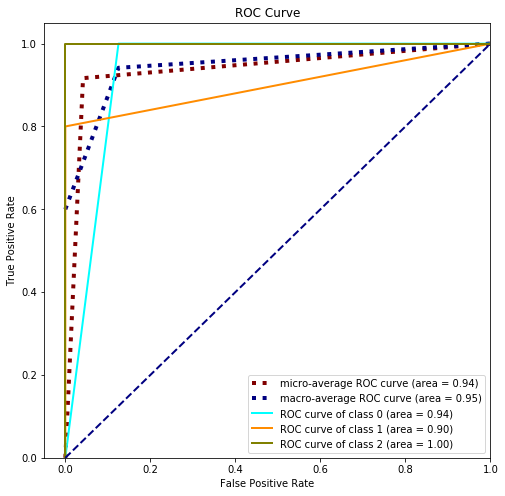


Mean classification scores for validation data...

Training accuracy: 0.998
Training precision: 0.998
Training recall: 0.999
Training f1-score: 0.998

Validation accuracy: 0.967
Validation precision: 0.974
Validation recall: 0.969
Validation f1-score: 0.968
AUC Mean Micro Average: 0.975
AUC Mean Macro Average: 0.976

Evaluating model on test set..
Classification report for test data.
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       0.95      0.95      0.95        21
           3       0.94      0.94      0.94        17

    accuracy                           0.96        53
   macro avg       0.96      0.96      0.96        53
weighted avg       0.96      0.96      0.96        53

Confusion matrix for test data.
[[15  0  0]
 [ 0 20  1]
 [ 0  1 16]]


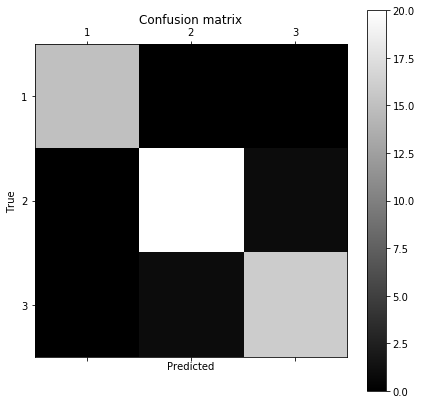

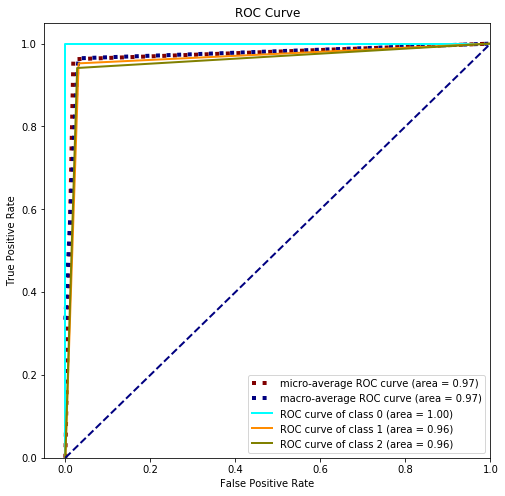

Evaluation complete.


In [143]:
evaluate_model(wine_train, wine_labels_train, wine_test, wine_labels_test, random_forest_base)

Loading saved model...
Loaded..
Evaluating model on validation set..
CV Split 1 ..

Evaluating model..

Accuracy score for training data.
Accuracy score for validation data.
Classification report for training data.
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        39
           2       1.00      1.00      1.00        45
           3       1.00      1.00      1.00        27

    accuracy                           1.00       111
   macro avg       1.00      1.00      1.00       111
weighted avg       1.00      1.00      1.00       111

Classification report for validation data.
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         4

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00  

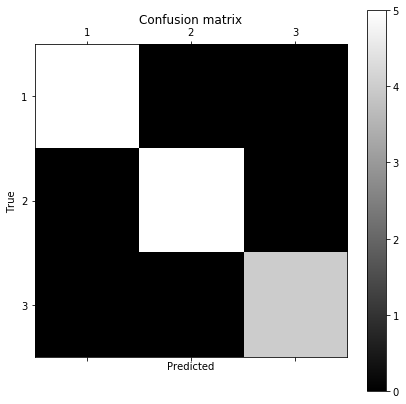

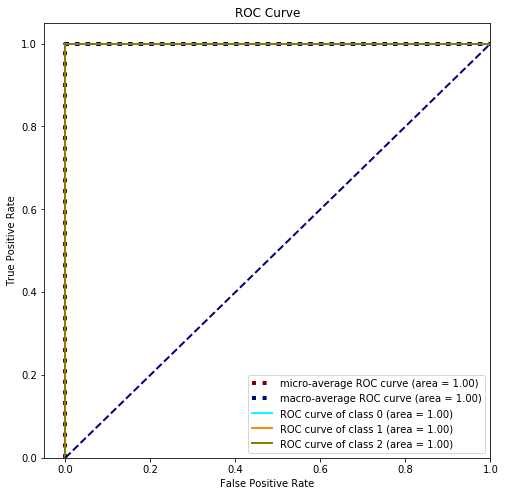

CV Split 2 ..

Evaluating model..

Accuracy score for training data.
Accuracy score for validation data.
Classification report for training data.
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        39
           2       1.00      1.00      1.00        45
           3       1.00      1.00      1.00        28

    accuracy                           1.00       112
   macro avg       1.00      1.00      1.00       112
weighted avg       1.00      1.00      1.00       112

Classification report for validation data.
              precision    recall  f1-score   support

           1       0.83      1.00      0.91         5
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00         3

    accuracy                           0.92        13
   macro avg       0.94      0.93      0.93        13
weighted avg       0.94      0.92      0.92        13

Confusion matrix..
[[5 0 0]
 [1 4 0]
 [0 0 3]]


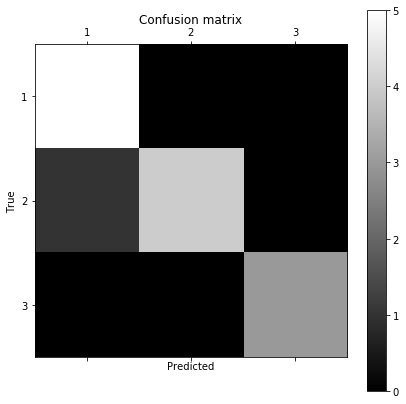

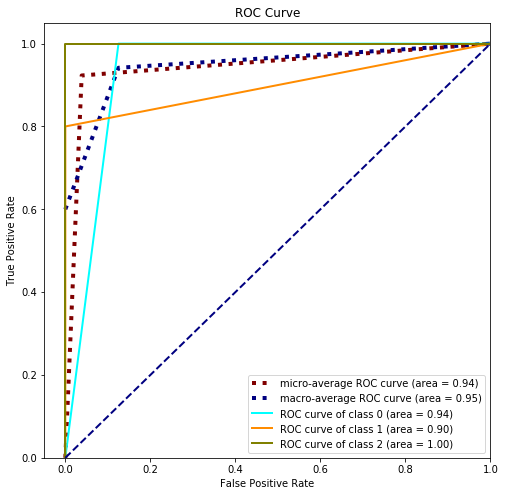

CV Split 3 ..

Evaluating model..

Accuracy score for training data.
Accuracy score for validation data.
Classification report for training data.
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        39
           2       1.00      1.00      1.00        45
           3       1.00      1.00      1.00        28

    accuracy                           1.00       112
   macro avg       1.00      1.00      1.00       112
weighted avg       1.00      1.00      1.00       112

Classification report for validation data.
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         3

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13

Confusion matrix..
[[5 0 0]
 [0 5 0]
 [0 0 3]]


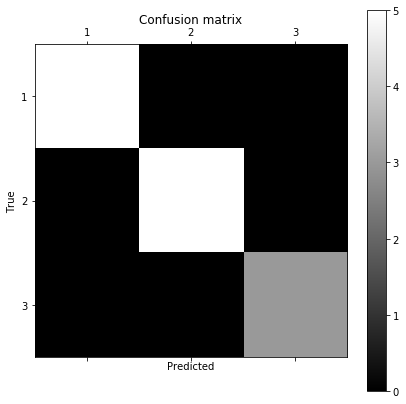

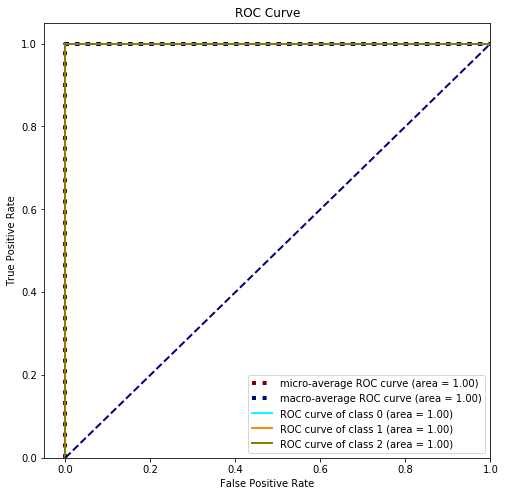

CV Split 4 ..

Evaluating model..

Accuracy score for training data.
Accuracy score for validation data.
Classification report for training data.
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        39
           2       1.00      1.00      1.00        45
           3       1.00      1.00      1.00        28

    accuracy                           1.00       112
   macro avg       1.00      1.00      1.00       112
weighted avg       1.00      1.00      1.00       112

Classification report for validation data.
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         3

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13

Confusion matrix..
[[5 0 0]
 [0 5 0]
 [0 0 3]]


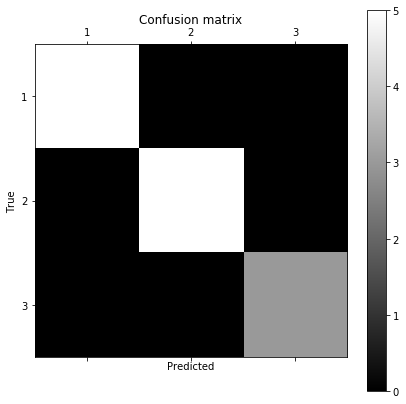

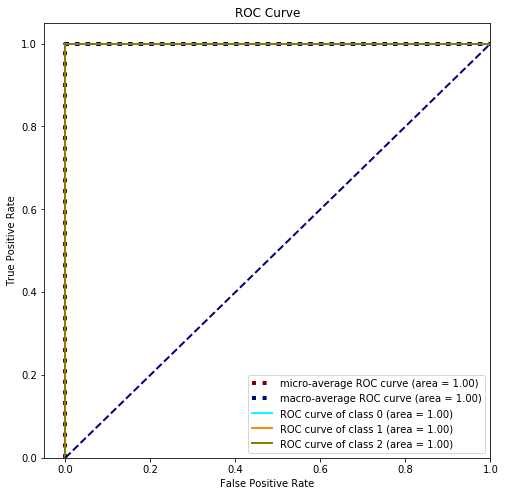

CV Split 5 ..

Evaluating model..

Accuracy score for training data.
Accuracy score for validation data.
Classification report for training data.
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        40
           2       1.00      1.00      1.00        45
           3       1.00      1.00      1.00        28

    accuracy                           1.00       113
   macro avg       1.00      1.00      1.00       113
weighted avg       1.00      1.00      1.00       113

Classification report for validation data.
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         3

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

Confusion matrix..
[[4 0 0]
 [0 5 0]
 [0 0 3]]


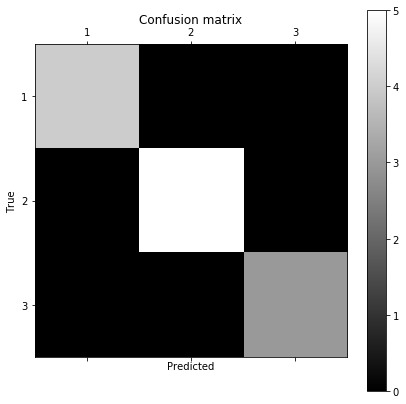

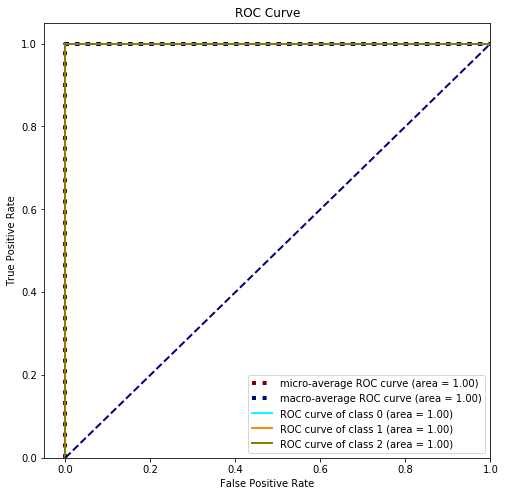

CV Split 6 ..

Evaluating model..

Accuracy score for training data.
Accuracy score for validation data.
Classification report for training data.
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        40
           2       1.00      1.00      1.00        45
           3       1.00      1.00      1.00        28

    accuracy                           1.00       113
   macro avg       1.00      1.00      1.00       113
weighted avg       1.00      1.00      1.00       113

Classification report for validation data.
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         3

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

Confusion matrix..
[[4 0 0]
 [0 5 0]
 [0 0 3]]


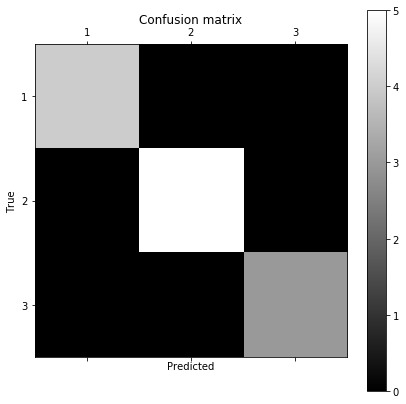

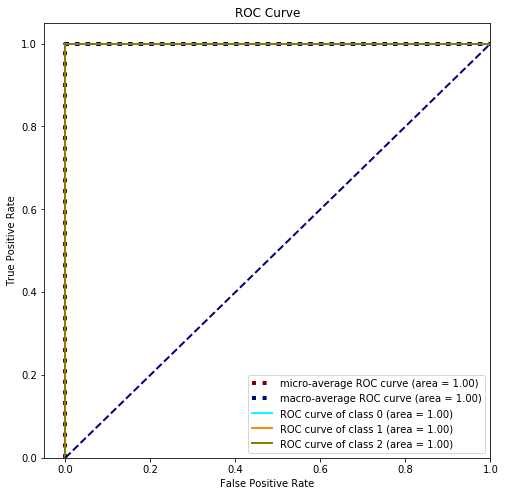

CV Split 7 ..

Evaluating model..

Accuracy score for training data.
Accuracy score for validation data.
Classification report for training data.
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        40
           2       1.00      1.00      1.00        45
           3       1.00      1.00      1.00        28

    accuracy                           1.00       113
   macro avg       1.00      1.00      1.00       113
weighted avg       1.00      1.00      1.00       113

Classification report for validation data.
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         3

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

Confusion matrix..
[[4 0 0]
 [0 5 0]
 [0 0 3]]


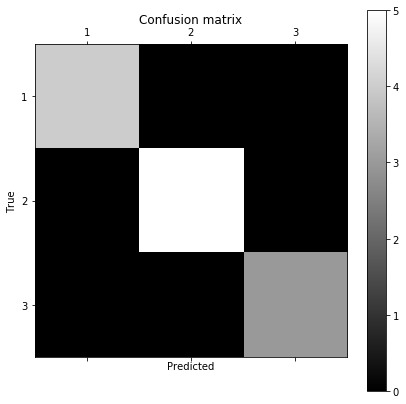

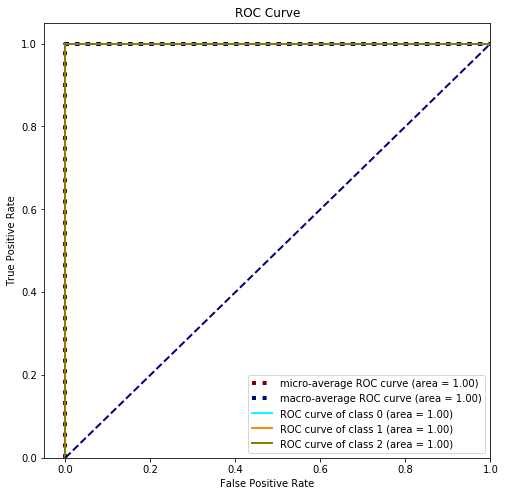

CV Split 8 ..

Evaluating model..

Accuracy score for training data.
Accuracy score for validation data.
Classification report for training data.
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        40
           2       1.00      1.00      1.00        45
           3       1.00      1.00      1.00        28

    accuracy                           1.00       113
   macro avg       1.00      1.00      1.00       113
weighted avg       1.00      1.00      1.00       113

Classification report for validation data.
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         3

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

Confusion matrix..
[[4 0 0]
 [0 5 0]
 [0 0 3]]


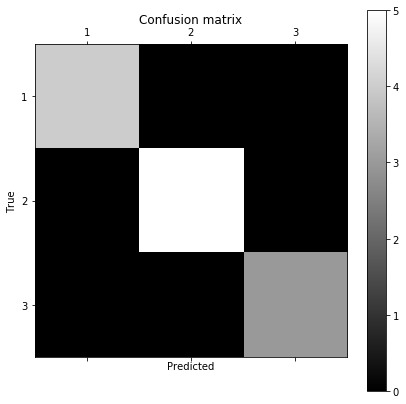

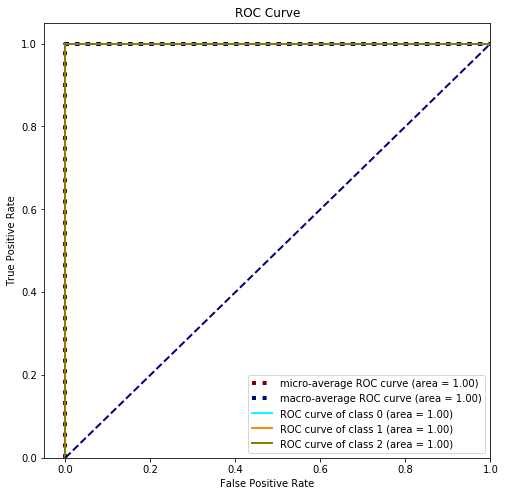

CV Split 9 ..

Evaluating model..

Accuracy score for training data.
Accuracy score for validation data.
Classification report for training data.
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        40
           2       1.00      1.00      1.00        45
           3       1.00      1.00      1.00        28

    accuracy                           1.00       113
   macro avg       1.00      1.00      1.00       113
weighted avg       1.00      1.00      1.00       113

Classification report for validation data.
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         3

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

Confusion matrix..
[[4 0 0]
 [0 5 0]
 [0 0 3]]


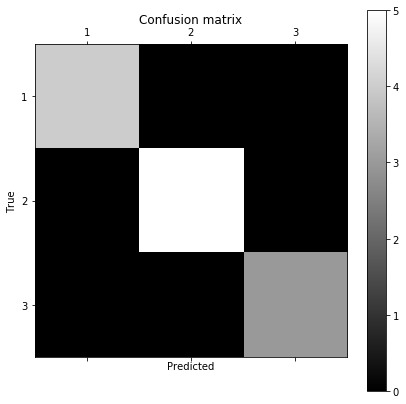

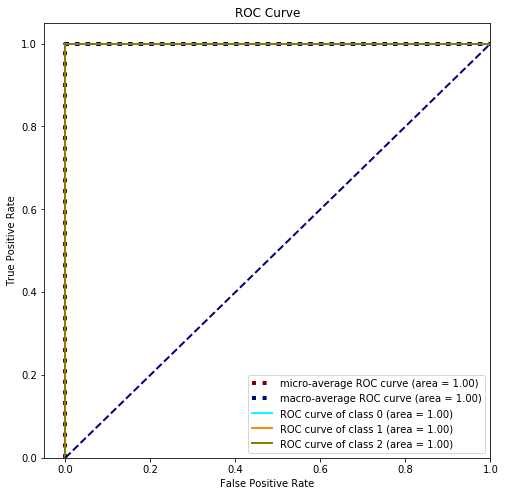

CV Split 10 ..

Evaluating model..

Accuracy score for training data.
Accuracy score for validation data.
Classification report for training data.
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        40
           2       1.00      1.00      1.00        45
           3       1.00      1.00      1.00        28

    accuracy                           1.00       113
   macro avg       1.00      1.00      1.00       113
weighted avg       1.00      1.00      1.00       113

Classification report for validation data.
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         3

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

Confusion matrix..
[[4 0 0]
 [0 5 0]
 [0 0 3]]


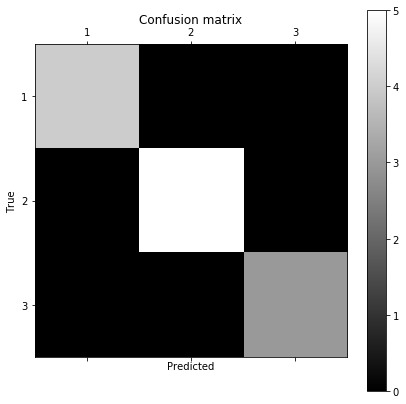

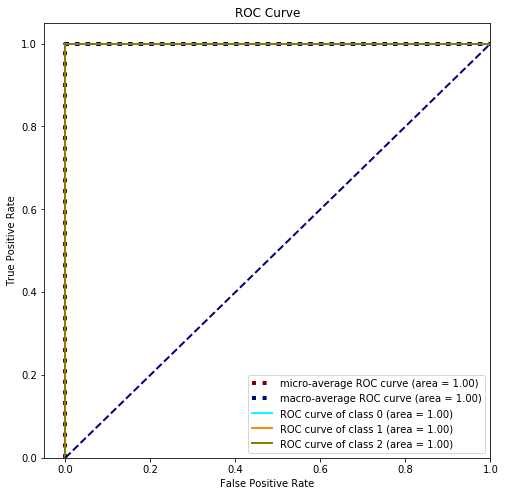


Mean classification scores for validation data...

Training accuracy: 1.0
Training precision: 1.0
Training recall: 1.0
Training f1-score: 1.0

Validation accuracy: 0.992
Validation precision: 0.994
Validation recall: 0.993
Validation f1-score: 0.993
AUC Mean Micro Average: 0.994
AUC Mean Macro Average: 0.995

Evaluating model on test set..
Classification report for test data.
              precision    recall  f1-score   support

           1       1.00      0.93      0.97        15
           2       0.95      0.95      0.95        21
           3       0.94      1.00      0.97        17

    accuracy                           0.96        53
   macro avg       0.97      0.96      0.96        53
weighted avg       0.96      0.96      0.96        53

Confusion matrix for test data.
[[14  1  0]
 [ 0 20  1]
 [ 0  0 17]]


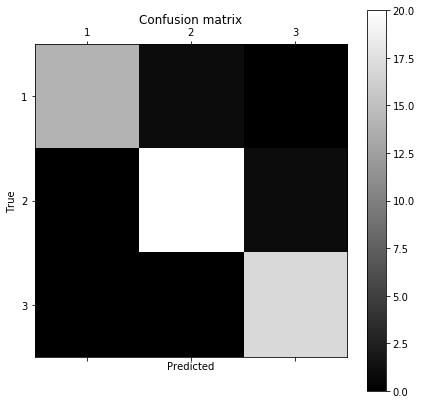

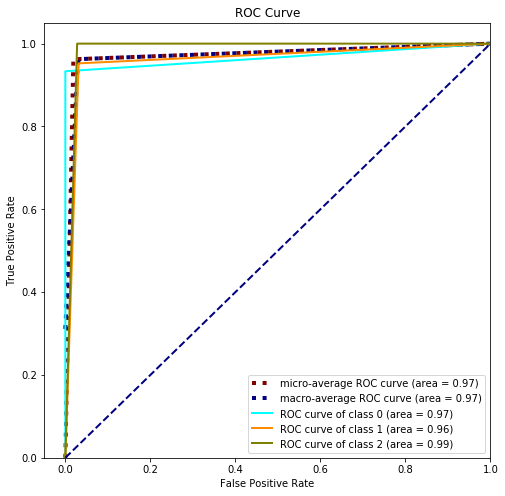

Evaluation complete.


In [144]:
random_forest_opt = train_optimize_model(wine_train,
                     wine_labels_train,
                     random_forest,
                     model_name='random_forest_rs.model',
                     optimizer='Random',
                     param_list=rf_param_list)
evaluate_model(wine_train, wine_labels_train, wine_test, wine_labels_test, random_forest_opt)

\textit{Note: running Grid Search on Random Forest usually takes at least a few minutes.} 

Loading saved model...
Loaded..
Evaluating model on validation set..
CV Split 1 ..

Evaluating model..

Accuracy score for training data.
Accuracy score for validation data.
Classification report for training data.
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        39
           2       1.00      1.00      1.00        45
           3       1.00      1.00      1.00        27

    accuracy                           1.00       111
   macro avg       1.00      1.00      1.00       111
weighted avg       1.00      1.00      1.00       111

Classification report for validation data.
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         4

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00  

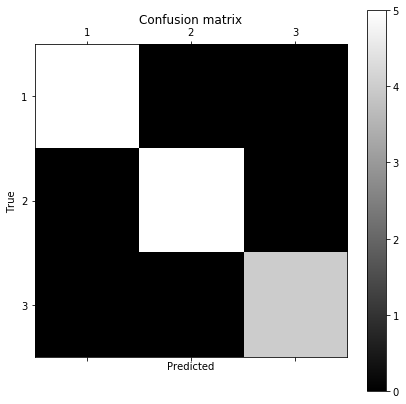

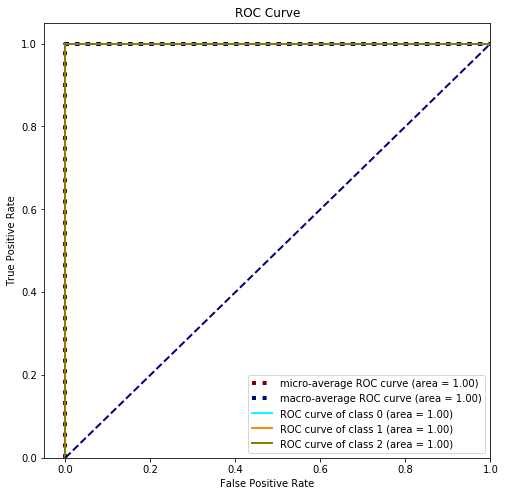

CV Split 2 ..

Evaluating model..

Accuracy score for training data.
Accuracy score for validation data.
Classification report for training data.
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        39
           2       1.00      1.00      1.00        45
           3       1.00      1.00      1.00        28

    accuracy                           1.00       112
   macro avg       1.00      1.00      1.00       112
weighted avg       1.00      1.00      1.00       112

Classification report for validation data.
              precision    recall  f1-score   support

           1       0.83      1.00      0.91         5
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00         3

    accuracy                           0.92        13
   macro avg       0.94      0.93      0.93        13
weighted avg       0.94      0.92      0.92        13

Confusion matrix..
[[5 0 0]
 [1 4 0]
 [0 0 3]]


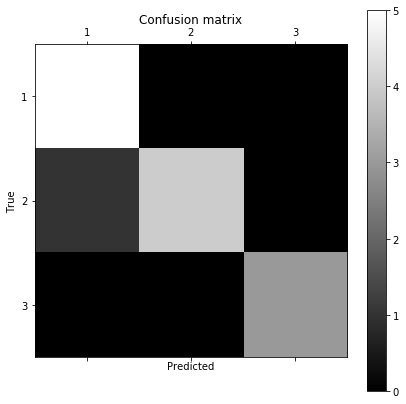

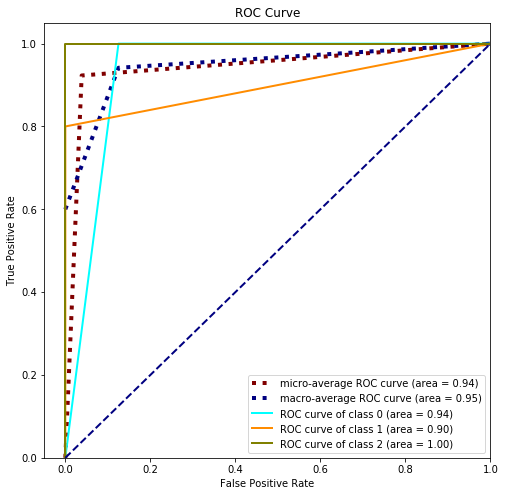

CV Split 3 ..

Evaluating model..

Accuracy score for training data.
Accuracy score for validation data.
Classification report for training data.
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        39
           2       1.00      1.00      1.00        45
           3       1.00      1.00      1.00        28

    accuracy                           1.00       112
   macro avg       1.00      1.00      1.00       112
weighted avg       1.00      1.00      1.00       112

Classification report for validation data.
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       0.83      1.00      0.91         5
           3       1.00      0.67      0.80         3

    accuracy                           0.92        13
   macro avg       0.94      0.89      0.90        13
weighted avg       0.94      0.92      0.92        13

Confusion matrix..
[[5 0 0]
 [0 5 0]
 [0 1 2]]


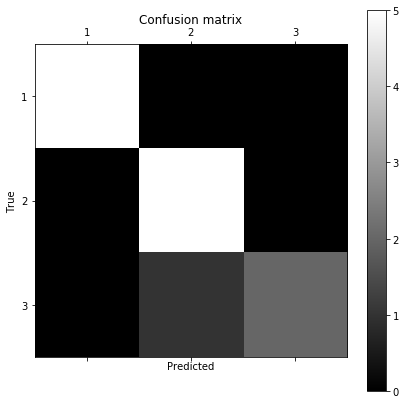

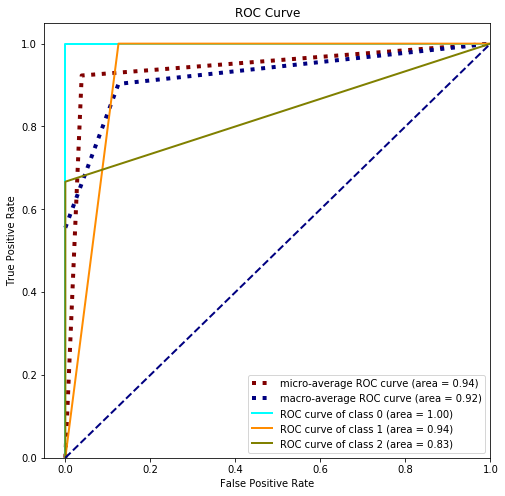

CV Split 4 ..

Evaluating model..

Accuracy score for training data.
Accuracy score for validation data.
Classification report for training data.
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        39
           2       1.00      1.00      1.00        45
           3       1.00      1.00      1.00        28

    accuracy                           1.00       112
   macro avg       1.00      1.00      1.00       112
weighted avg       1.00      1.00      1.00       112

Classification report for validation data.
              precision    recall  f1-score   support

           1       0.83      1.00      0.91         5
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00         3

    accuracy                           0.92        13
   macro avg       0.94      0.93      0.93        13
weighted avg       0.94      0.92      0.92        13

Confusion matrix..
[[5 0 0]
 [1 4 0]
 [0 0 3]]


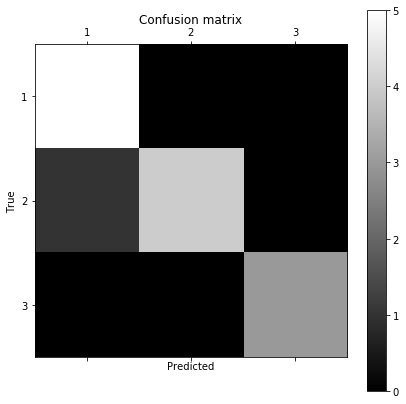

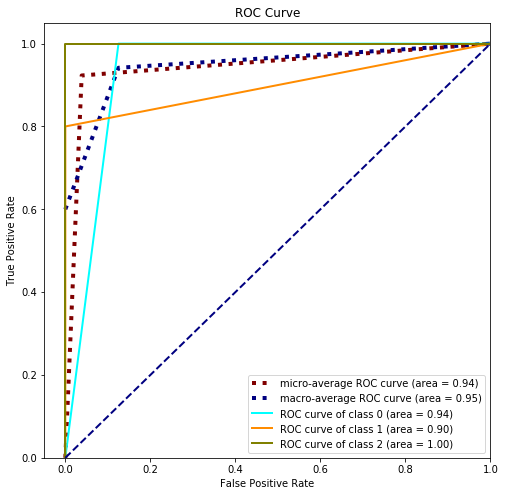

CV Split 5 ..

Evaluating model..

Accuracy score for training data.
Accuracy score for validation data.
Classification report for training data.
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        40
           2       1.00      1.00      1.00        45
           3       1.00      1.00      1.00        28

    accuracy                           1.00       113
   macro avg       1.00      1.00      1.00       113
weighted avg       1.00      1.00      1.00       113

Classification report for validation data.
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         3

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

Confusion matrix..
[[4 0 0]
 [0 5 0]
 [0 0 3]]


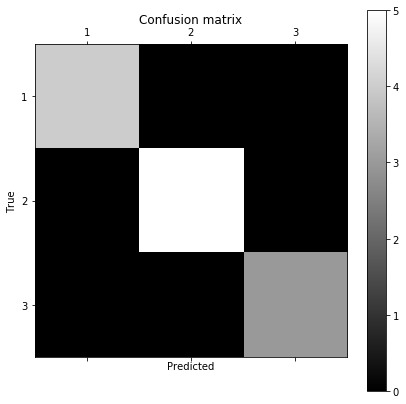

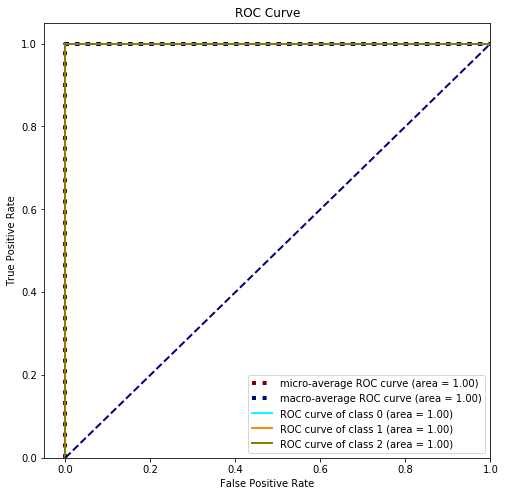

CV Split 6 ..

Evaluating model..

Accuracy score for training data.
Accuracy score for validation data.
Classification report for training data.
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        40
           2       1.00      1.00      1.00        45
           3       1.00      1.00      1.00        28

    accuracy                           1.00       113
   macro avg       1.00      1.00      1.00       113
weighted avg       1.00      1.00      1.00       113

Classification report for validation data.
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         3

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

Confusion matrix..
[[4 0 0]
 [0 5 0]
 [0 0 3]]


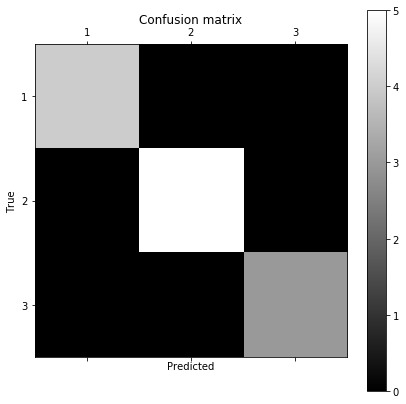

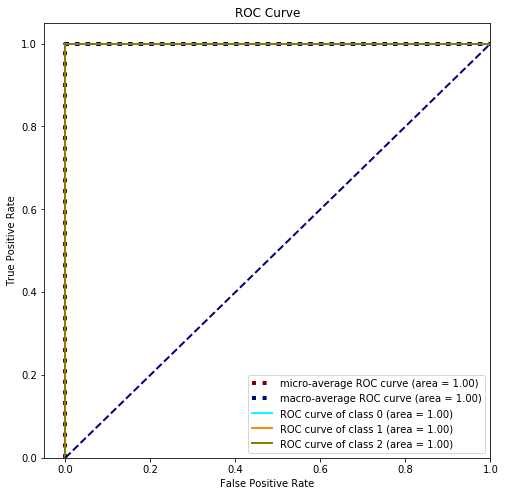

CV Split 7 ..

Evaluating model..

Accuracy score for training data.
Accuracy score for validation data.
Classification report for training data.
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        40
           2       1.00      1.00      1.00        45
           3       1.00      1.00      1.00        28

    accuracy                           1.00       113
   macro avg       1.00      1.00      1.00       113
weighted avg       1.00      1.00      1.00       113

Classification report for validation data.
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         3

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

Confusion matrix..
[[4 0 0]
 [0 5 0]
 [0 0 3]]


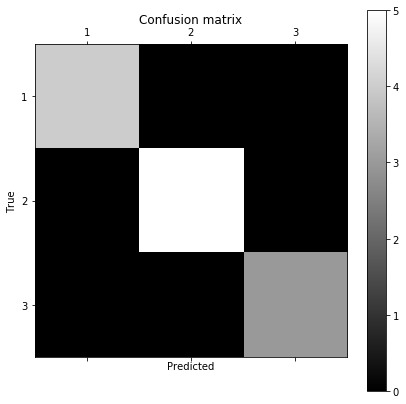

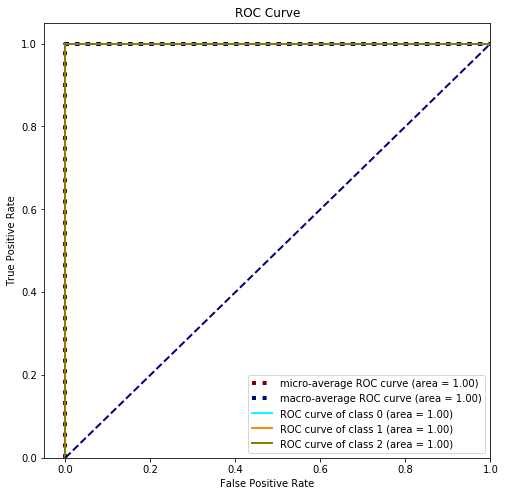

CV Split 8 ..

Evaluating model..

Accuracy score for training data.
Accuracy score for validation data.
Classification report for training data.
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        40
           2       1.00      1.00      1.00        45
           3       1.00      1.00      1.00        28

    accuracy                           1.00       113
   macro avg       1.00      1.00      1.00       113
weighted avg       1.00      1.00      1.00       113

Classification report for validation data.
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         3

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

Confusion matrix..
[[4 0 0]
 [0 5 0]
 [0 0 3]]


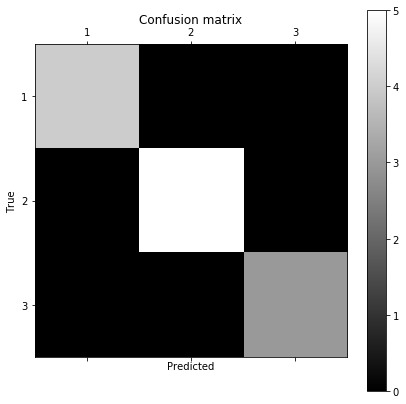

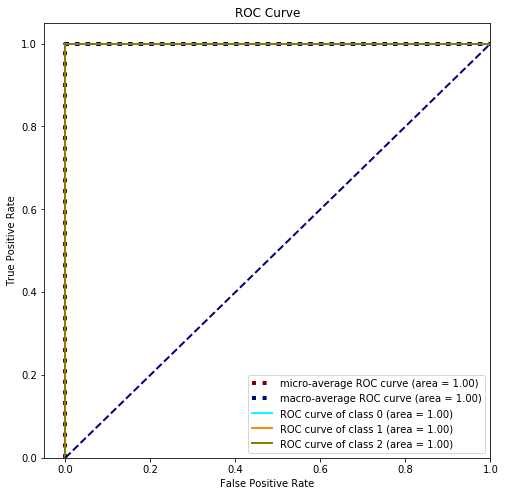

CV Split 9 ..

Evaluating model..

Accuracy score for training data.
Accuracy score for validation data.
Classification report for training data.
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        40
           2       1.00      1.00      1.00        45
           3       1.00      1.00      1.00        28

    accuracy                           1.00       113
   macro avg       1.00      1.00      1.00       113
weighted avg       1.00      1.00      1.00       113

Classification report for validation data.
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       0.83      1.00      0.91         5
           3       1.00      0.67      0.80         3

    accuracy                           0.92        12
   macro avg       0.94      0.89      0.90        12
weighted avg       0.93      0.92      0.91        12

Confusion matrix..
[[4 0 0]
 [0 5 0]
 [0 1 2]]


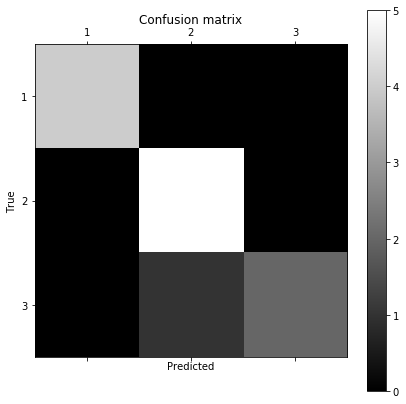

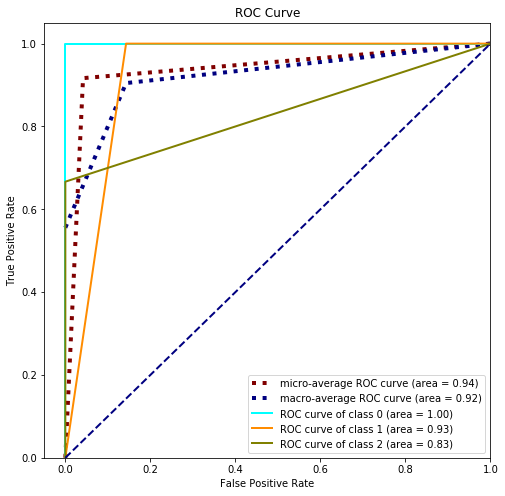

CV Split 10 ..

Evaluating model..

Accuracy score for training data.
Accuracy score for validation data.
Classification report for training data.
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        40
           2       1.00      1.00      1.00        45
           3       1.00      1.00      1.00        28

    accuracy                           1.00       113
   macro avg       1.00      1.00      1.00       113
weighted avg       1.00      1.00      1.00       113

Classification report for validation data.
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       1.00      0.80      0.89         5
           3       0.75      1.00      0.86         3

    accuracy                           0.92        12
   macro avg       0.92      0.93      0.92        12
weighted avg       0.94      0.92      0.92        12

Confusion matrix..
[[4 0 0]
 [0 4 1]
 [0 0 3]]


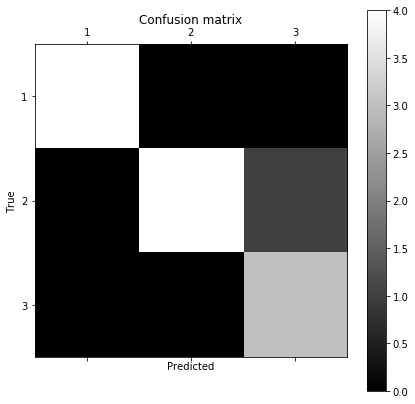

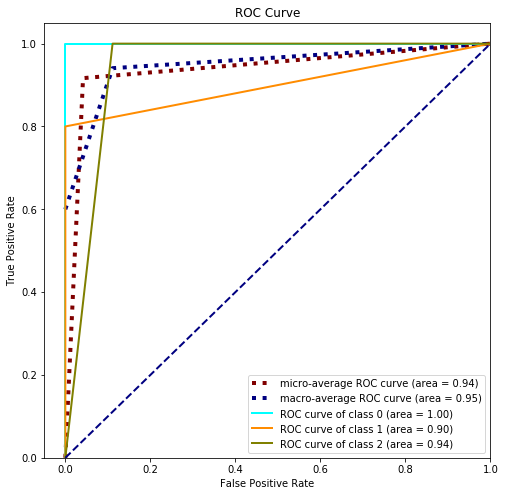


Mean classification scores for validation data...

Training accuracy: 1.0
Training precision: 1.0
Training recall: 1.0
Training f1-score: 1.0

Validation accuracy: 0.96
Validation precision: 0.969
Validation recall: 0.958
Validation f1-score: 0.959
AUC Mean Micro Average: 0.97
AUC Mean Macro Average: 0.968

Evaluating model on test set..
Classification report for test data.
              precision    recall  f1-score   support

           1       1.00      0.93      0.97        15
           2       0.95      0.95      0.95        21
           3       0.94      1.00      0.97        17

    accuracy                           0.96        53
   macro avg       0.97      0.96      0.96        53
weighted avg       0.96      0.96      0.96        53

Confusion matrix for test data.
[[14  1  0]
 [ 0 20  1]
 [ 0  0 17]]


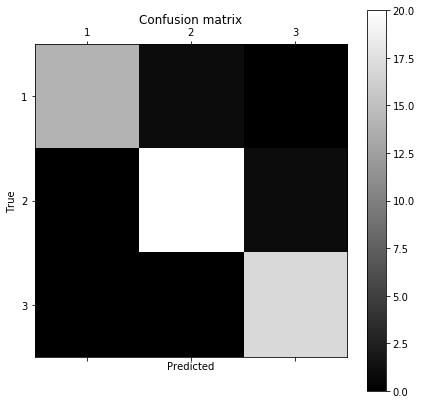

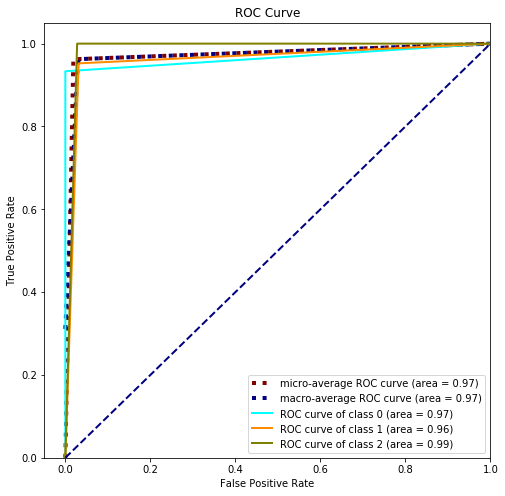

Evaluation complete.


In [145]:
random_forest_opt = train_optimize_model(wine_train,
                     wine_labels_train,
                     random_forest,
                     model_name='random_forest_grid.model',
                     optimizer='Grid',
                     param_list=rf_param_list)
evaluate_model(wine_train, wine_labels_train, wine_test, wine_labels_test, random_forest_opt)

#### 1-layer MLP

In [48]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [49]:
wine_train_scaled = pd.DataFrame(scaler.fit_transform(wine_train), columns = wine_data.columns[1:])
wine_test_scaled = pd.DataFrame(scaler.fit_transform(wine_test), columns = wine_data.columns[1:])

Training baseline model..
Training complete.
Evaluating model on validation set..
CV Split 1 ..

Evaluating model..

Accuracy score for training data.
Accuracy score for validation data.
Classification report for training data.
              precision    recall  f1-score   support

           1       1.00      0.97      0.99        39
           2       0.98      1.00      0.99        45
           3       1.00      1.00      1.00        27

    accuracy                           0.99       111
   macro avg       0.99      0.99      0.99       111
weighted avg       0.99      0.99      0.99       111

Classification report for validation data.
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         4

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.0

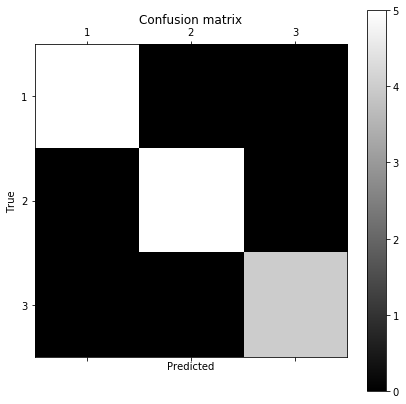

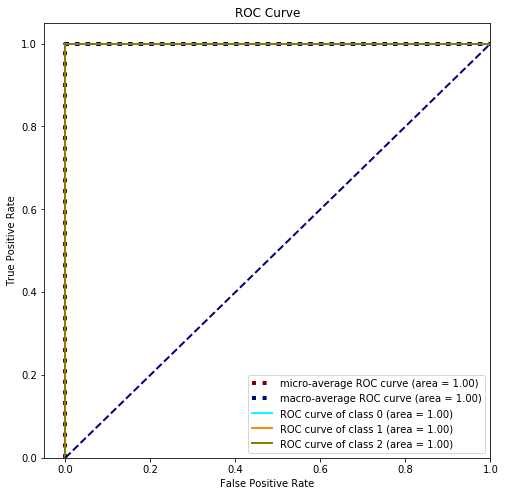

CV Split 2 ..

Evaluating model..

Accuracy score for training data.
Accuracy score for validation data.
Classification report for training data.
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        39
           2       1.00      1.00      1.00        45
           3       1.00      1.00      1.00        28

    accuracy                           1.00       112
   macro avg       1.00      1.00      1.00       112
weighted avg       1.00      1.00      1.00       112

Classification report for validation data.
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         3

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13

Confusion matrix..
[[5 0 0]
 [0 5 0]
 [0 0 3]]


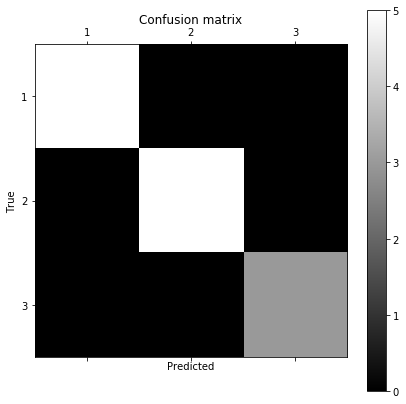

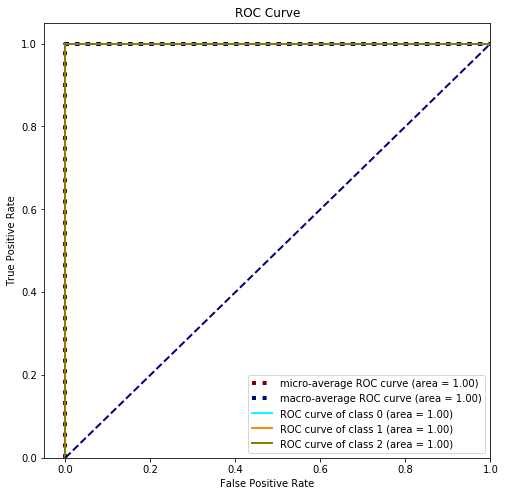

CV Split 3 ..

Evaluating model..

Accuracy score for training data.
Accuracy score for validation data.
Classification report for training data.
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        39
           2       1.00      1.00      1.00        45
           3       1.00      1.00      1.00        28

    accuracy                           1.00       112
   macro avg       1.00      1.00      1.00       112
weighted avg       1.00      1.00      1.00       112

Classification report for validation data.
              precision    recall  f1-score   support

           1       1.00      0.80      0.89         5
           2       0.83      1.00      0.91         5
           3       1.00      1.00      1.00         3

    accuracy                           0.92        13
   macro avg       0.94      0.93      0.93        13
weighted avg       0.94      0.92      0.92        13

Confusion matrix..
[[4 1 0]
 [0 5 0]
 [0 0 3]]


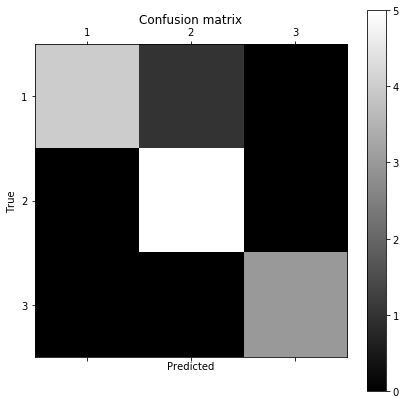

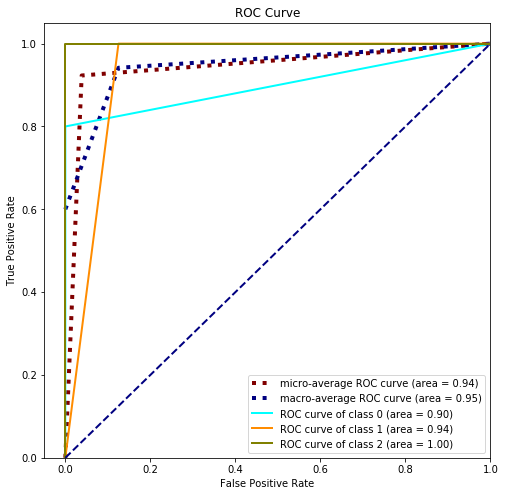

CV Split 4 ..

Evaluating model..

Accuracy score for training data.
Accuracy score for validation data.
Classification report for training data.
              precision    recall  f1-score   support

           1       1.00      0.97      0.99        39
           2       0.98      1.00      0.99        45
           3       1.00      1.00      1.00        28

    accuracy                           0.99       112
   macro avg       0.99      0.99      0.99       112
weighted avg       0.99      0.99      0.99       112

Classification report for validation data.
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         3

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13

Confusion matrix..
[[5 0 0]
 [0 5 0]
 [0 0 3]]


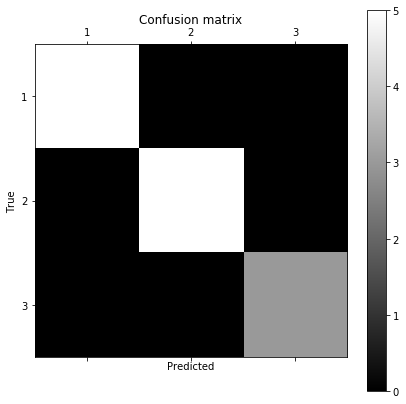

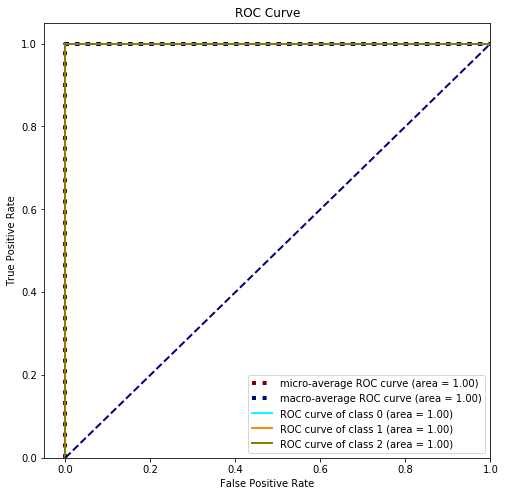

CV Split 5 ..

Evaluating model..

Accuracy score for training data.
Accuracy score for validation data.
Classification report for training data.
              precision    recall  f1-score   support

           1       1.00      0.97      0.99        40
           2       0.98      1.00      0.99        45
           3       1.00      1.00      1.00        28

    accuracy                           0.99       113
   macro avg       0.99      0.99      0.99       113
weighted avg       0.99      0.99      0.99       113

Classification report for validation data.
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         3

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

Confusion matrix..
[[4 0 0]
 [0 5 0]
 [0 0 3]]


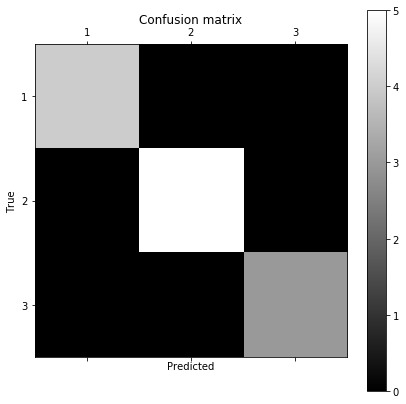

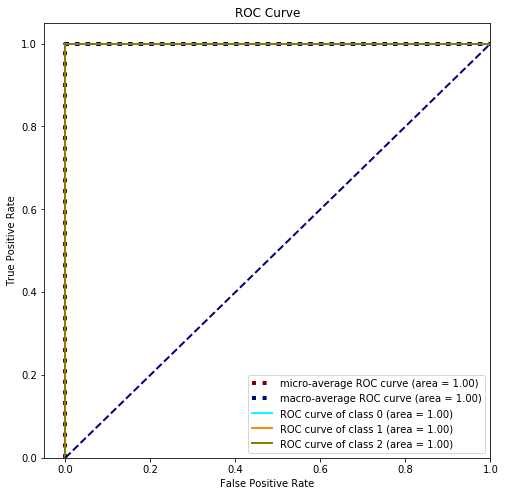

CV Split 6 ..

Evaluating model..

Accuracy score for training data.
Accuracy score for validation data.
Classification report for training data.
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        40
           2       1.00      0.98      0.99        45
           3       0.97      1.00      0.98        28

    accuracy                           0.99       113
   macro avg       0.99      0.99      0.99       113
weighted avg       0.99      0.99      0.99       113

Classification report for validation data.
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       1.00      0.80      0.89         5
           3       0.75      1.00      0.86         3

    accuracy                           0.92        12
   macro avg       0.92      0.93      0.92        12
weighted avg       0.94      0.92      0.92        12

Confusion matrix..
[[4 0 0]
 [0 4 1]
 [0 0 3]]


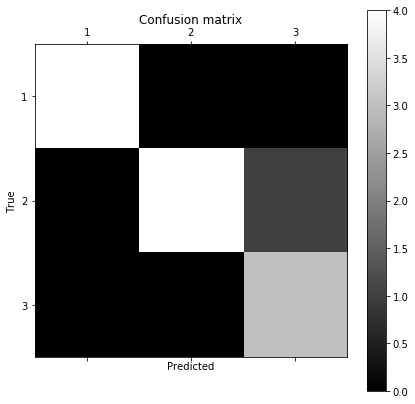

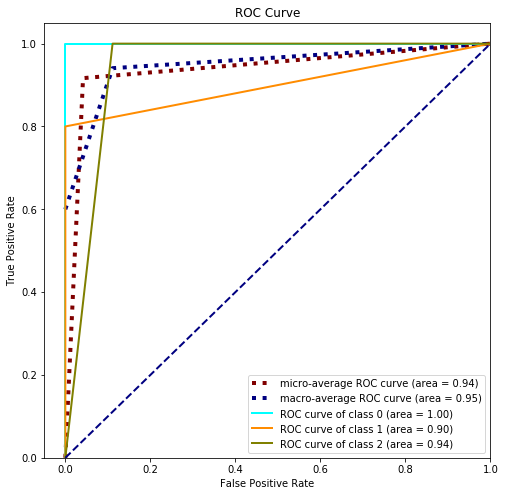

CV Split 7 ..

Evaluating model..

Accuracy score for training data.
Accuracy score for validation data.
Classification report for training data.
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        40
           2       1.00      0.98      0.99        45
           3       0.97      1.00      0.98        28

    accuracy                           0.99       113
   macro avg       0.99      0.99      0.99       113
weighted avg       0.99      0.99      0.99       113

Classification report for validation data.
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         3

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

Confusion matrix..
[[4 0 0]
 [0 5 0]
 [0 0 3]]


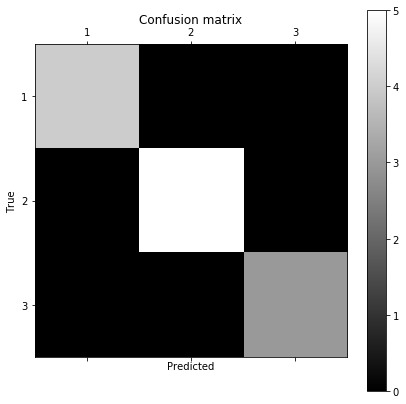

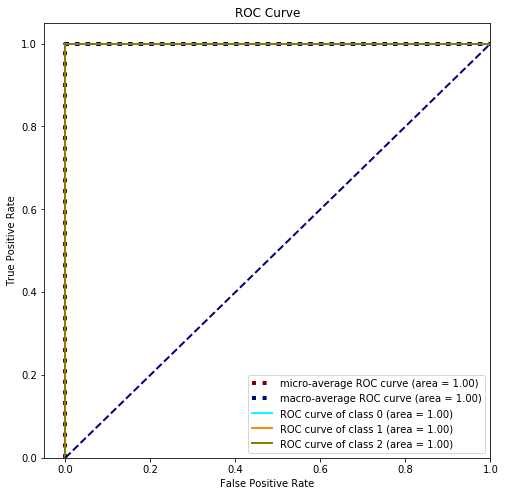

CV Split 8 ..

Evaluating model..

Accuracy score for training data.
Accuracy score for validation data.
Classification report for training data.
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        40
           2       1.00      1.00      1.00        45
           3       1.00      1.00      1.00        28

    accuracy                           1.00       113
   macro avg       1.00      1.00      1.00       113
weighted avg       1.00      1.00      1.00       113

Classification report for validation data.
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         3

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

Confusion matrix..
[[4 0 0]
 [0 5 0]
 [0 0 3]]


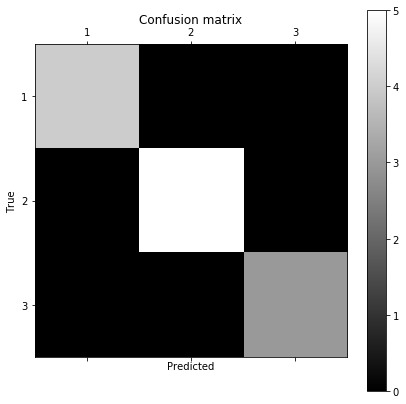

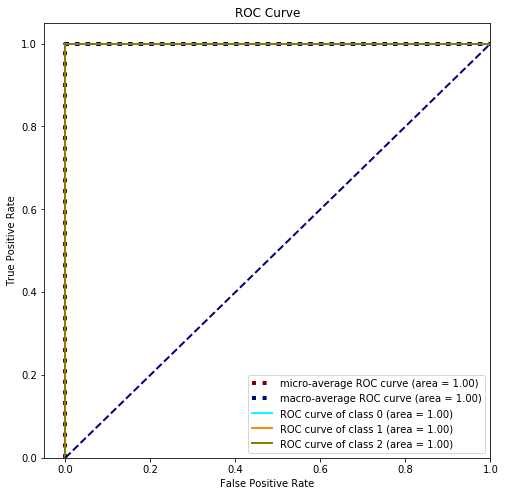

CV Split 9 ..

Evaluating model..

Accuracy score for training data.
Accuracy score for validation data.
Classification report for training data.
              precision    recall  f1-score   support

           1       1.00      0.97      0.99        40
           2       0.98      1.00      0.99        45
           3       1.00      1.00      1.00        28

    accuracy                           0.99       113
   macro avg       0.99      0.99      0.99       113
weighted avg       0.99      0.99      0.99       113

Classification report for validation data.
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         3

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

Confusion matrix..
[[4 0 0]
 [0 5 0]
 [0 0 3]]


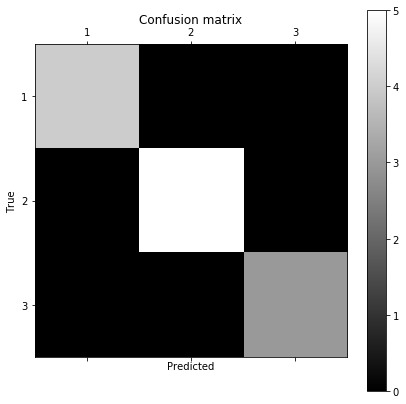

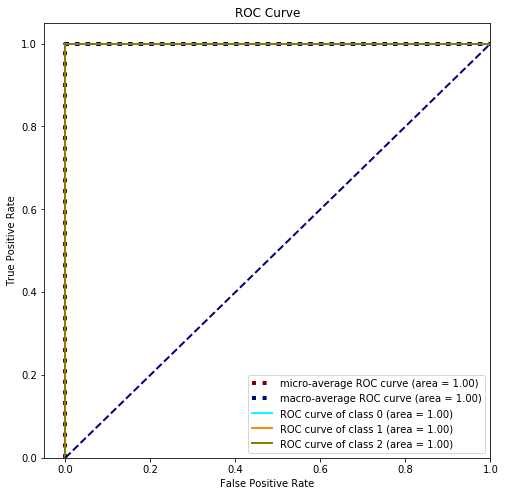

CV Split 10 ..

Evaluating model..

Accuracy score for training data.
Accuracy score for validation data.
Classification report for training data.
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        40
           2       1.00      1.00      1.00        45
           3       1.00      1.00      1.00        28

    accuracy                           1.00       113
   macro avg       1.00      1.00      1.00       113
weighted avg       1.00      1.00      1.00       113

Classification report for validation data.
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       1.00      0.80      0.89         5
           3       0.75      1.00      0.86         3

    accuracy                           0.92        12
   macro avg       0.92      0.93      0.92        12
weighted avg       0.94      0.92      0.92        12

Confusion matrix..
[[4 0 0]
 [0 4 1]
 [0 0 3]]


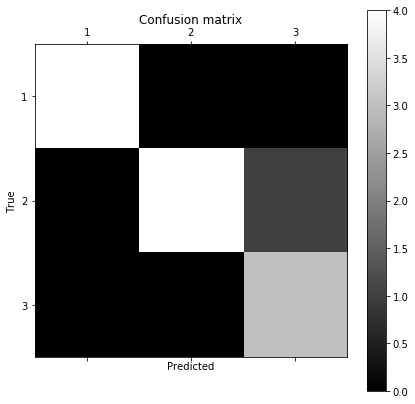

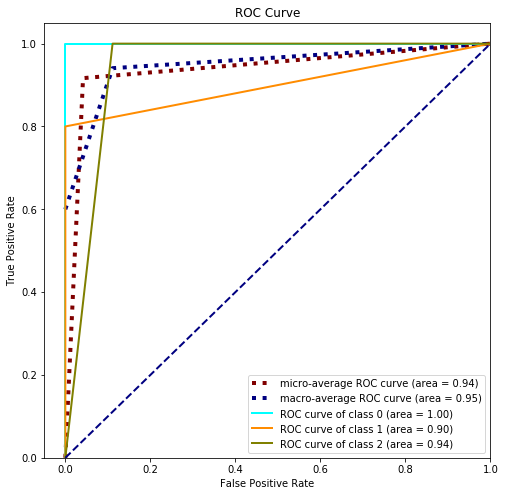


Mean classification scores for validation data...

Training accuracy: 0.995
Training precision: 0.995
Training recall: 0.995
Training f1-score: 0.995

Validation accuracy: 0.976
Validation precision: 0.978
Validation recall: 0.98
Validation f1-score: 0.976
AUC Mean Micro Average: 0.982
AUC Mean Macro Average: 0.984

Evaluating model on test set..
Classification report for test data.
              precision    recall  f1-score   support

           1       1.00      0.93      0.97        15
           2       0.95      0.95      0.95        21
           3       0.94      1.00      0.97        17

    accuracy                           0.96        53
   macro avg       0.97      0.96      0.96        53
weighted avg       0.96      0.96      0.96        53

Confusion matrix for test data.
[[14  1  0]
 [ 0 20  1]
 [ 0  0 17]]


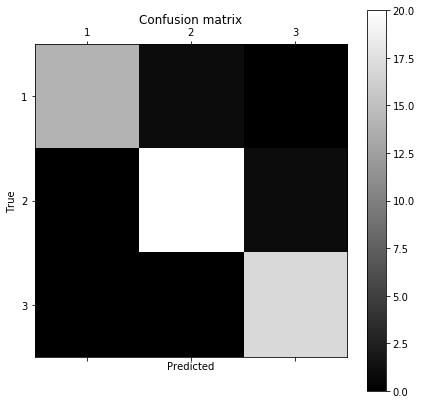

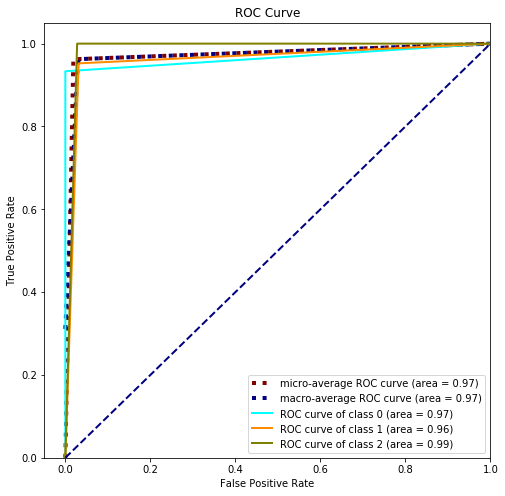

Evaluation complete.


In [148]:
shallow_nn = MLPClassifier()
shallow_nn_base = train_optimize_model(wine_train_scaled,
                                       wine_labels_train,
                                       shallow_nn,
                                       optimizer=None,
                                       param_list=None)
evaluate_model(wine_train_scaled, wine_labels_train, wine_test_scaled,
               wine_labels_test, shallow_nn_base)

Loading saved model...
Loaded..
Evaluating model on validation set..
CV Split 1 ..

Evaluating model..

Accuracy score for training data.
Accuracy score for validation data.
Classification report for training data.
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        39
           2       1.00      0.98      0.99        45
           3       0.96      1.00      0.98        27

    accuracy                           0.99       111
   macro avg       0.99      0.99      0.99       111
weighted avg       0.99      0.99      0.99       111

Classification report for validation data.
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         4

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00  

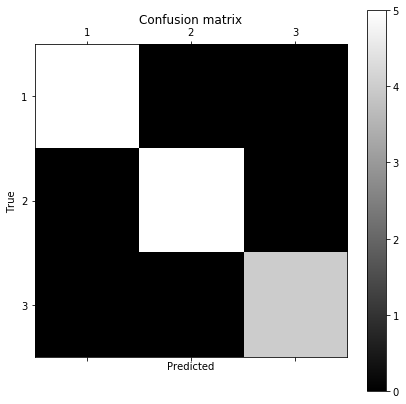

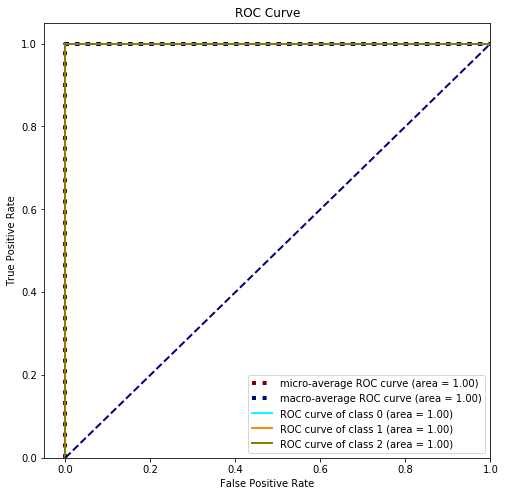

CV Split 2 ..

Evaluating model..

Accuracy score for training data.
Accuracy score for validation data.
Classification report for training data.
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        39
           2       1.00      1.00      1.00        45
           3       1.00      1.00      1.00        28

    accuracy                           1.00       112
   macro avg       1.00      1.00      1.00       112
weighted avg       1.00      1.00      1.00       112

Classification report for validation data.
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         3

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13

Confusion matrix..
[[5 0 0]
 [0 5 0]
 [0 0 3]]


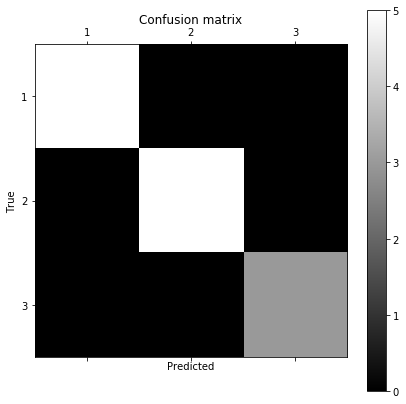

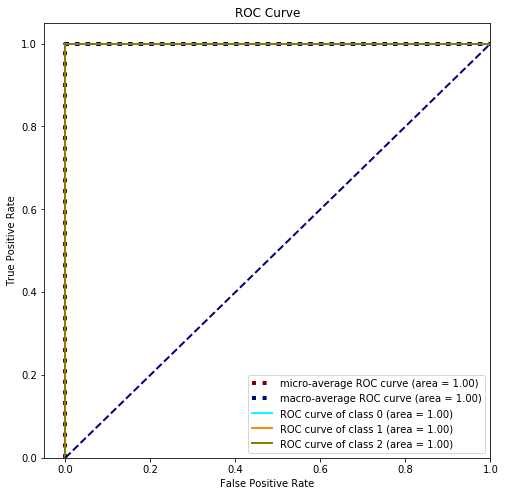

CV Split 3 ..

Evaluating model..

Accuracy score for training data.
Accuracy score for validation data.
Classification report for training data.
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        39
           2       1.00      1.00      1.00        45
           3       1.00      1.00      1.00        28

    accuracy                           1.00       112
   macro avg       1.00      1.00      1.00       112
weighted avg       1.00      1.00      1.00       112

Classification report for validation data.
              precision    recall  f1-score   support

           1       1.00      0.80      0.89         5
           2       0.83      1.00      0.91         5
           3       1.00      1.00      1.00         3

    accuracy                           0.92        13
   macro avg       0.94      0.93      0.93        13
weighted avg       0.94      0.92      0.92        13

Confusion matrix..
[[4 1 0]
 [0 5 0]
 [0 0 3]]


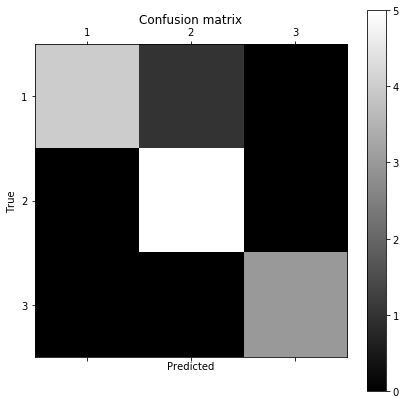

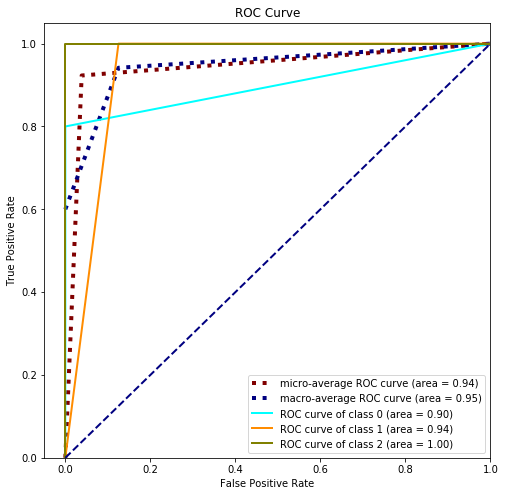

CV Split 4 ..

Evaluating model..

Accuracy score for training data.
Accuracy score for validation data.
Classification report for training data.
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        39
           2       1.00      1.00      1.00        45
           3       1.00      1.00      1.00        28

    accuracy                           1.00       112
   macro avg       1.00      1.00      1.00       112
weighted avg       1.00      1.00      1.00       112

Classification report for validation data.
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         3

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13

Confusion matrix..
[[5 0 0]
 [0 5 0]
 [0 0 3]]


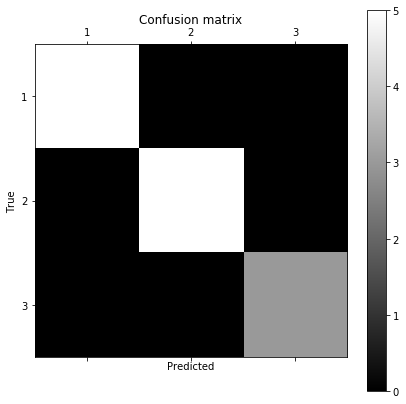

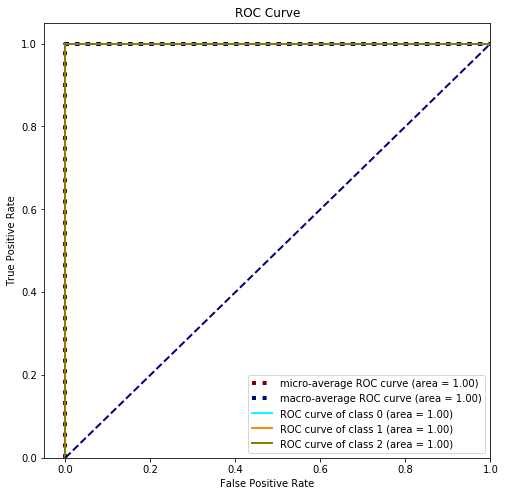

CV Split 5 ..

Evaluating model..

Accuracy score for training data.
Accuracy score for validation data.
Classification report for training data.
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        40
           2       1.00      1.00      1.00        45
           3       1.00      1.00      1.00        28

    accuracy                           1.00       113
   macro avg       1.00      1.00      1.00       113
weighted avg       1.00      1.00      1.00       113

Classification report for validation data.
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         3

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

Confusion matrix..
[[4 0 0]
 [0 5 0]
 [0 0 3]]


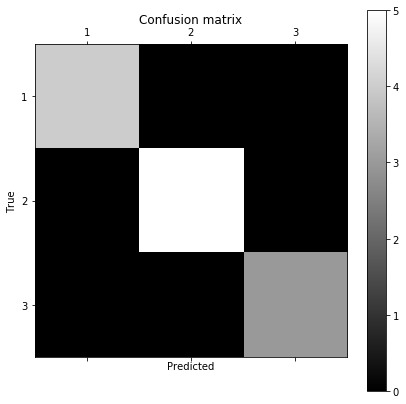

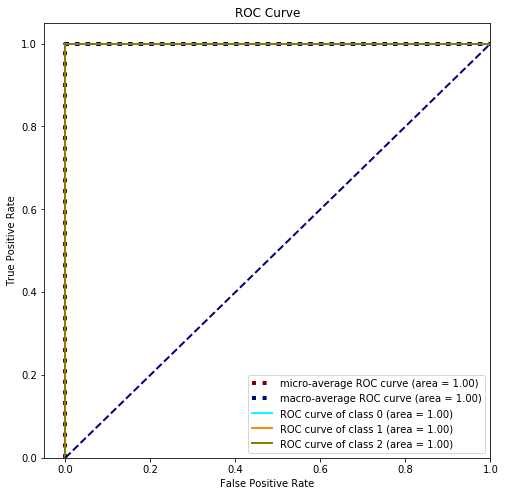

CV Split 6 ..

Evaluating model..

Accuracy score for training data.
Accuracy score for validation data.
Classification report for training data.
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        40
           2       1.00      1.00      1.00        45
           3       1.00      1.00      1.00        28

    accuracy                           1.00       113
   macro avg       1.00      1.00      1.00       113
weighted avg       1.00      1.00      1.00       113

Classification report for validation data.
              precision    recall  f1-score   support

           1       0.80      1.00      0.89         4
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00         3

    accuracy                           0.92        12
   macro avg       0.93      0.93      0.93        12
weighted avg       0.93      0.92      0.92        12

Confusion matrix..
[[4 0 0]
 [1 4 0]
 [0 0 3]]


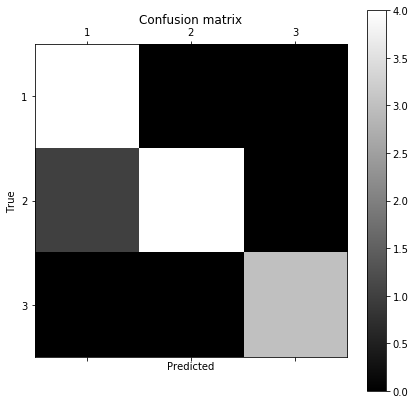

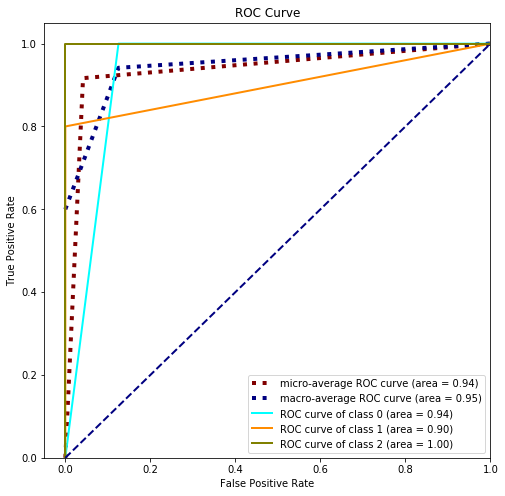

CV Split 7 ..

Evaluating model..

Accuracy score for training data.
Accuracy score for validation data.
Classification report for training data.
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        40
           2       1.00      1.00      1.00        45
           3       1.00      1.00      1.00        28

    accuracy                           1.00       113
   macro avg       1.00      1.00      1.00       113
weighted avg       1.00      1.00      1.00       113

Classification report for validation data.
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         3

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

Confusion matrix..
[[4 0 0]
 [0 5 0]
 [0 0 3]]


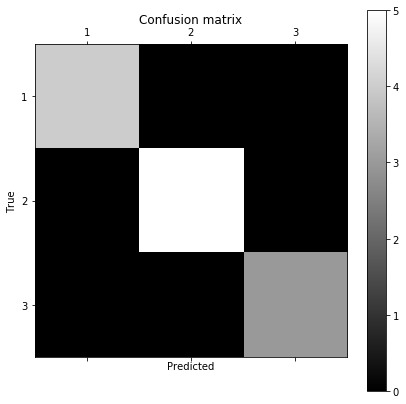

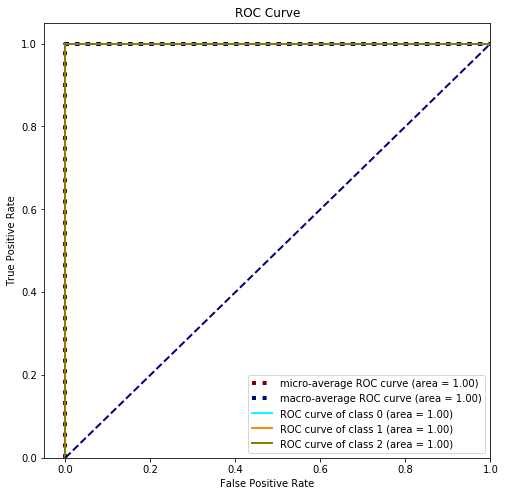

CV Split 8 ..

Evaluating model..

Accuracy score for training data.
Accuracy score for validation data.
Classification report for training data.
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        40
           2       1.00      1.00      1.00        45
           3       1.00      1.00      1.00        28

    accuracy                           1.00       113
   macro avg       1.00      1.00      1.00       113
weighted avg       1.00      1.00      1.00       113

Classification report for validation data.
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         3

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

Confusion matrix..
[[4 0 0]
 [0 5 0]
 [0 0 3]]


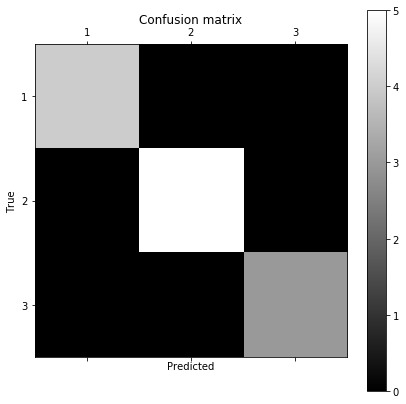

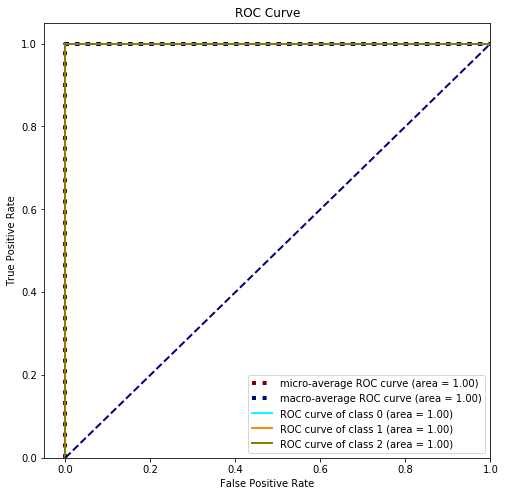

CV Split 9 ..

Evaluating model..

Accuracy score for training data.
Accuracy score for validation data.
Classification report for training data.
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        40
           2       1.00      1.00      1.00        45
           3       1.00      1.00      1.00        28

    accuracy                           1.00       113
   macro avg       1.00      1.00      1.00       113
weighted avg       1.00      1.00      1.00       113

Classification report for validation data.
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         3

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

Confusion matrix..
[[4 0 0]
 [0 5 0]
 [0 0 3]]


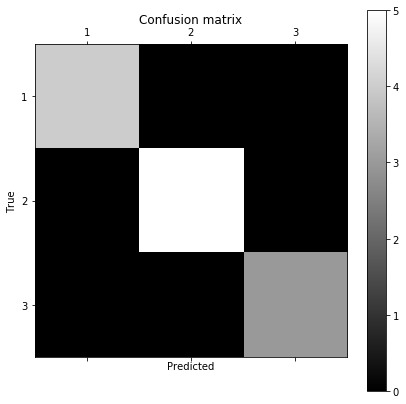

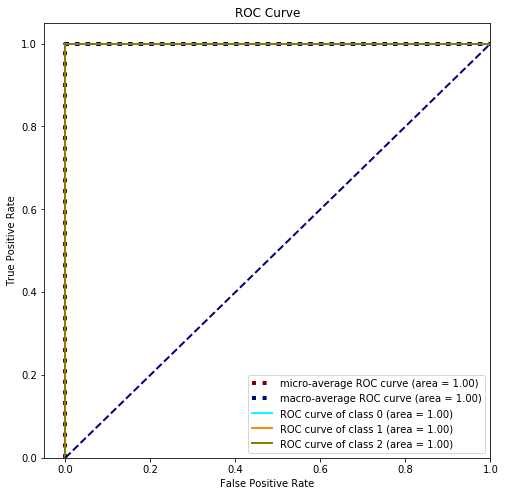

CV Split 10 ..

Evaluating model..

Accuracy score for training data.
Accuracy score for validation data.
Classification report for training data.
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        40
           2       1.00      1.00      1.00        45
           3       1.00      1.00      1.00        28

    accuracy                           1.00       113
   macro avg       1.00      1.00      1.00       113
weighted avg       1.00      1.00      1.00       113

Classification report for validation data.
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         3

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

Confusion matrix..
[[4 0 0]
 [0 5 0]
 [0 0 3]]


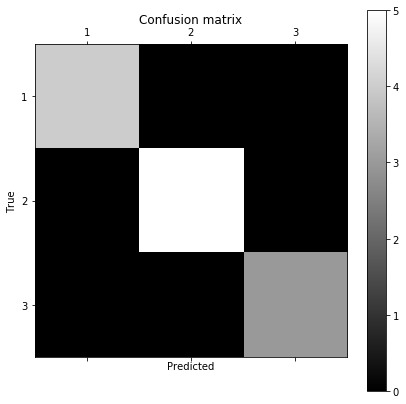

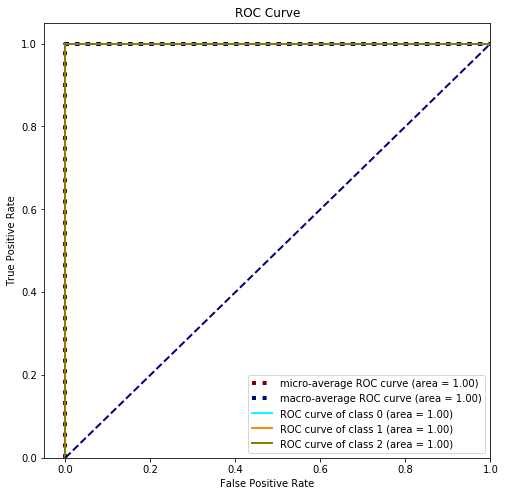


Mean classification scores for validation data...

Training accuracy: 0.999
Training precision: 0.999
Training recall: 0.999
Training f1-score: 0.999

Validation accuracy: 0.984
Validation precision: 0.988
Validation recall: 0.987
Validation f1-score: 0.986
AUC Mean Micro Average: 0.988
AUC Mean Macro Average: 0.989

Evaluating model on test set..
Classification report for test data.
              precision    recall  f1-score   support

           1       1.00      0.93      0.97        15
           2       0.95      0.95      0.95        21
           3       0.94      1.00      0.97        17

    accuracy                           0.96        53
   macro avg       0.97      0.96      0.96        53
weighted avg       0.96      0.96      0.96        53

Confusion matrix for test data.
[[14  1  0]
 [ 0 20  1]
 [ 0  0 17]]


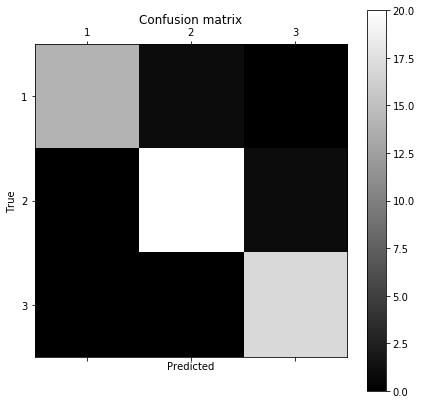

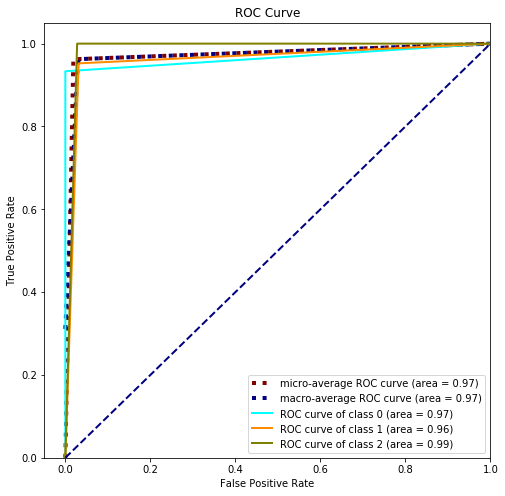

Evaluation complete.


In [157]:
shallow_nn_opt = train_optimize_model(wine_train_scaled,
                     wine_labels_train,
                     shallow_nn,
                     model_name='shallow_nn_opt.model',
                     optimizer='Grid',
                     param_list=shallow_nn_param_list)
evaluate_model(wine_train_scaled, wine_labels_train, wine_test_scaled, wine_labels_test, shallow_nn_opt, 
               grid_search=False)

#### 5-layer MLP

Training baseline model..
Training complete.
Evaluating model on validation set..
CV Split 1 ..

Evaluating model..

Accuracy score for training data.
Accuracy score for validation data.
Classification report for training data.
              precision    recall  f1-score   support

           1       1.00      0.97      0.99        39
           2       0.98      1.00      0.99        45
           3       1.00      1.00      1.00        27

    accuracy                           0.99       111
   macro avg       0.99      0.99      0.99       111
weighted avg       0.99      0.99      0.99       111

Classification report for validation data.
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         4

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.0

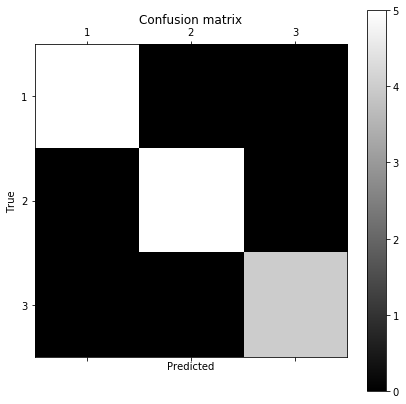

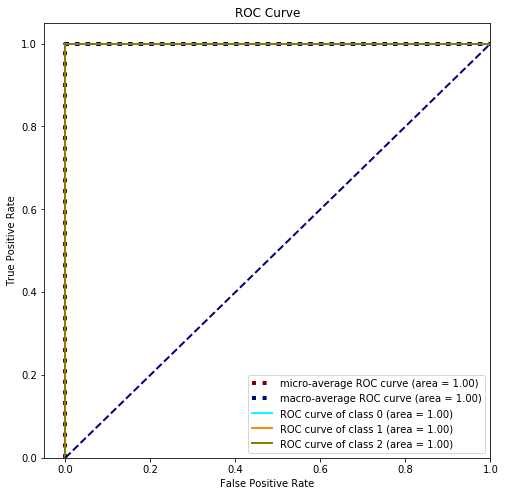

CV Split 2 ..

Evaluating model..

Accuracy score for training data.
Accuracy score for validation data.
Classification report for training data.
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        39
           2       1.00      0.93      0.97        45
           3       0.90      1.00      0.95        28

    accuracy                           0.97       112
   macro avg       0.97      0.98      0.97       112
weighted avg       0.98      0.97      0.97       112

Classification report for validation data.
              precision    recall  f1-score   support

           1       0.83      1.00      0.91         5
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00         3

    accuracy                           0.92        13
   macro avg       0.94      0.93      0.93        13
weighted avg       0.94      0.92      0.92        13

Confusion matrix..
[[5 0 0]
 [1 4 0]
 [0 0 3]]


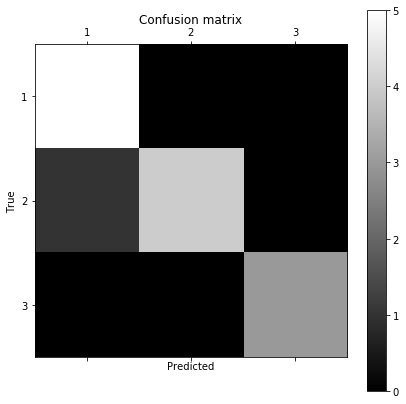

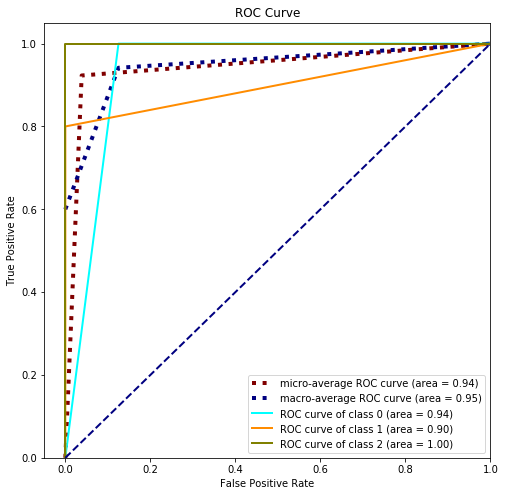

CV Split 3 ..

Evaluating model..

Accuracy score for training data.
Accuracy score for validation data.
Classification report for training data.
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        39
           2       1.00      0.98      0.99        45
           3       0.97      1.00      0.98        28

    accuracy                           0.99       112
   macro avg       0.99      0.99      0.99       112
weighted avg       0.99      0.99      0.99       112

Classification report for validation data.
              precision    recall  f1-score   support

           1       1.00      0.80      0.89         5
           2       0.83      1.00      0.91         5
           3       1.00      1.00      1.00         3

    accuracy                           0.92        13
   macro avg       0.94      0.93      0.93        13
weighted avg       0.94      0.92      0.92        13

Confusion matrix..
[[4 1 0]
 [0 5 0]
 [0 0 3]]


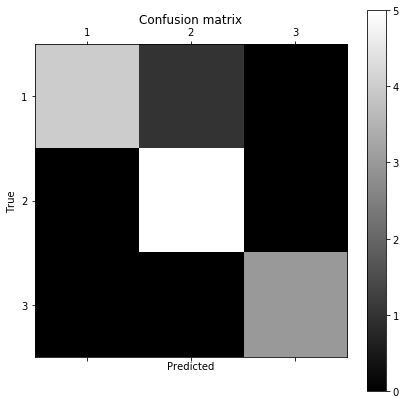

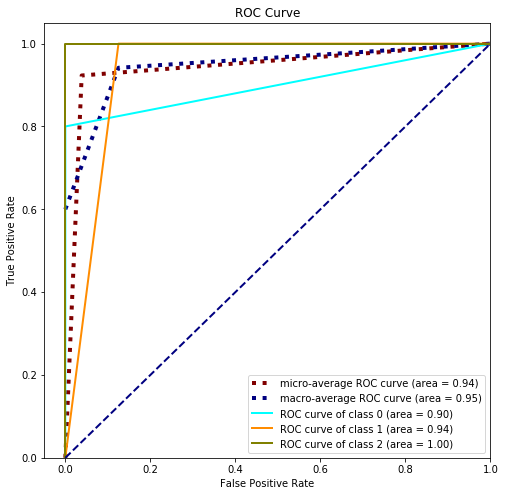

CV Split 4 ..

Evaluating model..

Accuracy score for training data.
Accuracy score for validation data.
Classification report for training data.
              precision    recall  f1-score   support

           1       0.93      1.00      0.96        39
           2       1.00      0.93      0.97        45
           3       1.00      1.00      1.00        28

    accuracy                           0.97       112
   macro avg       0.98      0.98      0.98       112
weighted avg       0.98      0.97      0.97       112

Classification report for validation data.
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         3

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13

Confusion matrix..
[[5 0 0]
 [0 5 0]
 [0 0 3]]


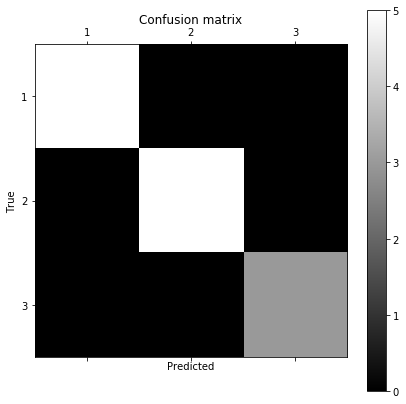

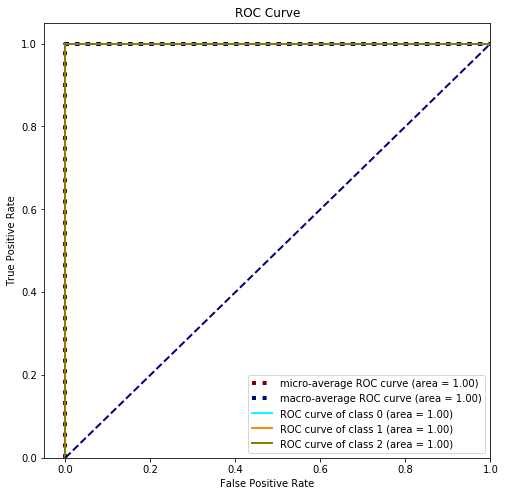

CV Split 5 ..

Evaluating model..

Accuracy score for training data.
Accuracy score for validation data.
Classification report for training data.
              precision    recall  f1-score   support

           1       0.89      1.00      0.94        40
           2       0.00      0.00      0.00        45
           3       0.41      1.00      0.58        28

    accuracy                           0.60       113
   macro avg       0.43      0.67      0.51       113
weighted avg       0.42      0.60      0.48       113

Classification report for validation data.
              precision    recall  f1-score   support

           1       0.80      1.00      0.89         4
           2       0.00      0.00      0.00         5
           3       0.43      1.00      0.60         3

    accuracy                           0.58        12
   macro avg       0.41      0.67      0.50        12
weighted avg       0.37      0.58      0.45        12

Confusion matrix..
[[4 0 0]
 [1 0 4]
 [0 0 3]]


c:\users\user\.conda\envs\tf-std\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


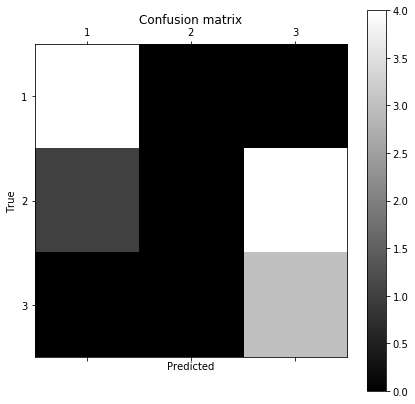

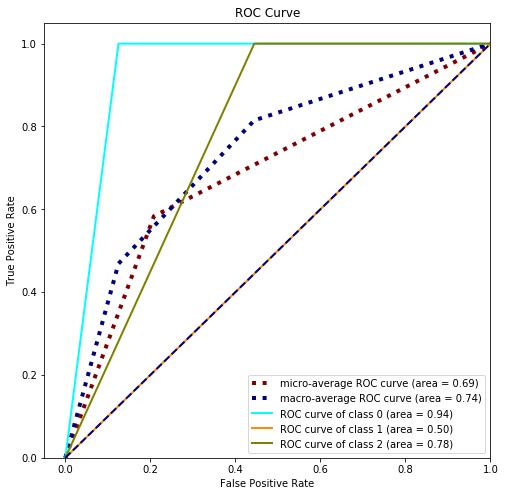

CV Split 6 ..

Evaluating model..

Accuracy score for training data.
Accuracy score for validation data.
Classification report for training data.
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        40
           2       1.00      1.00      1.00        45
           3       1.00      1.00      1.00        28

    accuracy                           1.00       113
   macro avg       1.00      1.00      1.00       113
weighted avg       1.00      1.00      1.00       113

Classification report for validation data.
              precision    recall  f1-score   support

           1       0.80      1.00      0.89         4
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00         3

    accuracy                           0.92        12
   macro avg       0.93      0.93      0.93        12
weighted avg       0.93      0.92      0.92        12

Confusion matrix..
[[4 0 0]
 [1 4 0]
 [0 0 3]]


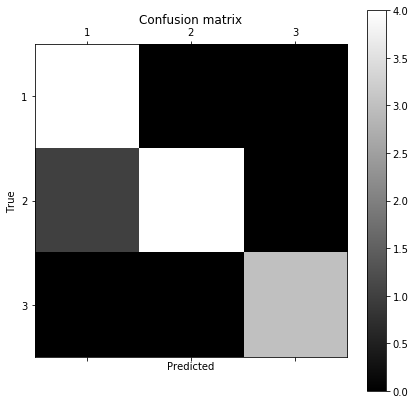

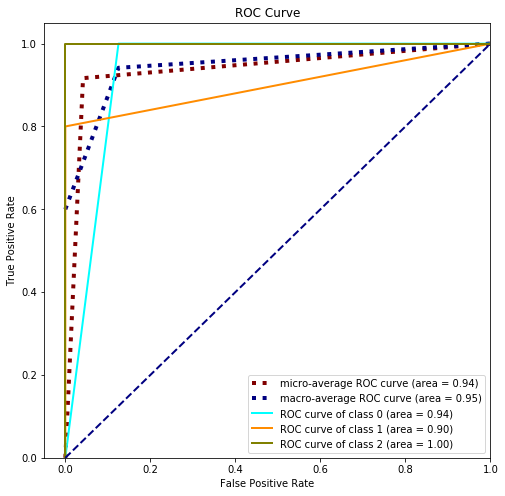

CV Split 7 ..

Evaluating model..

Accuracy score for training data.
Accuracy score for validation data.
Classification report for training data.
              precision    recall  f1-score   support

           1       0.98      1.00      0.99        40
           2       1.00      0.98      0.99        45
           3       1.00      1.00      1.00        28

    accuracy                           0.99       113
   macro avg       0.99      0.99      0.99       113
weighted avg       0.99      0.99      0.99       113

Classification report for validation data.
              precision    recall  f1-score   support

           1       0.80      1.00      0.89         4
           2       1.00      1.00      1.00         5
           3       1.00      0.67      0.80         3

    accuracy                           0.92        12
   macro avg       0.93      0.89      0.90        12
weighted avg       0.93      0.92      0.91        12

Confusion matrix..
[[4 0 0]
 [0 5 0]
 [1 0 2]]


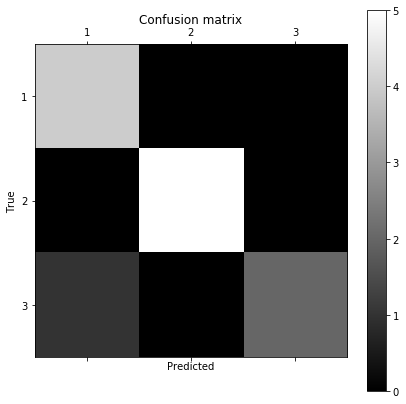

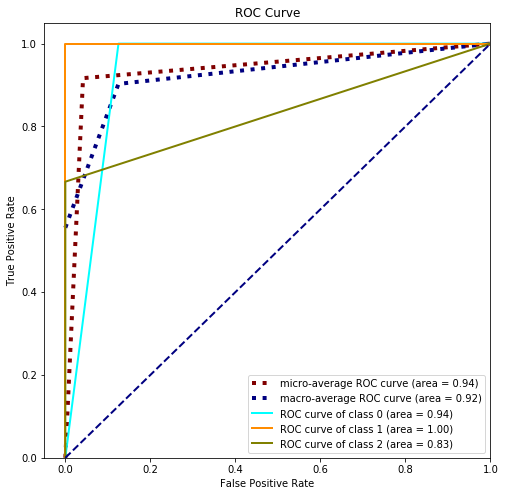

CV Split 8 ..

Evaluating model..

Accuracy score for training data.
Accuracy score for validation data.
Classification report for training data.
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        40
           2       0.62      1.00      0.76        45
           3       0.00      0.00      0.00        28

    accuracy                           0.75       113
   macro avg       0.54      0.67      0.59       113
weighted avg       0.60      0.75      0.66       113

Classification report for validation data.
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       0.62      1.00      0.77         5
           3       0.00      0.00      0.00         3

    accuracy                           0.75        12
   macro avg       0.54      0.67      0.59        12
weighted avg       0.59      0.75      0.65        12

Confusion matrix..
[[4 0 0]
 [0 5 0]
 [0 3 0]]


c:\users\user\.conda\envs\tf-std\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


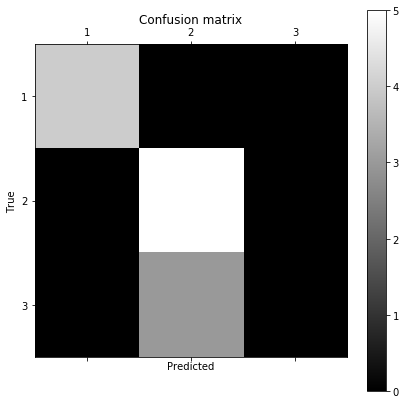

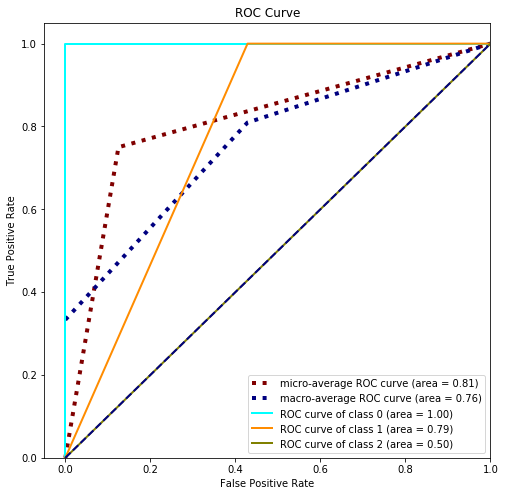

CV Split 9 ..

Evaluating model..

Accuracy score for training data.
Accuracy score for validation data.
Classification report for training data.
              precision    recall  f1-score   support

           1       0.89      1.00      0.94        40
           2       1.00      0.78      0.88        45
           3       0.85      1.00      0.92        28

    accuracy                           0.91       113
   macro avg       0.91      0.93      0.91       113
weighted avg       0.92      0.91      0.91       113

Classification report for validation data.
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       1.00      0.80      0.89         5
           3       0.75      1.00      0.86         3

    accuracy                           0.92        12
   macro avg       0.92      0.93      0.92        12
weighted avg       0.94      0.92      0.92        12

Confusion matrix..
[[4 0 0]
 [0 4 1]
 [0 0 3]]


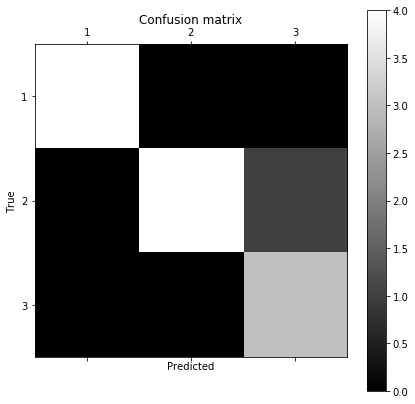

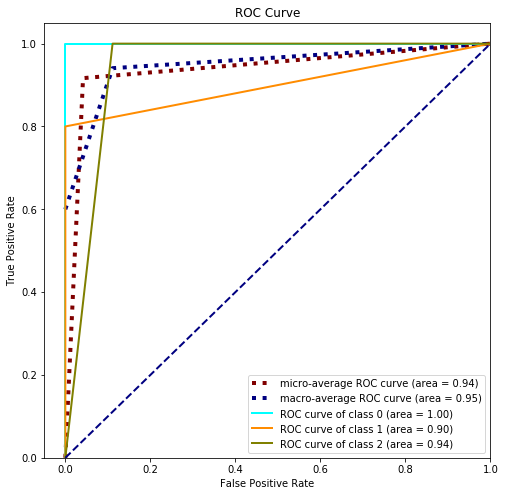

CV Split 10 ..

Evaluating model..

Accuracy score for training data.
Accuracy score for validation data.
Classification report for training data.
              precision    recall  f1-score   support

           1       1.00      0.97      0.99        40
           2       0.98      1.00      0.99        45
           3       1.00      1.00      1.00        28

    accuracy                           0.99       113
   macro avg       0.99      0.99      0.99       113
weighted avg       0.99      0.99      0.99       113

Classification report for validation data.
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       1.00      0.80      0.89         5
           3       0.75      1.00      0.86         3

    accuracy                           0.92        12
   macro avg       0.92      0.93      0.92        12
weighted avg       0.94      0.92      0.92        12

Confusion matrix..
[[4 0 0]
 [0 4 1]
 [0 0 3]]


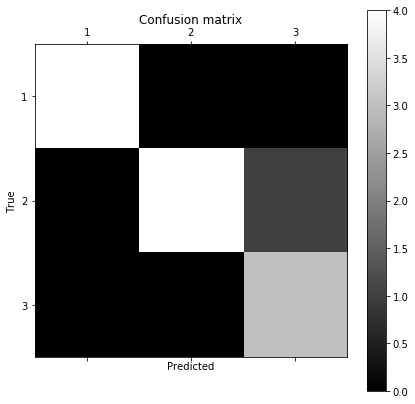

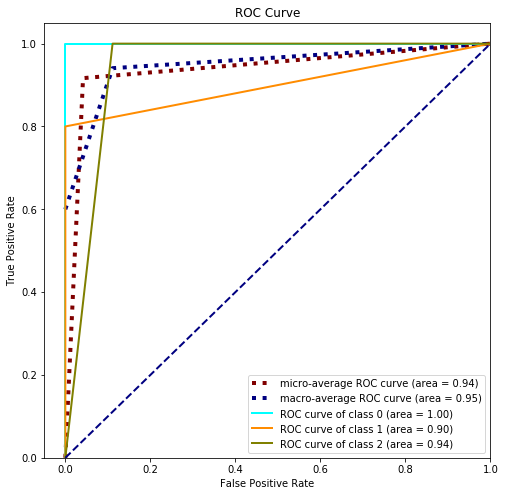


Mean classification scores for validation data...

Training accuracy: 0.918
Training precision: 0.879
Training recall: 0.918
Training f1-score: 0.892

Validation accuracy: 0.885
Validation precision: 0.854
Validation recall: 0.889
Validation f1-score: 0.86
AUC Mean Micro Average: 0.913
AUC Mean Macro Average: 0.916

Evaluating model on test set..
Classification report for test data.
              precision    recall  f1-score   support

           1       1.00      0.87      0.93        15
           2       0.91      0.95      0.93        21
           3       0.94      1.00      0.97        17

    accuracy                           0.94        53
   macro avg       0.95      0.94      0.94        53
weighted avg       0.95      0.94      0.94        53

Confusion matrix for test data.
[[13  2  0]
 [ 0 20  1]
 [ 0  0 17]]


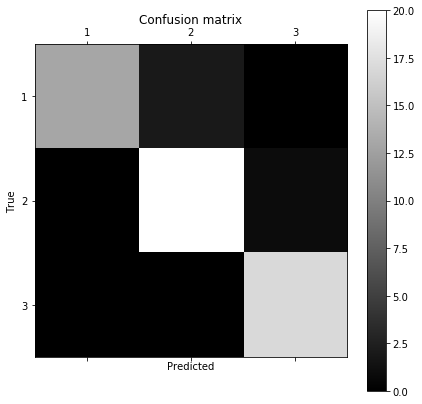

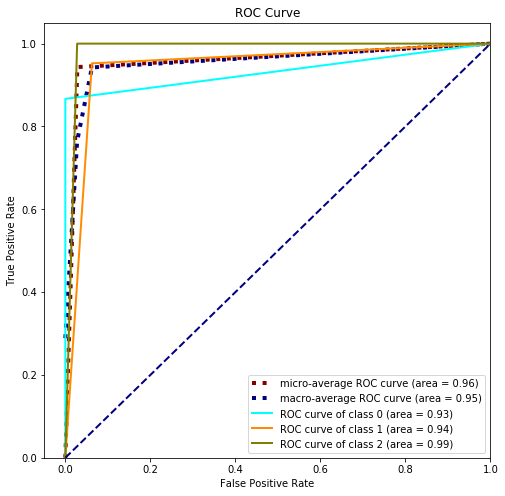

Evaluation complete.


In [56]:
deep_nn = MLPClassifier(hidden_layer_sizes=(100,5))
deep_nn_base = train_optimize_model(wine_train_scaled,
                     wine_labels_train,
                     deep_nn,
                     optimizer=None,
                     param_list=None)
evaluate_model(wine_train_scaled, wine_labels_train, wine_test_scaled, wine_labels_test, deep_nn_base)

Loading saved model...
Loaded..
Evaluating model on validation set..
CV Split 1 ..

Evaluating model..

Accuracy score for training data.
Accuracy score for validation data.
Classification report for training data.
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        39
           2       1.00      1.00      1.00        45
           3       1.00      1.00      1.00        27

    accuracy                           1.00       111
   macro avg       1.00      1.00      1.00       111
weighted avg       1.00      1.00      1.00       111

Classification report for validation data.
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         4

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00  

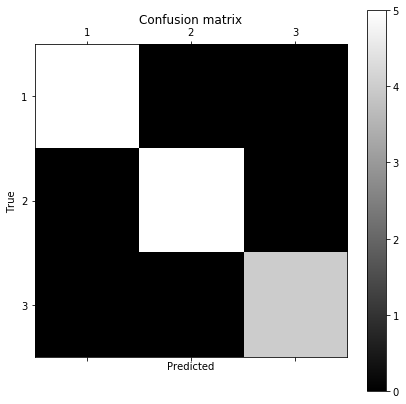

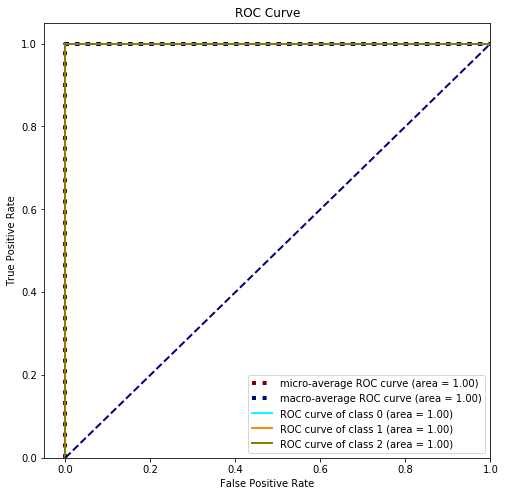

CV Split 2 ..

Evaluating model..

Accuracy score for training data.
Accuracy score for validation data.
Classification report for training data.
              precision    recall  f1-score   support

           1       0.86      0.62      0.72        39
           2       0.84      0.91      0.87        45
           3       0.80      1.00      0.89        28

    accuracy                           0.83       112
   macro avg       0.83      0.84      0.83       112
weighted avg       0.83      0.83      0.82       112

Classification report for validation data.
              precision    recall  f1-score   support

           1       1.00      0.20      0.33         5
           2       0.71      1.00      0.83         5
           3       0.60      1.00      0.75         3

    accuracy                           0.69        13
   macro avg       0.77      0.73      0.64        13
weighted avg       0.80      0.69      0.62        13

Confusion matrix..
[[1 2 2]
 [0 5 0]
 [0 0 3]]


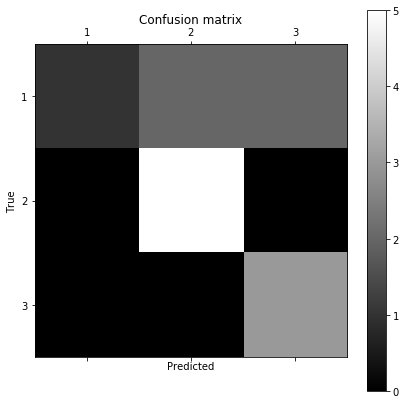

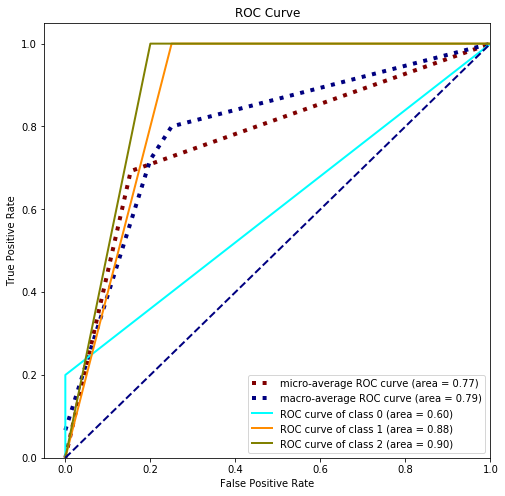

CV Split 3 ..

Evaluating model..

Accuracy score for training data.
Accuracy score for validation data.
Classification report for training data.
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        39
           2       1.00      1.00      1.00        45
           3       1.00      1.00      1.00        28

    accuracy                           1.00       112
   macro avg       1.00      1.00      1.00       112
weighted avg       1.00      1.00      1.00       112

Classification report for validation data.
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         3

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13

Confusion matrix..
[[5 0 0]
 [0 5 0]
 [0 0 3]]


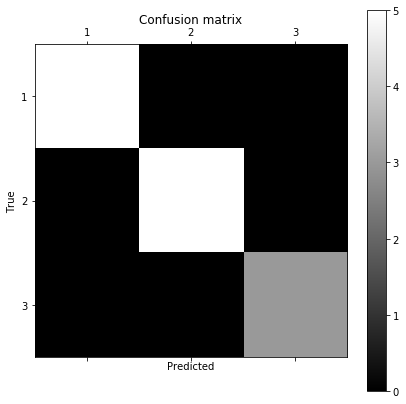

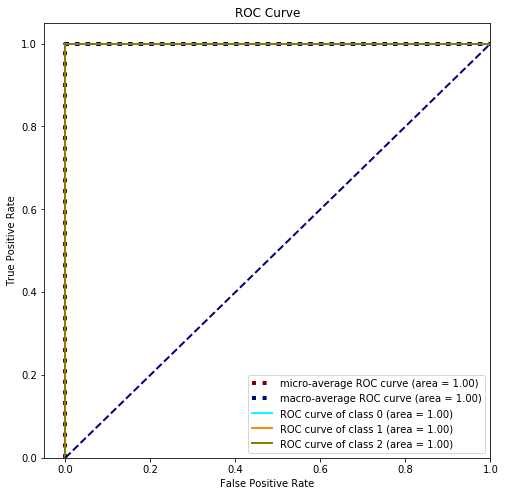

CV Split 4 ..

Evaluating model..

Accuracy score for training data.
Accuracy score for validation data.
Classification report for training data.
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        39
           2       1.00      1.00      1.00        45
           3       1.00      1.00      1.00        28

    accuracy                           1.00       112
   macro avg       1.00      1.00      1.00       112
weighted avg       1.00      1.00      1.00       112

Classification report for validation data.
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         3

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13

Confusion matrix..
[[5 0 0]
 [0 5 0]
 [0 0 3]]


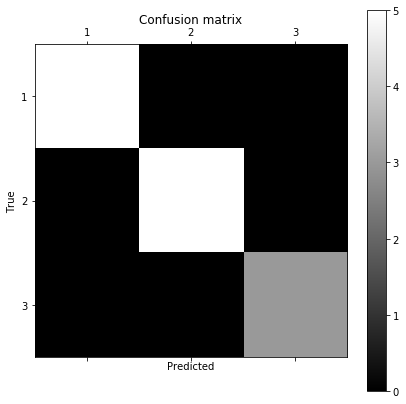

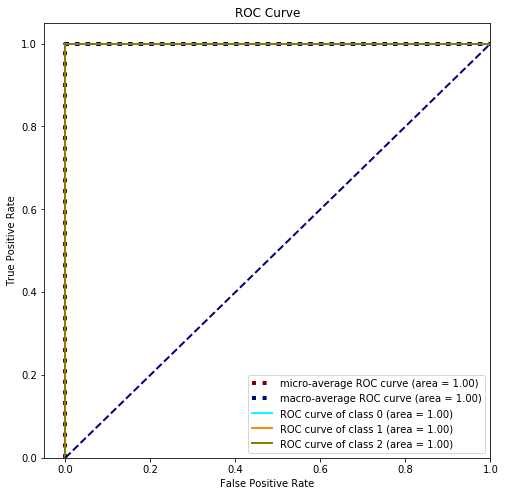

CV Split 5 ..

Evaluating model..

Accuracy score for training data.
Accuracy score for validation data.
Classification report for training data.
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        40
           2       1.00      1.00      1.00        45
           3       1.00      1.00      1.00        28

    accuracy                           1.00       113
   macro avg       1.00      1.00      1.00       113
weighted avg       1.00      1.00      1.00       113

Classification report for validation data.
              precision    recall  f1-score   support

           1       0.80      1.00      0.89         4
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00         3

    accuracy                           0.92        12
   macro avg       0.93      0.93      0.93        12
weighted avg       0.93      0.92      0.92        12

Confusion matrix..
[[4 0 0]
 [1 4 0]
 [0 0 3]]


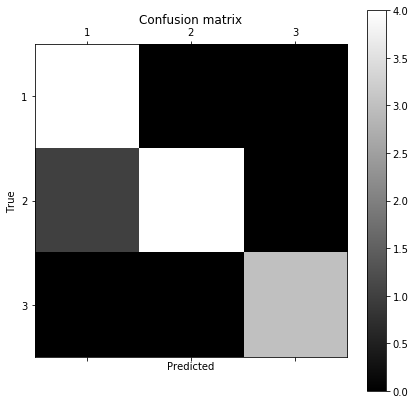

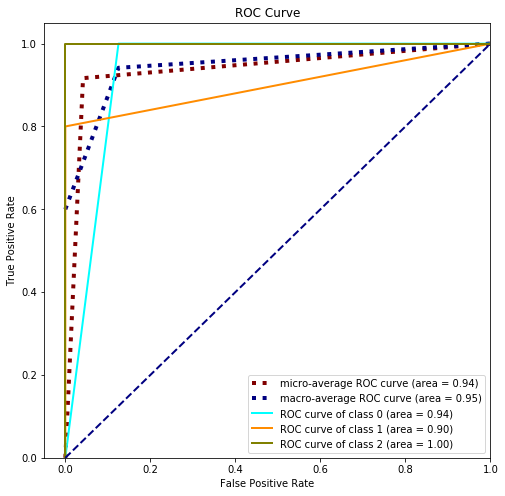

CV Split 6 ..

Evaluating model..

Accuracy score for training data.
Accuracy score for validation data.
Classification report for training data.
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        40
           2       1.00      1.00      1.00        45
           3       1.00      1.00      1.00        28

    accuracy                           1.00       113
   macro avg       1.00      1.00      1.00       113
weighted avg       1.00      1.00      1.00       113

Classification report for validation data.
              precision    recall  f1-score   support

           1       0.80      1.00      0.89         4
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00         3

    accuracy                           0.92        12
   macro avg       0.93      0.93      0.93        12
weighted avg       0.93      0.92      0.92        12

Confusion matrix..
[[4 0 0]
 [1 4 0]
 [0 0 3]]


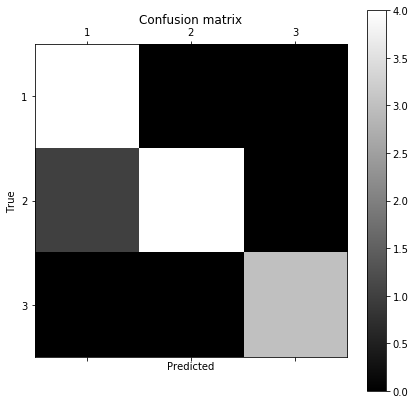

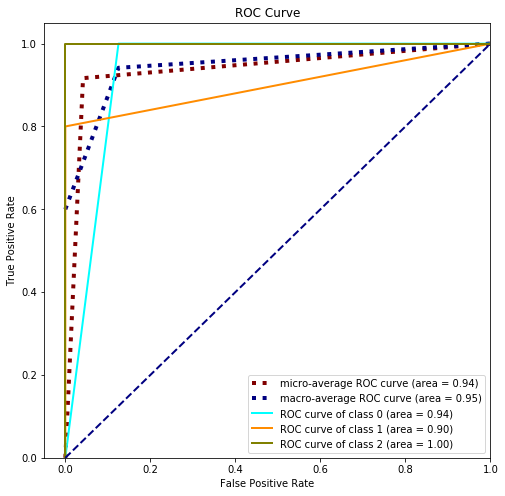

CV Split 7 ..

Evaluating model..

Accuracy score for training data.
Accuracy score for validation data.
Classification report for training data.
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        40
           2       1.00      1.00      1.00        45
           3       1.00      1.00      1.00        28

    accuracy                           1.00       113
   macro avg       1.00      1.00      1.00       113
weighted avg       1.00      1.00      1.00       113

Classification report for validation data.
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         3

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

Confusion matrix..
[[4 0 0]
 [0 5 0]
 [0 0 3]]


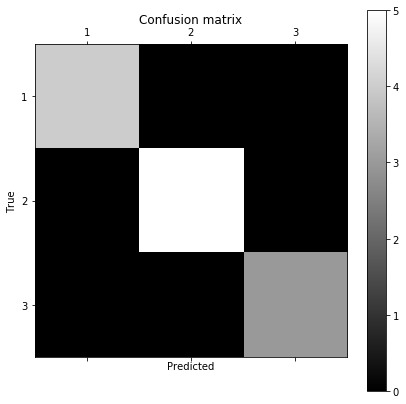

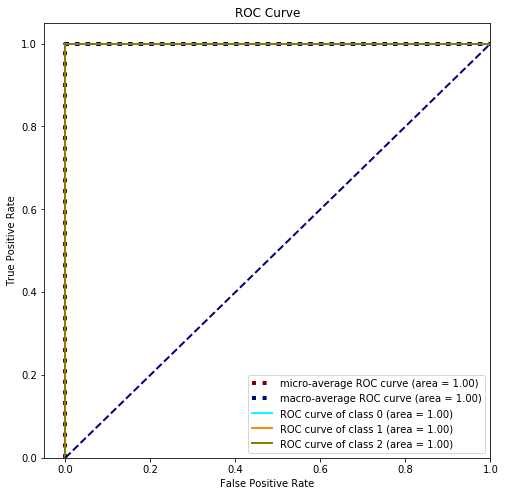

CV Split 8 ..

Evaluating model..

Accuracy score for training data.
Accuracy score for validation data.
Classification report for training data.
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        40
           2       1.00      1.00      1.00        45
           3       1.00      1.00      1.00        28

    accuracy                           1.00       113
   macro avg       1.00      1.00      1.00       113
weighted avg       1.00      1.00      1.00       113

Classification report for validation data.
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         3

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

Confusion matrix..
[[4 0 0]
 [0 5 0]
 [0 0 3]]


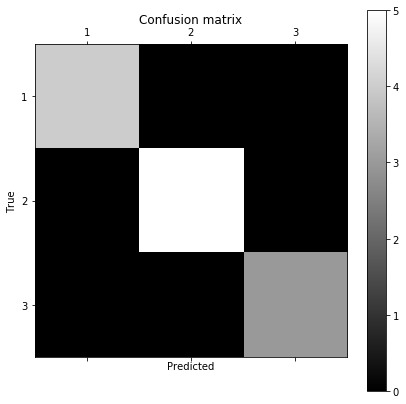

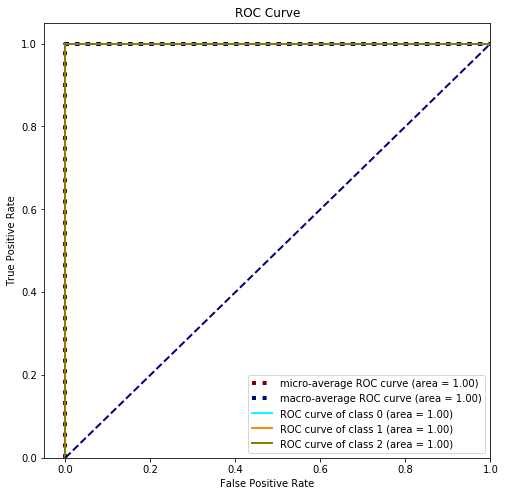

CV Split 9 ..

Evaluating model..

Accuracy score for training data.
Accuracy score for validation data.
Classification report for training data.
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        40
           2       1.00      1.00      1.00        45
           3       1.00      1.00      1.00        28

    accuracy                           1.00       113
   macro avg       1.00      1.00      1.00       113
weighted avg       1.00      1.00      1.00       113

Classification report for validation data.
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         3

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

Confusion matrix..
[[4 0 0]
 [0 5 0]
 [0 0 3]]


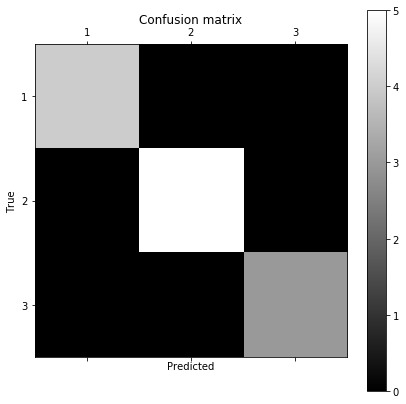

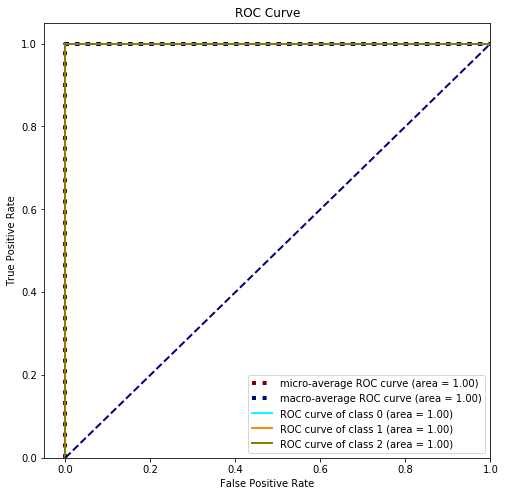

CV Split 10 ..

Evaluating model..

Accuracy score for training data.
Accuracy score for validation data.
Classification report for training data.
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        40
           2       1.00      1.00      1.00        45
           3       1.00      1.00      1.00        28

    accuracy                           1.00       113
   macro avg       1.00      1.00      1.00       113
weighted avg       1.00      1.00      1.00       113

Classification report for validation data.
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       1.00      0.80      0.89         5
           3       0.75      1.00      0.86         3

    accuracy                           0.92        12
   macro avg       0.92      0.93      0.92        12
weighted avg       0.94      0.92      0.92        12

Confusion matrix..
[[4 0 0]
 [0 4 1]
 [0 0 3]]


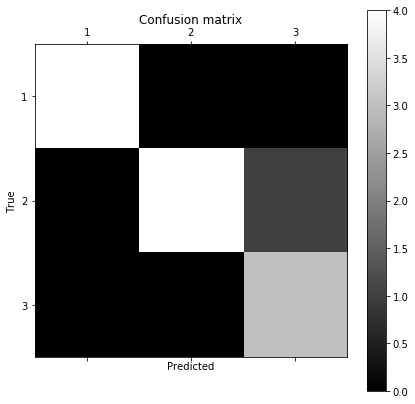

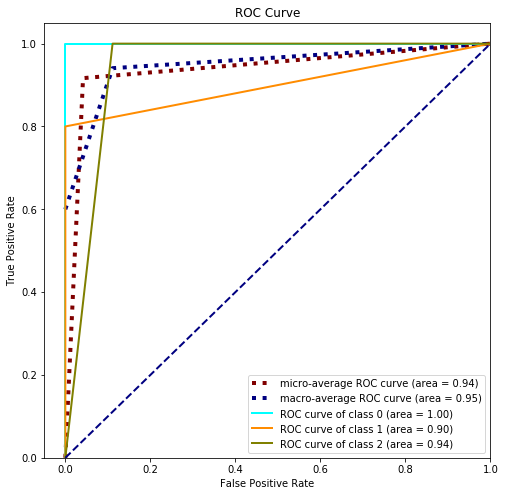


Mean classification scores for validation data...

Training accuracy: 0.983
Training precision: 0.983
Training recall: 0.984
Training f1-score: 0.983

Validation accuracy: 0.944
Validation precision: 0.955
Validation recall: 0.953
Validation f1-score: 0.941
AUC Mean Micro Average: 0.958
AUC Mean Macro Average: 0.963

Evaluating model on test set..
Classification report for test data.
              precision    recall  f1-score   support

           1       1.00      0.93      0.97        15
           2       0.91      0.95      0.93        21
           3       0.94      0.94      0.94        17

    accuracy                           0.94        53
   macro avg       0.95      0.94      0.95        53
weighted avg       0.95      0.94      0.94        53

Confusion matrix for test data.
[[14  1  0]
 [ 0 20  1]
 [ 0  1 16]]


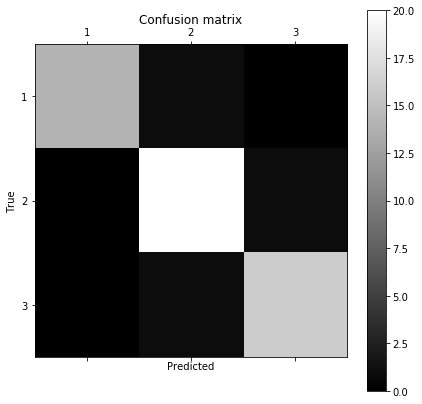

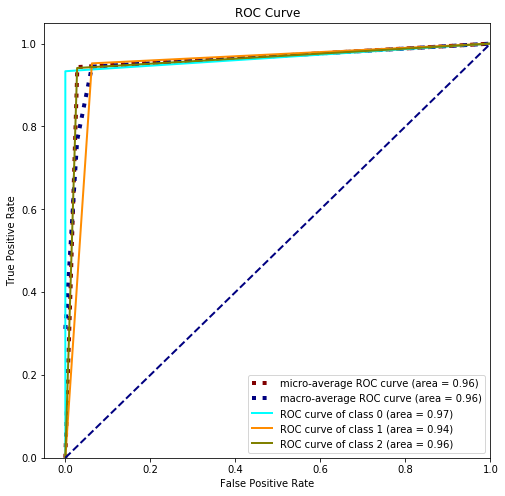

Evaluation complete.


In [160]:
deep_nn_opt = train_optimize_model(wine_train_scaled,
                                   wine_labels_train,
                                   deep_nn,
                                   model_name='deep_nn_opt.model',
                                   optimizer='Grid',
                                   param_list=deep_nn_param_list)
evaluate_model(wine_train_scaled,
               wine_labels_train,
               wine_test_scaled,
               wine_labels_test,
               deep_nn_opt,
               grid_search=False)

### Conclusion

In conclusion, \textbf{The Wine dataset} is a relatively easy dataset for \textbf{Classification}, due to the fact that most of the attributes come from the same distribution, which are correlated to a large extent.

\textbf{Random Forests} are robust to variance in the data, which means that little to no preprocessing (handling missing/categorical values or feature scaling) is required to reach a good performance. \textbf{Neural Networks} also require a rigorous amount of tuning in terms of the \textbf{number of hidden layers, depth, regularization parameters and learning rate}. \textbf{Random Forests}, however, usually provide a good estimate when tuning only the \textbf{number of estimators}, as they generalize to the mean performance of each subset of trees.